# EDA of मुंशी प्रेमचन्द's Stories

## हिन्दी उर्दू साहित्य के शीर्षतम कथाकार की कहानियाँ

In [1]:
# Importing Libraries

# to normalise the given hindi story
from indicnlp.normalize.indic_normalize import DevanagariNormalizer

# to tokenize the story
from indicnlp.tokenize import indic_tokenize

# for counting tokens frequency
from collections import Counter

# filtering story
import re

# to remove hindi stopwords
from spacy.lang.hi import STOP_WORDS

# for data visualization
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
def analyser(story, filter_status):
    '''This functions takes two inputs, story and filter_status. And then plot a word cloud of most 
    frequent words out of the story and returns a frequency dictionary of words in decreasing order.
    
    INPUTS : 
    story --> Hindi story that you want to process.
    filter_status -->(True/False) If True, then it removes english syllable and digits and basic 
    punctuation from the story. And also removes hindi language stopwords.
    
    OUTPUT : freq_dict --> List of tuples of word frequency in decreasing order.'''
    
    # firstly we normalise the story, this will remplace pipe symbols with purna-viram and some more unicode symbols
    dn = DevanagariNormalizer()
    story = dn.normalize(story)
    
    # initialising empty hindi stopwords dictionary
    hi_stopwords = {}
    # Filter_Status:
    if filter_status:
        # filtering out unnecessary data
        story = str(re.sub(r"[।,'-?\a-zA-Z\d]+", ' ', story))
        
        # hindi stopwords set
        hi_stopwords = set(STOP_WORDS)

    # tokenising the story
    story_token = indic_tokenize.trivial_tokenize_indic(story)
    
    # counting word frequency after removing stopwords according to the need
    story_token = [ token for token in story_token if token not in hi_stopwords]
    word_freq = Counter(story_token)
    
    
    
    # plotting word cloud of given story
    font = 'gargi.ttf'
    wordcloud = WordCloud(width = 800, height = 800, min_font_size = 10, max_words = 1000,
                          background_color = 'black', stopwords = hi_stopwords,
                          font_path = font, regexp=r"[\u0900-\u097F]+").generate(story)
    plt.figure(figsize = (8, 8))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
    # returning list tuples of each word freqency
    return word_freq

# STORY 1 : दो बैलों की कथा

In [3]:
story_1 = '''
जानवरों में गधा सबसे ज्यादा बुद्धिहीन समझा जाता हैं । हम जब किसी आदमी को पल्ले दरजे का बेवकूफ कहना चाहता हैं तो उसे गधा कहते हैं । गधा सचमुच बेवकूफ हैं, या उसके सीधेपन, उसकी निरापद सहिष्णुता ने उसे यह पदवी दे दी हैं, इसका निश्चय नहीं किया जा सकता । गायें सींग मारती हैं, ब्याही हुई गाय तो अनायास ही सिंहनी का रूप धारण कर लेती हैं । कुत्ता भी बहुत गरीब जानवर हैं, लेकिन कभी-कभी उसे भी क्रोध आ जाता हैं, किन्तु गधे को कभी क्रोध करते नहीं सुना । जितना चाहो गरीब को मारो, चाहे जैसी खराब, सड़ी हुई घास सामने डाल दो, उसके चहरे पर कभी असंतोष की छाया भी न दुखायी देरी । वैशाख में चाहे एकाध बार कुलेल कर लेता हो, पर हमने तो उसे कभी खुश होते नहीं देखा । उसके चहरे पर एक स्थायी विषाद स्थायी रूप से छाया रहता हैं । सुख-दुःख, हानि-लाभ, किसी भी दशा में बदलते नहीं देखा । ऋषियों-मुनियों के जितने गुण हैं, वे सभी उसमें पराकाष्ठा को पहुँच गये है, पर आदमी उसे बेवकूफ कहता हैं । सद् गुणों का इतना अनादर कहीं नहीं देखा । कदाचित् सीधापन संसार के लिए उपयुक्त नहीं हैं । देखिये न, भारतवासियों की अफ्रीका में क्यों दुर्दशा हो रही हैं। क्यों अमरीका में उन्हें घुसने नहीं दिया जाता ? बेचारे शराब नहीं पीते, चार पैसे कुसमय के लिए बचाकर रखते हैं, जी तोड़कर काम करते हैं, किसी से लड़ाई-झगड़ा नहीं करते, चार बातें सुनकर गम खा जाते हैं फिर भी बदनाम हैं । कहा जाता हैं, वे जीवन के आदर्श को नीचा करते हैं । अगर वे ईट का जवाब पत्थर से देना सीश जाते तो शायद सभ्य कहलाते लगते । जापान की मिशाल सामने हैं । एक ही विजय ने उसे संसार की सभ्य जातियों में गण्य बना दिया ।

लेकिन गधे का एक छोटा भाई और भी हैं, जो उससे कम गधा हैं और वह हैं बैल । जिस अर्थ में हम गधा का प्रयोग करते हैं, कुछ उसी से मिलते-जुलते अर्थ में ‘बछिया के ताउ’ का भी प्रयोग करते हैं । कुछ लोग बैल को शायद बेवकूफों में सर्वश्रेष्ठ कहेंगे, मगर हमारा विचार ऐसा नहीं हैं । बैल कभी-कभी मारता भी हैं और कभी-कभी अड़ियल बैल भी देखने में आता हैं । और भी कई रीतिओं से अपना असंतोष प्रकट कर देता हैं, अतएव उसका स्थान गधे से नीचा हैं ।

झूरी काछी के दोनो बैलों के बैलों के नाम थे हीरा और मोती । दोनों पछाई जाति के थे — देखने में सुन्दर, काम में चौकस, डील में ऊँचे । बहुत दिनों साथ रहते-रहते दोनों में भाईचारा हो गया । दोनो आमने-सामने या आस-पास बैठे हुए एक दूसरे से मूक भाषा में विचार-विनिमय करते थे । एक-दूसरे के मन की बात कैसे समझ जाते थे, हम नहीं कह सकते । अवश्य ही उनमे कोई ऐसी गुप्त शक्ति था, जिससे जीवों में श्रेष्ठता का दावा करनेवाला मनुष्य वंचित हैं । दोनों एक दूसरे को चाटकर और सूँघकर अपना प्रेम प्रकट करते, कभी-कभी सींग भी मिला लिया करते थे — विग्रह के नाते से नहीं, केवल विनोद के भाव से, आत्मीयता के भाव से, जैसे दोस्तों में घनिष्ठता होते ही धौल-धप्पा होने लगता हैं । इसके बिना दोस्ती कुछ फुसफसी, कुछ हल्की-सी रहती हैं, जिस पर ज्यादा विश्वास नहीं किया जा सकता । जिस वक्त ये दोनों बैल हल या गाड़ी में जोत दिये जाते और गरदन हिला-हिलाकर चलते, उस वक्त हर एक की यही चेष्ठा होती थी कि ज्यादा से ज्यादा बोझ मेरी ही गरदन पर रहे । दिनभर के बाद या संध्या को दोनों खुलते तो एक दुसरे को चाट-चूटकर अपनी थकान मिटा लिया करते । नाँद में खली-भूसा पड़ जाने के बाद दोनों साथ ही उठते, साथ नाँद में मुँह डालते और साथ ही बैठते थे । एक मूँह हटा लेता, तो दूसरा भी हटा लेता ।

सं योग की बात, झूरी ने एक बार गोई को सुसराल भेज दिया । बैलों को क्या मालूम क्यों भेजे जा रहे हैं । समझे, मालिक ने हमे बेच दिया । अपना यों बेचा जाना उन्हें अच्छा लगा या बुरा, कौन जाने , पर झूरी के साले गया को घर तक ले जाने में दाँतों में पसीना आ गया । पीछे से हाँकता तो दोनों दायें-बायें भागते, पगहिया पकड़कर आगे से खींचता, तो दोनो पीछे को जोर लगाते । मारते तो दोनों सींग नीचे करके हुँकारते । अगर ईश्वर ने उन्हें वाणी दी होती, तो झूरी से पूछते — तुम हम गरीबों को क्यों निकाल रहे हो ? हमने तो तुम्हारी सेवा करने में कोई कसर नहीं उठा रखी । अगर इतनी मेहनत से काम न चलता था और काम ले लेते । हमें तो तुम्हारी चाकरी में मर जाना कबूल था । हमने कभी दाने-चारे की शिकाय नही की । तुमने जो कुछ खिलाया, वह सिर झुकाकर खा लिया, फिर भी तुमने हमें उस जालिम के हाथ क्यों बेच दिया ?

संध्या समय दोनों बैल अपने नये स्थान पर पहुँचे । दिन-भर के भूखे थे, लेकिन जब नाँद में लगाये गये, तो एक ने भी उसने मुँह न डाला । दिल-भारी हो रहा था । जिसे उन्होंने अपना घर समझ रखा था, वह आज उनसे छूट गया था । यह नया घर, नया गाँव, नये आदमी, उन्हें बेगानों से लगते थे ।

दोनों ने अपनी मूक-भाषा में सलाह की, एक-दूसरे को कनखियों से देखा और लेट गये । जब गाँव में सोता पड़ गया, तो दोनों ने जोर मारकर पगहे तुड़ा डाले औऱ घर की तगफ चले । पगहे मजबूत थे । अनुमान न हो सकता था कि कोई बैल उन्हें तोड़ सकेगा; पर इन दोनों में इस समय दूना शक्ति आ गयी थी । एक-एक झटके में रस्सियाँ टूट गयी ।

झूरी प्रातःकाल सोकर उठा, तो देखा दोनों बैल चरनी पर खड़े हैं । दोनों की गरदनों में आधा-आधा गराँव लटक रहा हैं । घुटने तक पाँव कीचड़ से भरे हैं और दोनों की आँखों में विद्रोहमय स्नेह झलक रहा हैं ।

झूरी बैलों के देखकर स्नेह से गदगद् हो गया । दौड़कर उन्हे गले लगा लिया । प्रेमालिंगन और चुम्बन का नह दृश्य बड़ा मनोहर था ।

घर और गाँव के लड़के जमा हो गये और तालियाँ बजा-बजाकर उनका स्वागत करने लगे । गाँव के इतिहास में यह घटना अभूतपूर्व न होने पर भी महत्वपूर्ण थी । बाल-सभा ने निश्चय किया, दोनों पशू-वीरों को अभिनन्दन पत्र देना चाहिए । कोई अपने घर से रोटियाँ लाया, कोई गुड़ , कोई चोकर , कोई भूसी ।

एक बालक ने कहा — ऐसे बैल किसी के पास न होंगे । दूसरे ने समर्थन किया — इतनी दूर से दोनों अकेले चले आये । तीसरा बोला — बैल नही हैं वे, उस जनम के आदमी हैं । इसका प्रतिवाद करने का किसी को साहस नहीं हुआ ।

झूरी की स्त्री ने बैलों को द्वार पर देखा तो जल उठी । बोली — कैसे नमकहराम बैल हैं कि एक दिन वहाँ काम न किया , भाग खड़े हुए ।

झूरी अपने बैलों पर यह आक्षेप न सुन सका — नमकहराम क्यों हैं? चारा-दाना न दिया होगा, तो क्या करते ?

स्त्री रोब के साथ कहा — बस, तुम्हीं ही तो बैलों को खिलाना जानते हो और तो सभी पानी पिला-पिलाकर रखते है ।

झूरी ने चिढ़ाया — चारा मिलता तो क्यों भागचे ?

स्त्री चिढ़ी — भागे इसलिए कि वे लोग तुम जैसे बुद्धुओं की तरह बैलों के सहलाते नहीं । खिलाते है तो रगड़कर जोतते भी हैं । ये ठहरे काम-चोर, भाग निकले, अब देखूँ ? कहाँ से खली और चोकर मिलता हैं । सूखे-भूसे के सिवा कुछ न दूँगी , खाये चाहे मरे ।

वही हुआ। मजूर को बड़ी ताकीद कर दी गयी कि बैलों को खाली सूखा भूसा दिया जाय ।

बैलों ने नाँद मे मुँह डाला, तो फीका-फीका । न कोई चिकनाहट, न कोई रस । क्या खायँ ? आशा भरी आँखों से द्वार की ओर ताकने लगे ।

झूरी ने मजूर सा कहा — थोड़ी सी खली क्यों नहीं ड़ाल देता बे ? ‘मालकिन मुझे मार डालेगी।’ ‘चुराकर डाल आ।’ ‘ना दादा, पीछे से तुम ही उन्हीं की-सी कहोगे ।’

2
दूसरे दिन झूरी का साला फिर आया और बैलों को ले चला । अबकी बार उसने दोनों को गाड़ी मे जोता ।

दो-चार बार मोती ने गाड़ी को सड़क की खाई में गिराना चाहा ; पर हीरा ने सँभाल लिया । वह ज्यादा सहनशील था ।

संध्या-समय घर पुहँचकर उसने दोनों को मोटी रस्सियों से बाँधा और कल की शरारत का मजा चखाया . फिर वही सूखा भूसा डाल दिया । अपने दोनों बैलों को खली, चूनी सब कुछ दी ।

दोनों बैलो का ऐसा अपमान कभी न हुआ था । झूरी इन्हें फूल की छड़ी से भी न छूता था । उसकी टिटकार पर दोनों उड़ने लगते थे । यहाँ मार पड़ी । आहत-सम्मान की व्यथा तो थी ही, उस पर मिला सूखा भूसा ।

दूसरे दिन गया ने बैलों को हल में जोता , पर इन दोनों ने जैसे पाँव उठाने की कसम खा ली थी । वह मारते मारते थक गया, पर दोनों ने पाँव न उठाया । एक बार जब उस निर्दयी ने हीरा की नाक पर खूब डंडे जमाये, तो मोती का गुस्सा काबू के बाहर हो गया । हल लेकर भागा, हल रस्सी, जूआ सब टूट-टाट कर बराबर हो गया । गले में बड़ी-बड़ी रस्सियाँ न होती, तो दोनो पकड़ाई में न आते ।

हीरा ने मूक-भाषा में कहा – भागना व्यर्थ हैं । मोती ने उत्तर दिया — तुम्हारी तो इसने जान ही ले ली थी । ‘अबकी बार बड़ी मार पड़ेगी ।’ ‘पड़ने दो, बैल का जन्म लिया हैं तो मार से कहाँ तक बचेंगे?’ ‘गया दो आदमियों के साथ दौड़ा आ रहा हैं। दोनों के हाथ में लाठियाँ हैं ।’ मोती बोला — कहो तो दिखा दूँ कुछ मजा मैं भी । लाठी लेकर आ रहा हैं । हीरा ने समझाया — नहीं भाई ! खड़े हो जाओ । ‘मुझे मारेगा तो मैं भी एक-दो को गिरा दूँगी ।’ ‘नहीं । हमारी जाति का यह धर्म नहीं हैं’

मोती दिल में ऐंठकर रह गया । गया आ पहुँचा और दोनो को पकड़कर ले गया । कुशल हुई कि उसने इस वक्त मारपीट न की, नहीं तो मोती भी पलट पड़ता । उसके तेवर देख कर गया और उसके सहायक समझ गये कि इस वक्त टाल जाना ही मसलहत हैं ।

आज दोनों के सामने फिर वही सूखा भूसा लाया गया । दोनों चुपचाप खड़े रहे। धर के लोग भोजन करने लगे । उस वक्त छोटी-सी लड़की दो रोटियाँ लिये निकली और दोनों के मुँह में देकर चली गयी । उस एक रोटी से इनकी भूख तो क्या शान्त होती, पर दोनों के हृदय को मानो भोजन मिल गया । यहाँ भी किसी सज्जन का वास हैं । लड़की भैरो की थी । उसकी माँ मर चुकी थी । सौतेली माँ उसे मारती रहती थी, इसलिए इन बैलों से उसे एक प्रकार की आत्मीयता हो गयी थी ।

दोनों दिन-भर जोते जाते, डंडे खाते, अड़ते । शाम को थान में बाँध दिये जाते और रात को वही बालिका उन्हें दो रोटियाँ खिला जाती । प्रेम के इस प्रसाद की यह बरकत थी कि दो-दो गाल सूखा भूसा खाकर भी दोनों दुर्बल न होते, मगर दोनों की आँखों में, रोम-रोम में विद्रोह भरा हुआ था ।

एक दिन मोती ने मुक-भाषा में कहा — अब तो नहीं सहा जाता, हीरा । ‘क्या करना चाहते हो ?’ ‘एकाध को सींगो पर उठाकर फेंक दूँगा ।’

‘लेकिन जानते हो, वह प्यारी लड़की, जो हमे रोटियाँ हैं, उसी की लड़की हैं, जो घर का मालिक है । यह बेचारी अनाथ हो जायगी?’ ‘मालकिन को न फेंक दूँ । वही तो उस लड़की मारती हैं।’ ‘लेकिन औरत जात पर सींग चलाना मना है, यह भूले जाते हो ।’ ‘तुम तो किसी तरह निकलने नही देते हो । बताओ, तुड़ा कर भाग चले ।’ ‘हाँ, यह मैं स्वीकार करता, लेकिन इतनी मोटी रस्सी टूटेगी कैसे ?’ ‘इसका एक उपाय हैं। पहले रस्सी को थोड़ा सा चबा दो । फिर एक झटके में जाती हैं। ‘

रात को जब बालिका रोटियाँ खिलाकर चली गयी, दोनों रस्सियाँ चबाने लगे, पर रस्सी मुँह में न आती थी । बेचारे बार-बार जोर लगाकर रह जाते थे ।

सहसा घर का द्वार खुला और वही लड़की निकली । दोनों सिर झुकाकर उसका हाथ चाटने लगे । दोनों की पूँछे खड़ी हों गयी । उसने उनके माथे सहलाये और बोली — खोले देती हूँ । चुपके से भाग जाओ , नहीं तो यहाँ के लोग मार डालेंगे । आज ही घर में सलाह हो रही हैं कि इनकी नाकों में नाथ डाल दी जायँ ।

उसने गराँव खोल दिया, पर दोनों चुपचाप खड़े रहे । मोती ने अपनी भाषा में पूछा — अब चलते क्यों नही। हीरा ने कहा — चलें तो लेकिन कल इस अनाथ पर आफत आयेगी । सब इसी पर संदेह करेंगे । सहसा बालिका चिल्लायी — दोनों फूफावाले बैल भागे जा रहे हैं । ओ दादा ! दोनों बैल भागे जा रहे हैं, जल्दी दौड़ो ।

गया हड़बड़ाकर बाहर निकला और बैलों को पकड़ने चला । वे दोनों भागे । गया ने पीछा किया । और भी तेज हुए । गया ने शोर मचाया । फिर गाँव के कुछ आदमियों को भी साथ लेने के लिए लौटा । दोनों मित्रों को भागने का मौका मिल गया । सीधे दौड़ते चले गये । यहाँ तक कि मार्ग का ज्ञान न रहा । जिस परिचित मार्ग से आये थे, उसका यहाँ पता न था । नये-नये गाँव मिलने लगे । तब दोनों एक खेत के किनारे खड़े होकर सोचने लगे , अब क्या करना चाहिए ।

हीरा ने कहा — मालूम होता हैं, राह भूल गये । ‘तुम भी तो बेताहाशा भागे । वहीं मार गिराना था।’ ‘उसे मार गिराते तो, दुनिया क्या कहती? वह अपना धर्म छोड़ दे, लेकिन हम अपना धर्म क्यों छोड़े ?’

दोनों भूख से व्याकुल हो रहे थे । खेत में मटर खड़ी थी । चरने लगे । रह-रहकर आहट ले लेते थे, कोई आता जाता तो नहीं हैं ।

जब पेट भर गया, दोनों ने आजादी का अनुभव किया तो मस्त होकर उछलने-कूदने लगे । पहले दोनों ने डकार ली । फिर सींग मिलाये और एक दूसरे को ठेलने लगे । मोती ने हीरा को कई कदम पीछे हटा दिया, यहाँ तक कि वह खाई में गिर गया । तब उसे भी क्रोध आया । सभलकर उठा और फिर मोती से मिल गया । मोती ने देखा — खेल में झगड़ा हुआ चाहता हैं तो किनारे हट गया ।

3
अरे ! यह क्या ? कौई साँड़ डौकता चला आ रहा हैं । हाँ, साँड ही हैं । वह सामने आ पहुँचा । दोनो मित्र बगलें झाँक रहे हैं । साँड पूरा हाथी हैं । उससे भिडना जान से हाथ धोना हैं , लेकिन न भिडने पर भी जान बचती नहीं नजर आती । इन्हीं की तरफ आ भी रहा हैं । कितनी भयंकर सूरत हैं ।

मोती ने मूक भाषा में कहा — बुरे फँसे । जान बचेगी ? कोई उपाय सोचो।

हीरा मे चिन्तित स्वर में कहा — अपने घमंड में भूला हुआ हैं । आरजू-विनती न सुनेगा ।

‘भाग क्यों न चले?’

‘भागना कायरता हैं ।’

‘तो फिर यहीं मरो । बन्दा तो नौ-दो-ग्यारह होता हैं ।’

‘और जो दौड़ाये ?’

‘तो फिर कोई उपाय सोचो जल्द ।’

‘उपाय यही हैं कि उस पर दोनो जने एक साथ चोट करे ? मै आगे से रगेदता हूँ तुम पीछे से रगेदो , दोहरी मार पड़ेगी तो भाग खड़ा होगा । मेरी ओर झपटे, तुम बगल से उसके पेट में सींग घुसेड देना । जान जोशिम हैं , पर दूसरा उपाय नहीं है ।’

दोनों मित्र जान हथेली पर लेकर लपके । साँड को भी संगठित शत्रुओ से लडने का तजरबा न था । वह तो एक शत्रु से मल्लयुद्ध करने का आदी था । ज्योही हीरा पर झपटा , मोती ने पीछे से दौड़ाया । साँड उसकी तरउ मुडा, तो हीरा ने रगेदा । साँड चाहता थि कि एक एक करके दोनो को गिरा ले, पर ये दोनो भी उस्ताद थे । उसे अवसर न देते थे । एक बार साँड झल्लाकर हीरा का अन्त कर देने ले लिए चला कि मोती ने बगल से आकर पेट मे सींग भोक दी । साँड क्रोध मे आकर पीछे फिरा तो हीरा ने दूसरे पहलू में सींग चुभा दिया । आखिर बेचारा जख्मी होकर भागा और दोनो मित्रो ने दूर तक उसका पीछा किया । यहाँ तक की साँड बेदम होकर गिर पड़ा । तब दोनो ने उसे छोड़ दिया ।

दोनो मित्र विजय के नशे में झूमते चले जाते थे ।

मोती ने अपनी सांकेतिक भाषा मे कहा — मेरा जी तो चाहता था कि बच्चा को मार ही डालूँ ।

हीरा ने तिरस्कार किया — गिरे हुए बैरी पर सींग न चलाना चाहिये ।

‘यह सब ढोग हैं । बैरी को ऐसा मारना चाहिये कि फिर न उठे ।’

‘अब घर कैसे पहुँचेंगे , वह सोचो ।’

‘पहले कुछ खा ले, तो सोचे ।’

सामने मटर का खेत था ही । मोती उसमे घुस गया । हीरा मना करता रहा, पर उसने एक न सुनी । अभी चार ही ग्रास खाये थे दो आदमी लाठियाँ लिये दौड़ पडे , और दोनो मित्रो के घेर लिया । हीरा तो मेड पर था , निकल गया । मोती सीचे हुए खेत मे था । उसके खुर कीचड़ मे धँसने लगे । न भाग सका । पकड़ लिया । हीरा ने देखा , संगी संकट मे हैं , तो लौट पड़ा फँसेगे तो दोनो फँसेगे । रखवालो ने उसे भी पकड़ लिया ।

प्रातःकाल दोनो काँजीहौस में बन्द कर दिये गये ।

4
दोनो मित्रो को जीवन में पहली बार ऐसा साबिका पड़ा कि सारा दिन बीत गया और खाने को एक तिनका भी न मिला । समझ ही में न आता था , यह कैसा स्वामी हैं । इससे तो गया फिर भी अच्छा था । यहाँ कई भैसे थी, बकरियाँ , कई घोड़े, कई गधे; पर किसी से सामने चारा न था , सब जमीन पर मुरदो की तरह पड़े थे । कई तो इतने कमजार हो गये थे कि खड़े भी न हो सकते थे । सारा दिन दोनो मित्र फाटक की ओर टकटकी लगाये ताकते रहे, पर कोई चारा लेकर न आता न दिखायी दिया । तब दोनो ने दीवार की नमकीन मिट्टी चाटनी शुरु की, पर इससे क्या तृप्ति होती ?

रात को भी जब कुछ भोजन न मिला तो हीरा के दिल में विद्रोह की ज्वाला दहक उठी। मोती से बोला — अब तो नही रहा जाता मोती !

मोती ने सिर लटकाये हुए जवाब दिया — मुझे तो मालूम होतो हैं प्राण निकल रहे हैं ।

‘इतनी जल्दी हिम्मत न हारो भाई ! यहाँ से भागने का कोई उपाय निकलना चाहिये ।’

‘आओ दीवार तोड डालें।’

‘मुझसे तो अब कुछ नही होगा ।’

‘बस इसी बूते अकड़ते थे !’

‘सारी अकड़ निकल गयी।’

बाडे की दीवार कच्ची थी । हीरा मजबूत तो था ही , अपने नुकीले सींग दीवार में गड़ा दिये और जोर मारा, तो मिट्टी का एक चिप्पड निकल आया । फिर तो उसका साहस बढा । इसने दौड-दौडकर दीवार पर कई चोटे की और हर चोट मे थोडी थोड़ी मिट्टी गिराने लगा।

उसी समय काँजीहौस का चौकीदार लालटेन लेकर जानवरो की हाजिरी लेने आ निकला । हीरा का उजड्डपन देखकर उसने उसे कई डंडे रसीद किये और मोटी सी रस्सी से बाँध दिया ।

मोती ने पड़े पड़े कहा — आखिर मार खायी, क्या मिला ?

‘अपने बूते भर जोर तो मार दिया।’

‘ऐसा जोर मारना किस काम का कि औप बंधन मे पड़ गये ।’

‘जोर तो मारता ही जाऊँगा, चाहे कितने वंधन पड़ जाये ।’

‘जान से हाथ धोना पड़ेगा ।’

‘कुछ परवाह नहीं । यो भी तो मरना ही हैं । सोचो, दीवार खुद जाती तो कितनी जाने बच जाती । इतने भाई यहाँ बन्द हैं । किसी के देह में जान नहीं हैं । दो चार दिन और यही हाल रहा तो सब मर जायेगे ।’

‘हाँ, यह बात तो हैं। अच्छा, तो लो, फिर में भी जोर लगाता हूँ ।’

मोती ने भी दीवार मे उसी जगह सींग मारा । थोडी सी मिट्टी गिरी और हिम्मत बढी । फिर तो दीवार में सींग लगा कर इस तरह जोर करने लगा , मानो किसी प्रतिद्वन्द्वी से लड रहा हैं । आखिर कोई दो घंटे की जोर आजमाई के बाद , दीवार का ऊपर से एक हाथ गि गयी । उसने दूनी शक्ति से दूसरा घक्का मारा, तो आधी दीवार गिर गयी ।

दीवार का गिरना था कि अधमरे से पड़े हुए सभी जानवर चेत उठे । तीनो घोड़ियाँ सरपट भाग निकली । फिर बकरियाँ निकली । उसके बाद भैंसे भी खिसक गयी ; पर गधे अभी तक ज्यो के त्या खड़े थे ।

हीरा ने पूछा — तुम दोनो भाग क्यो नहीं जाते ?

एक गधे ने कहा — जो कही फिर पकड़ लिये जायँ ।

‘तो क्या हरज हैं । अभी तो भागने का अवसर हैं ।’

‘हमे तो डर लगता हैं। हम यही पड़े रहेंगे ।’

आधी रात से ऊपर जा चुकी थी । दोनो गधे अभी तक खड़े सोच रहे थे कि भागे या न भागे , और मोती अपने मित्र की रस्सी तोड़ने मे लगा हुआ था । जब वह हार गया तो हीरा ने कहा — तुम जाओ, मुझे यहीं पड़ा रहने दो । शायद कहीम भेट हो जाये ।

मोती ने आँखो मे आँसू लाकर कहा — सुम मुझे इतना स्वार्थी समझते हैं हीरा । हम और तुम इतने दिनो एक साथ रहे हैं । आज तुम विपत्ति मे पड़ गये तो मैं तुम्हें छोडकर अलग हो जाऊँ ।

हीरा ने कहा — बहुत मार पड़ेगी । लोग समझ जायेगे, यह तुम्हारी शरारत हैं ।

मोती गर्व से बोला — जिस अपराध के लिए तुम्हारे गले में बन्धन पड़ा, उसके लिए अगर मुझ पर मार पड़े तो क्या चिन्ता । इतना तो हो ही गया कि नौ-दस प्राणियो की जान बच गयी । वे सब तो आशीर्वाद देगे ।

यह कहते हुए मोती ने दोनो गधों को सींगो से मार मारकर बाड़े के बाहर निकाला और तब बन्धु के पास आकर सो रहा ।

भोर होते ही मुंशी और चौकीदार तथा अन्य कर्मचारियों में कैसी खलबली मची , इसके लिखने की जरुरत नही । बस, इतना ही काफी हैं कि मोती की खूब मरम्मत हुई और उसे भी मोटी रस्सी से बाँध दिया गया ।

5
एक सप्ताह तक दोनो मित्र वहाँ बँधे रहे । किसी ने चारे का एक तृण भी न डाला । हाँ, एक बार पानी दिखा दिया जाता था । यहीं उनका आधार था । दोनों इतने दुबले हो गये थे कि उठा तक न जाता था ; ठठरियाँ निकल आयी थी ।

एक दिन बाडे के सामने डुग्गी बजने लगी और दोपहर होते होते वहाँ पचास-साठ आदमी जमा हो गये । तब दोनो मित्र निकाले गये और उनकी देख भाल होने लगी । लोग आ आकर उनकी सूरत देखते और मन फीका करके चले जाते । ऐसे मृतक बैलो का कौन खरीदार होता ?

सहसा एक दढियल आदमी, जिसकी आँखे लाल थी और मुद्रा अत्यन्त कठोर , आया और दोनो मित्रो के कूल्हों में उँगली गोदकर मुंशीजी से बात करने लगा । उसका चेहरा देखकर अन्तर्ज्ञान सं दोनो मित्रों के दिल काँप उठे । वह कौन है और उन्हें क्यो टटोल रहा हैं, इस विषय में उन्हें कोई सन्देह न हुआ । दोनो ने एक दूसरे को भीत नेत्रों स देखा और सिर झुका लिया ।

हीरा ने कहा — गया के घर से नाहक भागे । अब जान न बचेगी ।

मोती ने अश्रद्धा के भाव से उत्तर दिया — कहते हैं, भगवान सबके ऊपर दया करते हैं । उन्हें हमारे ऊपर क्यो दया नही आती?

‘भगवान् के लिए हमारा मरना-जीना दोनो बराबर हैं । चलो, अच्छा ही है, कुछ दिन उसके पास तो रहेंगे । एक बार भगवान् ने उस लड़की के रूप में हमें बचाया था क्या अब न बचायेंगे ।’

‘यह आदमी छुरी चलायेगा । देख लेना ।’

‘तो क्या चिन्ता हैं? माँस, खाल, सींग, हड्डी सब किसी न किसी काम आ जायेंगी।’

नीलाम हो जाने के बाद दोनो मित्र दढियल के साथ चले । दोनो की बोटी-बोटी काँप रही थी । बेचारे पाँव तक न उठा सकते थे , पर भय के मारे गिरते-पड़ते भागे जाते थे ; क्योकि बह जरा भी चाल धीमी हो जाने पर जोर से डंडा जमा देता था ।

राह में गाय-बैलो का एक रेवड हरे-हरे हार मे चरता नजर आया । सभी जानवर प्रसन्न थे , चिकने , चपल । कोई उछलतास कोई आनन्द से बैठा पागुर करता था । कितना सुखी जीवन था इनका; पर कितने स्वार्थी हैं सब। किसी को चिन्ता नहीं कि उनके दो भाई बधिक के हाथ पड़े कैसे दुःखी है ।

यहसा दोनो को ऐसा मालूम हुआ कि यह परिचित राह हैं । हाँ, इसी रास्ते से गया उन्हे ले गया था । वही खेत, वही बाग, वही गाँव मिलने लगे । सारी थकान, सारी दुर्बलता गायब हो गयी । आह ? यह लो ! अपना ही हार आ गया । इसी कुएँ पर हम पुर चलाने आया करते थे ; यही कुआँ हैं ।

मोती ने कहा — हमारा घर नगीच आ गया ।

हीरा बोला — भगवान् की दया हैं ।

‘मै तो अब घर भागता हूँ ।’

‘यह जाने देगा ?’

‘इसे मार गिराता हूँ ।’

‘नहीं-नहीं, दौड़कर थान पर चलो। वहाँ से आगे न जायेंगे ।’

दोनो उन्मत होकर बछड़ो की भाँति कुलेलें करते हुए घर की ओर दौड़े ।

वह हमारा थान हैं । दोनो दौड़कर अपने थान पर आये और खड़े हो गये । दढियल भी पीछे पीछे दौड़ा चला आता था ।

धूरी द्वार पर बैठा धूप खा रहा था । बैलों को देखते ही दौडा और उन्हें बारी-बारी से गले लगाने लगा। मित्रों की आँखों से आनन्द के आँसू बहने लगे । एक झूरी के हाथ चाट रहा था ।

दढियल ने जाकर बैलो की रस्सी पकड़ ली ।

झूरी ने कहा — मेरे बैल हैं ।

‘तुम्हारे बैल कैसे ? मैं मवेशीखाने से नीलाम लिये आता हूँ ।’

‘मैं समझता हूँ कि चुराये लिये आते हो ! चुपके से चले जाओ । मेरे बैल हैे । मैं बेचूँगा तो बिकेंगे । किसी को मेरे बैल नीलाम करने का क्या अख्तियार हैं ?’

‘जाकर थाने मे रपट कर दूँगा ।’

‘मेरे बैल हैं। इसका सबूत हैं कि मेरे द्वार पर खड़े हैं ।’

दढियल झल्लाकर बैलो को जबरदस्ती पकड़ ले जाने के लिए बढा । उसी वक्त मोती ने सींग चलाया । दढियल पीछे हटा । मोती ने पीछा किया । दढियल भागा। मोती पीछे दौड़ा । गाँव के बाहर निकल जाने पर वह रुका ; पर खड़ा दढियल का रास्ता देख रहा था । दढियल दूर खड़ा धमकियाँ दे रहा था, गालियाँ निकाल रहा था , पत्थर फेंक रहा था । और मोती विजयी शूर की भाँति उसका रास्ता रोके खड़ा था । गाँव के लोग यह तमाशा देखते थे और हँसते थे ।

जब दढियल हारकर चला गया , तो मोती अकड़ता हुआ लौटा ।

हीरा मे कहा — मैं डर रहा था कि कहीं तुम गुस्से मे आकर मार न बैठो ।

‘अगर वह मुझे पकड़ता , तो बे-मारे न छोड़ता ।’

‘अब न आयेगा ।’

‘आयेगा तो दूर ही से खबर लूँगा । देखूँ कैसे ले जाता हैं ।’

‘जो गोली मरवा दे ?’

‘मर जाऊँगा ; पर उसके काम तो न आऊँगा ।’

‘हमारी जान को कोई जान ही नहीं समझता ।’

‘इसीलिए कि हम इतने सीधे हैं ।’

जरा देर मे नादों में खली , भूसा, चोकर और दाना भर दिया गया और दोनो मित्र खाने लगे । झूरी खड़ा दोनो को सहला रहा था और बीसो लड़के तमाशा देख रहे थे । सारे गाँव में उछाह-सा मालूम होता था ।

उसी समय मालकिन ने आकर दोनो के माथे चूम लिये ।'''

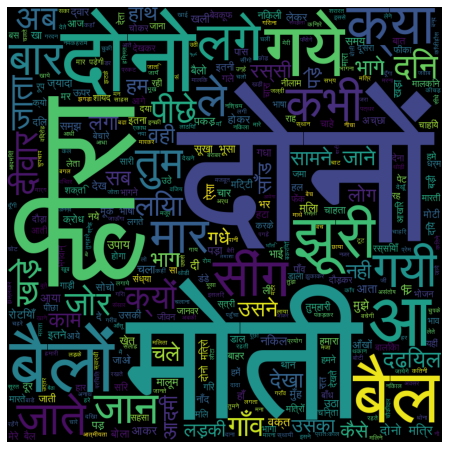

[('दोनों', 46),
 ('दोनो', 35),
 ('मोती', 35),
 ('हीरा', 28),
 ('बैल', 19),
 ('बैलों', 16),
 ('मार', 16),
 ('आ', 15),
 ('गये', 15),
 ('झूरी', 15)]

In [4]:
freq_dict = analyser(story = story_1, filter_status = True)

# checking most common/frequent 10 words
freq_dict.most_common(10)

# STORY 2 : अन्धेर

In [5]:
story_2 = '''
अन्धेर
नागपंचमी आई। साठे के जिन्दादिल नौजवानों ने रंग-बिरंगे जॉँघिये बनवाये। अखाड़े में ढोल की मर्दाना सदायें गूँजने लगीं। आसपास के पहलवान इकट्ठे हुए और अखाड़े पर तम्बोलियों ने अपनी दुकानें सजायीं क्योंकि आज कुश्ती और दोस्ताना मुकाबले का दिन है। औरतों ने गोबर से अपने आँगन लीपे और गाती-बजाती कटोरों में दूध-चावल लिए नाग पूजने चलीं।
साठे और पाठे दो लगे हुए मौजे थे। दोनों गंगा के किनारे। खेती में ज्यादा मशक्कत नहीं करनी पड़ती थी इसीलिए आपस में फौजदारियॉँ खूब होती थीं। आदिकाल से उनके बीच होड़ चली आती थी। साठेवालों को यह घमण्ड था कि उन्होंने पाठेवालों को कभी सिर न उठाने दिया। उसी तरह पाठेवाले अपने प्रतिद्वंद्वियों को नीचा दिखलाना ही जिन्दगी का सबसे बड़ा काम समझते थे। उनका इतिहास विजयों की कहानियों से भरा हुआ था। पाठे के चरवाहे यह गीत गाते हुए चलते थे:

साठेवाले कायर सगरे पाठेवाले हैं सरदार

और साठे के धोबी गाते:

साठेवाले साठ हाथ के जिनके हाथ सदा तरवार।
उन लोगन के जनम नसाये जिन पाठे मान लीन अवतार।।

गरज आपसी होड़ का यह जोश बच्चों में मॉँ दूध के साथ दाखिल होता था और उसके प्रदर्शन का सबसे अच्छा और ऐतिहासिक मौका यही नागपंचमी का दिन था। इस दिन के लिए साल भर तैयारियॉँ होती रहती थीं। आज उनमें मार्के की कुश्ती होने वाली थी। साठे को गोपाल पर नाज था, पाठे को बलदेव का गर्रा। दोनों सूरमा अपने-अपने फरीक की दुआएँ और आरजुएँ लिए हुए अखाड़े में उतरे। तमाशाइयों पर चुम्बक का-सा असर हुआ। मौजें के चौकीदारों ने लट्ठ और डण्डों का यह जमघट देखा और मर्दों की अंगारे की तरह लाल आँखें तो पिछले अनुभव के आधार पर बेपता हो गये। इधर अखाड़े में दॉँव-पेंच होते रहे। बलदेव उलझता था, गोपाल पैंतरे बदलता था। उसे अपनी ताकत का जोम था, इसे अपने करतब का भरोसा। कुछ देर तक अखाड़े से ताल ठोंकने की आवाजें आती रहीं, तब यकायक बहुत-से आदमी खुशी के नारे मार-मार उछलने लगे, कपड़े और बर्तन और पैसे और बताशे लुटाये जाने लगे। किसी ने अपना पुराना साफा फेंका, किसी ने अपनी बोसीदा टोपी हवा में उड़ा दी साठे के मनचले जवान अखाड़े में पिल पड़े। और गोपाल को गोद में उठा लाये। बलदेव और उसके साथियों ने गोपाल को लहू की आँखों से देखा और दॉँत पीसकर रह गये।

२

दस बजे रात का वक्त और सावन का महीना। आसमान पर काली घटाएँ छाई थीं। अंधेरे का यह हाल था कि जैसे रोशनी का अस्तित्व ही नहीं रहा। कभी-कभी बिजली चमकती थी मगर अँधेरे को और ज्यादा अंधेरा करने के लिए। मेंढकों की आवाजें जिन्दगी का पता देती थीं वर्ना और चारों तरफ मौत थी। खामोश, डरावने और गम्भीर साठे के झोंपड़े और मकान इस अंधेरे में बहुत गौर से देखने पर काली-काली भेड़ों की तरह नजर आते थे। न बच्चे रोते थे, न औरतें गाती थीं। पावित्रात्मा बुड्ढे राम नाम न जपते थे।

मगर आबादी से बहुत दूर कई पुरशोर नालों और ढाक के जंगलों से गुजरकर ज्वार और बाजरे के खेत थे और उनकी मेंड़ों पर साठे के किसान जगह-जगह मड़ैया ड़ाले खेतों की रखवाली कर रहे थे। तले जमीन, ऊपर अंधेरा, मीलों तक सन्नाटा छाया हुआ। कहीं जंगली सुअरों के गोल, कहीं नीलगायों के रेवड़, चिलम के सिवा कोई साथी नहीं, आग के सिवा कोई मददगार नहीं। जरा खटका हुआ और चौंके पड़े। अंधेरा भय का दूसरा नाम है, जब मिट्टी का एक ढेर, एक ठूँठा पेड़ और घास का ढेर भी जानदार चीजें बन जाती हैं। अंधेरा उनमें जान ड़ाल देता है। लेकिन यह मजबूत हाथोंवाले, मजबूत जिगरवाले, मजबूत इरादे वाले किसान हैं कि यह सब सख्तियॉ। झेलते हैं ताकि अपने ज्यादा भाग्यशाली भाइयों के लिए भोग-विलास के सामान तैयार करें। इन्हीं रखवालों में आज का हीरो, साठे का गौरव गोपाल भी है जो अपनी मड़ैया में बैठा हुआ है और नींद को भगाने के लिए धीमें सुरों में यह गीत गा रहा है:
मैं तो तोसे नैना लगाय पछतायी रे

अचाकन उसे किसी के पॉँव की आहट मालूम हुई। जैसे हिरन कुत्तों की आवाजों को कान लगाकर सुनता है उसी तरह गोपल ने भी कान लगाकर सुना। नींद की औंघाई दूर हो गई। लट्ठ कंधे पर रक्खा और मड़ैया से बाहर निकल आया। चारों तरफ कालिमा छाई हुई थी और हलकी-हलकी बूंदें पड़ रही थीं। वह बाहर निकला ही था कि उसके सर पर लाठी का भरपूर हाथ पड़ा। वह त्योराकर गिरा और रात भर वहीं बेसुध पड़ा रहा। मालूम नहीं उस पर कितनी चोटें पड़ीं। हमला करनेवालों ने तो अपनी समझ में उसका काम तमाम कर ड़ाला। लेकिन जिन्दगी बाकी थी। यह पाठे के गैरतमन्द लोग थे जिन्होंने अंधेरे की आड़ में अपनी हार का बदला लिया था।

३

गोपाल जाति का अहीर था, न पढ़ा न लिखा, बिलकुल अक्खड़। दिमागा रौशन ही नहीं हुआ तो शरीर का दीपक क्यों घुलता। पूरे छ: फुट का कद, गठा हुआ बदन, ललकान कर गाता तो सुननेवाले मील भर पर बैठे हुए उसकी तानों का मजा लेते। गाने-बजाने का आशिक, होली के दिनों में महीने भर तक गाता, सावन में मल्हार और भजन तो रोज का शगल था। निड़र ऐसा कि भूत और पिशाच के अस्तित्व पर उसे विद्वानों जैसे संदेह थे। लेकिन जिस तरह शेर और चीते भी लाल लपटों से डरते हैं उसी तरह लाल पगड़ी से उसकी रूह असाधारण बात थी लेकिन उसका कुछ बस न था। सिपाही की वह डरावनी तस्वीर जो बचपन में उसके दिल पर खींची गई थी, पत्थर की लकीर बन गई थी। शरारतें गयीं, बचपन गया, मिठाई की भूख गई लेकिन सिपाही की तस्वीर अभी तक कायम थी। आज उसके दरवाजे पर लाल पगड़ीवालों की एक फौज जमा थी लेकिन गोपाल जख्मों से चूर, दर्द से बेचैन होने पर भी अपने मकान के अंधेरे कोने में छिपा हुआ बैठा था। नम्बरदार और मुखिया, पटवारी और चौकीदार रोब खाये हुए ढंग से खड़े दारोगा की खुशामद कर रहे थे। कहीं अहीर की फरियाद सुनाई देती थी, कहीं मोदी रोना-धोना, कहीं तेली की चीख-पुकार, कहीं कमाई की आँखों से लहू जारी। कलवार खड़ा अपनी किस्मत को रो रहा था। फोहश और गन्दी बातों की गर्मबाजारी थी। दारोगा जी निहायत कारगुजार अफसर थे, गालियों में बात करते थे। सुबह को चारपाई से उठते ही गालियों का वजीफा पढ़ते थे। मेहतर ने आकर फरियाद की-हुजूर, अण्डे नहीं हैं, दारोगाजी हण्टर लेकर दौड़े औश्र उस गरीब का भुरकुस निकाल दिया। सारे गॉँव में हलचल पड़ी हुई थी। कांसिटेबल और चौकीदार रास्तों पर यों अकड़ते चलते थे गोया अपनी ससुराल में आये हैं। जब गॉँव के सारे आदमी आ गये तो वारदात हुई और इस कम्बख्त गोलाल ने रपट तक न की।

मुखिया साहब बेंत की तरह कॉँपते हुए बोले-हुजूर, अब माफी दी जाय।

दारोगाजी ने गाजबनाक निगाहों से उसकी तरफ देखकर कहा-यह इसकी शरारत है। दुनिया जानती है कि जुर्म को छुपाना जुर्म करने के बराबर है। मैं इस बदकाश को इसका मजा चखा दूँगा। वह अपनी ताकत के जोम में भूला हुआ है, और कोई बात नहीं। लातों के भूत बातों से नहीं मानते।

मुखिया साहब ने सिर झुकाकर कहा-हुजूर, अब माफी दी जाय।

दारोगाजी की त्योरियॉँ चढ़ गयीं और झुंझलाकर बोले-अरे हजूर के बच्चे, कुछ सठिया तो नहीं गया है। अगर इसी तरह माफी देनी होती तो मुझे क्या कुत्ते ने काटा था कि यहॉँ तक दौड़ा आता। न कोई मामला, न ममाले की बात, बस माफी की रट लगा रक्खी है। मुझे ज्यादा फुरसत नहीं है। नमाज पढ़ता हूँ, तब तक तुम अपना सलाह मशविरा कर लो और मुझे हँसी-खुशी रुखसत करो वर्ना गौसखॉँ को जानते हो, उसका मारा पानी भी नही मॉँगता!

दारोगा तकवे व तहारत के बड़े पाबन्द थे पॉँचों वक्त की नमाज पढ़ते और तीसों रोजे रखते, ईदों में धूमधाम से कुर्बानियॉँ होतीं। इससे अच्छा आचरण किसी आदमी में और क्या हो सकता है!

४

मुखिया साहब दबे पॉँव गुपचुप ढंग से गौरा के पास और बोले-यह दारोगा बड़ा काफिर है, पचास से नीचे तो बात ही नहीं करता। अब्बल दर्जे का थानेदार है। मैंने बहुत कहा, हुजूर, गरीब आदमी है, घर में कुछ सुभीता नहीं, मगर वह एक नहीं सुनता।

गौरा ने घूँघट में मुँह छिपाकर कहा-दादा, उनकी जान बच जाए, कोई तरह की आंच न आने पाए, रूपये-पैसे की कौन बात है, इसी दिन के लिए तो कमाया जाता है।

गोपाल खाट पर पड़ा सब बातें सुन रहा था। अब उससे न रहा गया। लकड़ी गॉँठ ही पर टूटती है। जो गुनाह किया नहीं गया वह दबता है मगर कुचला नहीं जा सकता। वह जोश से उठ बैठा और बोला-पचास रुपये की कौन कहे, मैं पचास कौड़ियॉँ भी न दूँगा। कोई गदर है, मैंने कसूर क्या किया है?

मुखिया का चेहरा फक हो गया। बड़प्पन के स्वर में बोले-धीरे बोलो, कहीं सुन ले तो गजब हो जाए।

लेकिन गोपाल बिफरा हुआ था, अकड़कर बोला-मैं एक कौड़ी भी न दूँगा। देखें कौन मेरे फॉँसी लगा देता है।

गौरा ने बहलाने के स्वर में कहा-अच्छा, जब मैं तुमसे रूपये माँगूँतो मत देना। यह कहकर गौरा ने, जो इस वक्त लौड़ी के बजाय रानी बनी हुई थी, छप्पर के एक कोने में से रुपयों की एक पोटली निकाली और मुखिया के हाथ में रख दी। गोपाल दॉँत पीसकर उठा, लेकिन मुखिया साहब फौरन से पहले सरक गये। दारोगा जी ने गोपाल की बातें सुन ली थीं और दुआ कर रहे थे कि ऐ खुदा, इस मरदूद के दिल को पलट। इतने में मुखिया ने बाहर आकर पचीस रूपये की पोटली दिखाई। पचीस रास्ते ही में गायब हो गये थे। दारोगा जी ने खुदा का शुक्र किया। दुआ सुनी गयी। रुपया जेब में रक्खा और रसद पहुँचाने वालों की भीड़ को रोते और बिलबिलाते छोड़कर हवा हो गये। मोदी का गला घुंट गया। कसाई के गले पर छुरी फिर गयी। तेली पिस गया। मुखिया साहब ने गोपाल की गर्दन पर एहसान रक्खा गोया रसद के दाम गिरह से दिए। गॉँव में सुर्खरू हो गया, प्रतिष्ठा बढ़ गई। इधर गोपाल ने गौरा की खूब खबर ली। गाँव में रात भर यही चर्चा रही। गोपाल बहुत बचा और इसका सेहरा मुखिया के सिर था। बड़ी विपत्ति आई थी। वह टल गयी। पितरों ने, दीवान हरदौल ने, नीम तलेवाली देवी ने, तालाब के किनारे वाली सती ने, गोपाल की रक्षा की। यह उन्हीं का प्रताप था। देवी की पूजा होनी जरूरी थी। सत्यनारायण की कथा भी लाजिमी हो गयी।


५

फिर सुबह हुई लेकिन गोपाल के दरवाजे पर आज लाल पगड़ियों के बजाय लाल साड़ियों का जमघट था। गौरा आज देवी की पूजा करने जाती थी और गॉँव की औरतें उसका साथ देने आई थीं। उसका घर सोंधी-सोंधी मिट्टी की खुशबू से महक रहा था जो खस और गुलाब से कम मोहक न थी। औरतें सुहाने गीत गा रही थीं। बच्चे खुश हो-होकर दौड़ते थे। देवी के चबूतरे पर उसने मिटटी का हाथी चढ़ाया। सती की मॉँग में सेंदुर डाला। दीवान साहब को बताशे और हलुआ खिलाया। हनुमान जी को लड्डू से ज्यादा प्रेम है, उन्हें लड्डू चढ़ाये तब गाती बजाती घर को आयी और सत्यनारायण की कथा की तैयारियॉँ होने लगीं । मालिन फूल के हार, केले की शाखें और बन्दनवारें लायीं। कुम्हार नये-नये दिये और हॉँडियाँ दे गया। बारी हरे ढाक के पत्तल और दोने रख गया। कहार ने आकर मटकों में पानी भरा। बढ़ई ने आकर गोपाल और गौरा के लिए दो नयी-नयी पीढ़ियॉँ बनायीं। नाइन ने ऑंगन लीपा और चौक बनायी। दरवाजे पर बन्दनवारें बँध गयीं। ऑंगन में केले की शाखें गड़ गयीं। पण्डित जी के लिए सिंहासन सज गया। आपस के कामों की व्यवस्था खुद-ब-खुद अपने निश्चित दायरे पर चलने लगी । यही व्यवस्था संस्कृति है जिसने देहात की जिन्दगी को आडम्बर की ओर से उदासीन बना रक्खा है । लेकिन अफसोस है कि अब ऊँच-नीच की बेमतलब और बेहूदा कैदों ने इन आपसी कर्तव्यों को सौहार्द्र सहयोग के पद से हटा कर उन पर अपमान और नीचता का दागालगा दिया है।

शाम हुई। पण्डित मोटेरामजी ने कन्धे पर झोली डाली, हाथ में शंख लिया और खड़ाऊँ पर खटपट करते गोपाल के घर आ पहुँचे। ऑंगन में टाट बिछा हुआ था। गॉँव के प्रतिष्ठित लोग कथा सुनने के लिए आ बैठे। घण्टी बजी, शंख फुंका गया और कथा शुरू हुईं। गोपाल भी गाढ़े की चादर ओढ़े एक कोने में फूंका गया और कथा शुरू हुई। गोजाल भी गाढ़े की चादर ओढ़े एक कोने में दीवार के सहारे बैठा हुआ था। मुखिया, नम्बरदार और पटवारी ने मारे हमदर्दी के उससे कहा—सत्यनारायण क महिमा थी कि तुम पर कोई ऑंच न आई।

गोपाल ने अँगड़ाई लेकर कहा—सत्यनारायण की महिमा नहीं, यह अंधेर है।

- जमाना, जुलाई १९१३'''

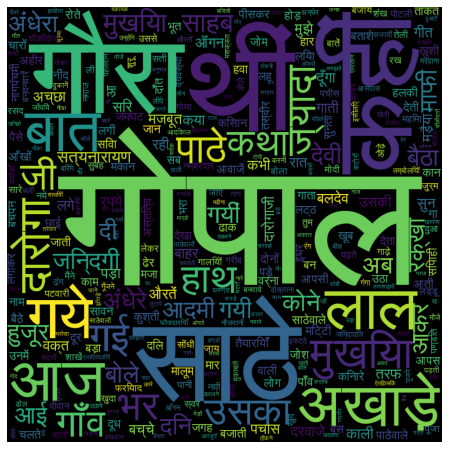

In [6]:
freq_dict = analyser(story = story_2, filter_status = True)

## STORY 3 : दिल की रानी

In [7]:
story_3 = '''
दिल की रानी
जिस वीर तुर्कों के प्रखर प्रताप से ईसाई दुनिया कौप रही थी , उन्‍हीं का रक्‍त आज कुस्‍तुनतुनिया की गलियों में बह रहा है। वही कुस्‍तुनतुनिया जो सौ साल पहले तुर्को के आंतक से राहत हो रहा था, आज उनके गर्म रक्‍त से अपना कलेजा ठण्‍डा कर रहा है। और तुर्की सेनापति एक लाख सिपाहियों के साथ तैमूरी तेज के सामने अपनी किस्‍मत का फैसला सुनने के लिए खडा है।
तैमुर ने विजय से भरी आखें उठाई और सेनापति यजदानी की ओर देख कर सिंह के समान गरजा-क्‍या चाहतें हो जिन्‍दगी या मौत
यजदानी ने गर्व से सिर उठाकार कहा’- इज्‍जत की जिन्‍दगी मिले तो जिन्‍दगी, वरना मौत।
तैमूर का क्रोध प्रचंण्‍ड हो उठा उसने बडे-बडे अभिमानियों का सिर निचा कर दिया था। यह जबाब इस अवसर पर सुनने की उसे ताव न थी । इन एक लाख आदमियों की जान उसकी मुठठी में है। इन्‍हें वह एक क्षण में मसल सकता है। उस पर इतना अभ्‍िमान । इज्‍जत की जिदन्‍गी । इसका यही तो अर्थ हैं कि गरीबों का जीवन अमीरों के भोग-विलास पर बलिदान किया जाए वही शराब की मजजिसें, वही अरमीनिया और काफ की परिया। नही, तैमूर ने खलीफा बायजीद का घमंड इसलिए नहीं तोडा है कि तुर्को को पिर उसी मदांध स्‍वाधीनता में इस्‍लाम का नाम डुबाने को छोड दे । तब उसे इतना रक्‍त बहाने की क्‍या जरूरत थी । मानव-रक्‍त का प्रवाह संगीत का प्रवाह नहीं, रस का प्रवाह नहीं-एक बीभत्‍स दश्‍य है, जिसे देखकर आखें मु‍ह फेर लेती हैं दश्‍य सिर झुका लेता है। तैमूर हिंसक पशु नहीं है, जो यह दश्‍य देखने के लिए अपने जीवन की बाजी लगा दे।
वह अपने शब्‍दों में धिक्‍कार भरकर बोला-जिसे तुम इज्‍जत की जिन्‍दगी कहते हो, वह गुनाह और जहन्‍नुम की जिन्‍दगी है।
यजदानी को तैमुर से दया या क्षमा की आशा न थी। उसकी या उसके योद्वाओं की जान किसी तरह नहीं बच सकती। पिर यह क्‍यों दबें और क्‍यों न जान पर खेलकर तैमूर के प्रति उसके मन में जो घणा है, उसे प्रकट कर दें ? उसके एक बार कातर नेत्रों से उस रूपवान युवक की ओर देखा, जो उसके पीछे खडा, जैसे अपनी जवानी की लगाम खींच रहा था। सान पर चढे हुए, इस्‍पात के समान उसके अंग-अंग से अतुल कोध्र की चिनगारियों निकल रहीं थी। यजदानी ने उसकी सूरत देखी और जैसे अपनी खींची हुई तलवार म्‍यान में कर ली और खून के घूट पीकर बोला-जहापनाह इस वक्‍त फतहमंद हैं लेकिन अपराध क्षमा हो तो कह दू कि अपने जीवन के विषय में तुर्को को तातरियों से उपदेश लेने की जरूरत नहीं। पर जहा खुदा ने नेमतों की वर्षा की हो, वहा उन नेमतों का भोग न करना नाशुक्री है। अगर तलवार ही सभ्‍यता की सनद होती, तो गाल कौम रोमनों से कहीं ज्‍यादा सभ्‍य होती।
तैमूर जोर से हसा और उसके सिपाहियों ने तलवारों पर हाथ रख लिए। तैमूर का ठहाका मौत का ठहाका था या गिरनेवाला वज्र का तडाका ।
तातारवाले पशु हैं क्‍यों ?
मैं यह नहीं कहता।
तुम कहते हो, खुदा ने तुम्‍हें ऐश करने के लिए पैदा किया है। मैं कहता हू, यह कुफ्र है। खुदा ने इन्‍सान को बन्‍दगी के लिए पैदा किया है और इसके खिलाफ जो कोई कुछ करता है, वह कापिर है, जहन्‍नुमी रसूलेपाक हमारी जिन्‍दगी को पाक करने के लिए, हमें सच्‍चा इन्‍सान बनाने के लिए आये थे, हमें हरा की तालीम देने नहीं। तैमूर दुनिया को इस कुफ्र से पाक कर देने का बीडा उठा चुका है। रसूलेपाक के कदमों की कसम, मैं बेरहम नहीं हू जालिम नहीं हू, खूखार नहीं हू, लेकिन कुफ्र की सजा मेरे ईमान में मौत के सिवा कुछ नहीं है।
उसने तातारी सिपहसालार की तरफ कातिल नजरों से देखा और तत्‍क्षण एक देव-सा आदमी तलवार सौतकर यजदानी के सिर पर आ पहुचा। तातारी सेना भी मलवारें खीच-खीचकर तुर्की सेना पर टूट पडी और दम-के-दम में कितनी ही लाशें जमीन पर फडकने लगीं।
सहसा वही रूपवान युवक, जो यजदानी के पीछे खडा था, आगे बढकर तैमूर के सामने आया और जैसे मौत को अपनी दोनों बधी हुई मुटिठयों में मसलता हुआ बोला-ऐ अपने को मुसलमान कहने वाले बादशाह । क्‍या यही वह इस्‍लाम की यही तालीम है कि तू उन बहादुरों का इस बेददी से खून बहाए, जिन्‍होनें इसके सिवा कोई गुनाह नहीं किया कि अपने खलीफा और मुल्‍कों की हिमायत की?
चारों तरफ सन्‍नाटा छा गया। एक युवक, जिसकी अभी मसें भी न भीगी थी; तैमूर जैसे तेजस्‍वी बादशाह का इतने खुले हुए शब्‍दों में तिरस्‍कार करे और उसकी जबान तालू से खिचवा ली जाए। सभी स्‍तम्‍भित हो रहे थे और तैमूर सम्‍मोहित-सा बैठा , उस युवक की ओर ताक रहा था।
युवक ने तातारी सिपाहियों की तरफ, जिनके चेहरों पर कुतूहलमय प्रोत्‍साहन झलक रहा था, देखा और बोला-तू इन मुसलमानों को कापिर कहता है और समझाता है कि तू इन्‍हें कत्‍ल करके खुदा और इस्‍लाम की खिदमत कर रहा है ? मैं तुमसे पूछता हू, अगर वह लोग जो खुदा के सिवा और किसी के सामने सिजदा नहीं करतें, जो रसूलेपाक को अपना रहबर समझते हैं, मुसलमान नहीं है तो कौन मुसलमान हैं ?मैं कहता हू, हम कापिर सही लेकिन तेरे तो हैं क्‍या इस्‍लाम जंजीरों में बंधे हुए कैदियों के कत्‍ल की इजाजत देता है खुदाने अगर तूझे ताकत दी है, अख्‍ितयार दिया है तो क्‍या इसीलिए कि तू खुदा के बन्‍दों का खून बहाए क्‍या गुनाहगारों को कत्‍ल करके तू उन्‍हें सीधे रास्‍ते पर ले जाएगा। तूने कितनी बेहरमी से सत्‍तर हजार बहादुर तुर्को को धोखा देकर सुरंग से उडवा दिया और उनके मासूम बच्‍चों और निपराध स्‍त्रियों को अनाथ कर दिया, तूझे कुछ अनुमान है। क्‍या यही कारनामे है, जिन पर तू अपने मुसलमान होने का गर्व करता है। क्‍या इसी कत्‍ल, खून और बहते दरिया में अपने घोडों के सुम नहीं भिगोए हैं, बल्‍िक इस्‍लाम को जड से खोदकर पेक दिया है। यह वीर तूर्को का ही आत्‍मोत्‍सर्ग है, जिसने यूरोप में इस्‍लाम की तौहीद फैलाई। आज सोपिया के गिरजे में तूझे अल्‍लाह-अकबर की सदा सुनाई दे रही है, सारा यूरोप इस्‍लाम का स्‍वागत करने को तैयार है। क्‍या यह कारनामे इसी लायक हैं कि उनका यह इनाम मिले। इस खयाल को दिल से निकाल दे कि तू खूरेजी से इस्‍लाम की खिदमत कर रहा है। एक दिन तूझे भी परवरदिगार के सामने कर्मो का जवाब देना पडेगा और तेरा कोई उज्र न सुना जाएगा, क्‍योंकि अगर तूझमें अब भी नेक और बद की कमीज बाकी है, तो अपने दिल से पूछ। तूने यह जिहाद खुदा की राह में किया या अपनी हविस के लिए और मैं जानता हू, तूझे जसे जवाब मिलेगा, वह तेरी गर्दन शर्म से झुका देगा।
खलीफा अभी सिर झुकाए ही थी की यजदानी ने कापते हुए शब्‍दों में अर्ज की-जहापनाह, यह गुलाम का लडका है। इसके दिमाग में कुछ पितूर है। हुजूर इसकी गुस्‍ताखियों को मुआफ करें । मैं उसकी सजा झेलने को तैयार हूँ।
तैमूर उस युवक के चेहरे की तरफ स्‍िथर नेत्रों से देख रहा था। आप जीवन में पहली बार उसे निर्भीक शब्‍दों के सुनने का अवसर मिला। उसके सामने बडे-बडे सेनापतियों, मंत्रियों और बादशाहों की जबान न खुलती थी। वह जो कुछ कहता था, वही कानून था, किसी को उसमें चू करने की ताकत न थी। उसका खुशामदों ने उसकी अहम्‍मन्‍यता को आसमान पर चढा दिया था। उसे विश्‍वास हो गया था कि खुदा ने इस्‍लाम को जगाने और सुधारने के लिए ही उसे दुनिया में भेजा है। उसने पैगम्‍बरी का दावा तो नहीं किया, पर उसके मन में यह भावना दढ हो गई थी, इसलिए जब आज एक युवक ने प्राणों का मोह छोडकर उसकी कीर्ति का परदा खोल दिया, तो उसकी चेतना जैसे जाग उठी। उसके मन में क्रोध और हिंसा की जगह ऋद्वा का उदय हुआ। उसकी आंखों का एक इशारा इस युवक की जिन्‍दगी का चिराग गुल कर सकता था । उसकी संसार विजयिनी शक्‍ित के सामने यह दुधमुहा बालक मानो अपने नन्‍हे-नन्‍हे हाथों से समुद्र के प्रवाह को रोकने के लिए खडा हो। कितना हास्‍यास्‍पद साहस था उसके साथ ही कितना आत्‍मविश्‍वास से भरा हुआ। तैमूर को ऐसा जान पडा कि इस निहत्‍थे बालक के सामने वह कितना निर्बल है। मनुष्‍य मे ऐसे साहस का एक ही स्‍त्रोत हो सकता है और वह सत्‍य पर अटल विश्‍वास है। उसकी आत्‍मा दौडकर उस युवक के दामन में चिपट जाने ‍के लिए अधीर हो गई। वह दार्शनिक न था, जो सत्‍य में शंका करता है वह सरल सैनिक था, जो असत्‍य को भी विश्‍वास के साथ सत्‍य बना देता है।
यजदानी ने उसी स्‍वर में कहा-जहापनाह, इसकी बदजबानी का खयाल न फरमावें।
तैमूर ने तुरंत तख्‍त से उठकर यजदानी को गले से लगा लिया और बोला-काश, ऐसी गुस्‍ताखियों और बदजबानियों के सुनने का पहने इत्‍तफाक होता, तो आज इतने बेगुनाहों का खून मेरी गर्दन पर न होता। मूझे इस जबान में किसी फरिश्‍ते की रूह का जलवा नजर आता है, जो मूझ जैसे गुमराहों को सच्‍चा रास्‍ता दिखाने के लिए भेजी गई है। मेरे दोस्‍त, तुम खुशनसीब हो कि ऐस फरिश्‍ता सिफत बेटे के बाप हो। क्‍या मैं उसका नाम पूछ सकता हूँ।
यजदानी पहले आतशपरस्‍त था, पीछे मुसलमान हो गया था , पर अभी तक कभी-कभी उसके मन में शंकाए उठती रहती थीं कि उसने क्‍यों इस्‍लाम कबूल किया। जो कैदी फासी के तख्‍ते पर खडा सूखा जा रहा था कि एक क्षण में रस्‍सी उसकी गर्दन में पडेगी और वह लटकता रह जाएगा, उसे जैसे किसी फरिश्‍ते ने गोद में ले लिया। वह गदगद कंठ से बोला-उसे हबीबी कहते हैं।
तैमूर ने युवक के सामने जाकर उसका हाथ पकड़ लिया और उसे ऑंखों से लगाता हुआ बोला-मेरे जवान दोस्‍त, तुम सचमुच खुदा के हबीब हो, मैं वह गुनाहगार हू, जिसने अपनी जहालत में हमेशा अपने गुनाहों को सवाब समझा, इसलिए कि मुझसे कहा जाता था, तेरी जात बेऐब है। आज मूझे यह मालूम हुआ कि मेरे हाथों इस्‍लाम को कितना नुकसान पहुचा। आज से मैं तुम्‍हारा ही दामन पकडता हू। तुम्‍हीं मेरे खिज्र, तुम्‍ही मेंरे रहनुमा हो। मुझे यकीन हो गया कि तुम्‍हारें ही वसीले से मैं खुदा की दरगाह तक पहुच सकता हॅ।
यह कहते हुए उसने युवक के चेहरे पर नजर डाली, तो उस पर शर्म की लाली छायी हुई थी। उस कठोरता की जगह मधुर संकोच झलक रहा था।
युवक ने सिर झुकाकर कहा- यह हुजूर की कदरदानी है, वरना मेरी क्‍या हस्‍ती है।
तैमूर ने उसे खीचकर अपनी बगल के तख्‍त पर बिठा दिया और अपने सेनापति को हुक्‍म दिया, सारे तुर्क कैदी छोड दिये जाए उनके हथियार वापस कर दिये जाए और जो माल लूटा गया है, वह सिपाहियों में बराबर बाट दिया जाए।
वजीर तो इधर इस हुक्‍म की तामील करने लगा, उधर तैमूर हबीब का हाथ पकडे हुए अपने खीमें में गया और दोनों मेहमानों की दावत का प्रबन्‍ध करने लगा। और जब भोजन समाप्‍त हो गया, तो उसने अपने जीवन की सारी कथा रो-रोकर कह सुनाई, जो आदि से अंत तक मिश्रित पशुता और बर्बरता के कत्‍यों से भरी हुई थी। और उसने यह सब कुछ इस भ्रम में किया कि वह ईश्‍वरीय आदेश का पालन कर रहा है। वह खुदा को कौन मुह दिखाएगा। रोते-रोते हिचकिया बध गई।
अंत में उसने हबीब से कहा- मेरे जवान दोस्‍त अब मेरा बेडा आप ही पार लगा सकते हैं। आपने राह दिखाई है तो मंजिल पर पहुचाइए। मेरी बादशाहत को अब आप ही संभाल सकते हैं। मूझे अब मालूम हो गया कि मैं उसे तबाही के रास्‍ते पर लिए जाता था । मेरी आपसे यही इल्‍तमास (प्रार्थना) है कि आप उसकी वजारत कबूल करें। देखिए , खुदा के लिए इन्‍कार न कीजिएगा, वरना मैं कहीं का नहीं रहूगा।
यजदानी ने अरज की-हुजूर इतनी कदरदानी फरमाते हैं, तो आपकी इनायत है, लेकिन अभी इस लडके की उम्र ही क्‍या है। वजारत की खिदमत यह क्‍या अंजाम दे सकेगा । अभी तो इसकी तालीम के दिन है।
इधर से इनकार होता रहा और उधर तैमूर आग्रह करता रहा। यजदानी इनकार तो कर रहे थे, पर छाती फूली जाती थी । मूसा आग लेने गये थे, पैगम्‍बरी मिल गई। कहा मौत के मुह में जा रहे थे, वजारत मिल गई, लेकिन यह शंका भी थी कि ऐसे अस्‍िथर चिंत का क्‍या ठिकाना आज खुश हुए, वजारत देने को तैयार है, कल नाराज हो गए तो जान की खैरियत नही। उन्‍हें हबीब की लियाकत पर भरोसा था, पिर भी जी डरता था कि वीराने देश में न जाने कैसी पडे, कैसी न पडे। दरबारवालों में षडयंत्र होते ही रहते हैं। हबीब नेक है, समझदार है, अवसर पहचानता है; लेकिन वह तजरबा कहा से लाएगा, जो उम्र ही से आता है।
उन्‍होंने इस प्रश्‍न पर विचार करने के लिए एक दिन की मुहलत मांगी और रूखसत हुए।

2

हबीब यजदानी का लडका नहीं लडकी थी। उसका नाम उम्‍मतुल हबीब था। जिस वक्‍त यजदानी और उसकी पत्‍नी मुसलमान हुए, तो लडकी की उम्र कुल बारह साल की थी, पर प्रकति ने उसे बुदी और प्रतिभा के साथ विचार-स्‍वातंस्‍य भी प्रदान किया था। वह जब तक सत्‍यासत्‍य की परीक्षा न कर लेती, कोई बात स्‍वीकार न करती। मां-बाप के धर्म-परिवर्तन से उसे अशांति तो हुई, पर जब तक इस्‍लाम की दीक्षा न ले सकती थी। मां-बाप भी उस पर किसी तरह का दबाब न डालना चाहते थे। जैसे उन्‍हें अपने धर्म को बदल देने का अधिकार है, वैसे ही उसे अपने धर्म पर आरूढ रहने का भी अधिकार है। लडकी को संतोष हुआ, लेकिन उसने इस्‍लाम और जरथुश्‍त धर्म-दोनों ही का तुलनात्‍मक अध्‍ययन आरंभ किया और पूरे दो साल के अन्‍वेषण और परीक्षण के बाद उसने भी इस्‍लाम की दीक्षा ले ली। माता-पिता फूले न समाए। लड़की उनके दबाव से मुसलमान नहीं हुई है, बल्‍ि‍क स्‍वेच्‍छा से, स्‍वाध्‍याय से और ईमान से। दो साल तक उन्‍हें जो शंका घेरे रहती थी , वह मिट गई।
यजदानी के कोई पुत्र न था और उस युग में जब कि आदमी की तलवार ही सबसे बड़ी अदालत थी, पुत्र का न रहना संसार का सबसे बड़ा दुर्भाग्‍य था। यजदानी बेटे का अरमान बेटी से पूरा करने लगा। लड़कों ही की भाति उसकी शिक्षा-दीक्षा होने लगी। वह बालकों के से कपड़े पहनती, घोड़े पर सवार होती, शस्‍त्र-विधा सीखती और अपने बाप के साथ अक्‍सर खलीफा बायजीद के महलों में जाती और राजकुमारी के साथ शिकार खेलने जाती। इसके साथ ही वह दर्शन, काव्‍य, विज्ञान और अध्‍यात्‍म का भी अभ्‍यास करती थी। यहां तक कि सोलहवें वर्ष में वह फौजी विधालय में दाखिल हो गई और दो साल के अन्‍दर वहा की सबसे ऊची परीक्षा पारा करके फौज में नौकर हो गई। शस्‍त्र-विधा और सेना-संचालन कला में इतनी निपुण थी और खलीफा बायजीद उसके चरित्र से इतना प्रसन्‍न था कि पहले ही पहल उसे एक हजारी मन्‍सब मिल गया ।
ऐसी युवती के चाहनेवालों की क्‍या कमी। उसके साथ के कितने ही अफसर, राज परिवार के के कितश्‍ने ही युवक उस पर प्राण देते थे , पर कोई उसकी नजरों में न जाचता था । नित्‍य ही निकाह के पैगाम आते थे , पर वह हमेशा इंकार कर देती थी। वैवाहिक जीवन ही से उसे अरूचि थी । कि युवतियां कितने अरमानों से व्‍याह कर लायी जाती हैं और पिर कितने निरादर से महलों में बन्‍द कर दी जाती है। उनका भाग्‍य पुरूषों की दया के अधीन है।
अक्‍सर ऊचे घरानों की महिलाओं से उसको मिलने-जुलने का अवसर मिलता था। उनके मुख से उनकी करूण कथा सुनकर वह वैवाहिक पराधीनता से और भी धणा करने लगती थी। और यजदानी उसकी स्‍वाधीनता में बिलकुल बाधा न देता था। लड़की स्‍वाधीन है, उसकी इच्‍छा हो, विवाह करे या क्‍वारी रहे, वह अपनी-आप मुखतार है। उसके पास पैगाम आते, तो वह साफ जवाब दे देता – मैं इस बार में कुछ नहीं जानता, इसका फैसला वही करेगी।
यधपि एक युवती का पुरूष वेष में रहना, युवकों से मिलना-जुलने , समाज में आलोचना का विषय था, पर यजदानी और उसकी स्‍त्री दोनों ही को उसके सतीत्‍व पर विश्‍वास था, हबी‍ब के व्‍यवहार और आचार में उन्‍हें कोई ऐसी बात नजर न आती थी, जिससे उष्‍न्‍हें किसी तरह की शंका होती। यौवन की आधी और लालसाओं के तूफान में वह चौबीस वर्षो की वीरबाला अपने हदय की सम्‍पति लिए अटल और अजेय खड़ी थी , मानों सभी युवक उसके सगे भाई हैं।

3

कुस्‍तुनतुनिया में कितनी खुशियां मनाई गई, हवीब का कितना सम्‍मान और स्‍वागत हुआ, उसे कितनी बधाईयां मिली, यह सब लिखने की बात नहीं शहर तवाह हुआ जाता था। संभव था आज उसके महलों और बाजारों से आग की लपटें निकलती होतीं। राज्‍य और नगर को उस कल्‍पनातीत विपति से बचानेवाला आदमी कितने आदर, प्रेम श्रद्वा और उल्‍लास का पात्र होगा, इसकी तो कल्‍पना भी नहीं की जा सकती । उस पर कितने फूलों और कितश्‍ने लाल-जवाहरों की वर्षा हुई इसका अनुमान तो कोई ‍कवि ही कर सकता है और नगर की महिलाए हदय के अक्षय भंडार से असीसें निकाल-निकालकर उस पर लुटाती थी और गर्व से फूली हुई उसका मुहं निहारकर अपने को धन्‍य मानती थी । उसने देवियों का मस्‍तक ऊचा कर दिया ।
रात को तैमूर के प्रस्‍ताव पर विचार होने लगा। सामने गदेदार कुर्सी पर यजदानी था- सौभ्‍य, विशाल और तेजस्‍वी। उसकी दाहिनी तरफ सकी पत्‍नी थी, ईरानी लिबास में, आंखों में दया और विश्‍वास की ज्‍योति भरे हुए। बायीं तरफ उम्‍मुतुल हबीब थी, जो इस समय रमणी-वेष में मोहिनी बनी हुई थी, ब्रहचर्य के तेज से दीप्‍त।
यजदानी ने प्रस्‍ताव का विरोध करते हुए कहा – मै अपनी तरफ से कुछ नहीं कहना चाहता , लेकिन यदि मुझे सलाह दें का अधिकार है, तो मैं स्‍पष्‍ट कहता हूं कि तुम्‍हें इस प्रस्‍ताव को कभी स्‍वीकार न करना चाहिए , तैमूर से यह बात बहुत दिन तक छिपी नहीं रह सकती कि तुम क्‍या हो। उस वक्‍त क्‍या परिस्‍थिति होगी , मैं नहीं कहता। और यहां इस विषय में जो कुछ टीकाए होगी, वह तुम मुझसे ज्‍यादा जानती हो। यहा मै मौजूद था और कुत्‍सा को मुह न खोलने देता था पर वहा तुम अकेली रहोगी और कुत्‍सा को मनमाने, आरोप करने का अवसर मिलता रहेगा।
उसकी पत्‍नी स्‍वेच्‍छा को इतना महत्‍व न देना चाहती थी । बोली – मैने सुना है, तैमूर निगाहों का अच्‍छा आदमी नहीं है। मै किसी तरह तुझे न जाने दूगीं। कोई बात हो जाए तो सारी दुनिया हंसे। यों ही हसनेवाले क्‍या कम हैं।
इसी तरह स्‍त्री-पुरूष बड़ी देर तक ऊचं –नीच सुझाते और तरह-तरह की शंकाए करते रहें लेकिन हबीब मौन साधे बैठी हुई थी। यजदानी ने समझा , हबीब भी उनसे सहमत है। इनकार की सूचना देने के लिए ही थी कि ‍हबीब ने पूछा – आप तैमूर से क्‍या कहेंगे।
यही जो यहा तय हुआ।
मैने तो अभी कुछ नहीं कहा,
मैने तो समझा , तुम भी हमसे सहमत हो।
जी नही। आप उनसे जाकर कह दे मै स्‍वीकार करती हू।
माता ने छाती पर हाथ रखकर कहा- यह क्‍या गजब करती है बेटी। सोच दुनिया क्‍या कहेगी।
यजदानी भी सिर थामकर बैठ गए , मानो हदय में गोली लग गई हो। मुंह से एक शब्‍द भी न निकला।
हबीब त्‍योरियों पर बल डालकर बोली-अम्‍मीजान , मै आपके हुक्‍म से जौ-भर भी मुह नहीं फेरना चाहती। आपकों पूरा अख्‍ितयार है, मुझे जाने दें या न दें लेकिन खल्‍क की खिदमत का ऐसा मौका शायद मुझे जिंदगी में पिर न मिलें । इस मौके को हाथ से खो देने का अफसोस मुझे उम्र – भर रहेगा । मुझे यकीन है कि अमीन तैमूर को मैं अपनी दियानत, बेगरजी और सच्‍ची वफादारी से इन्‍सान बना सकती है और शायद उसके हाथों खुदा के बंदो का खून इतनी कसरत से न बहे। वह दिलेर है, मगर बेरहम नहीं । कोई दिलेर आदमी बेरहम नहीं हो सकता । उसने अब तक जो कुछ किया है, मजहब के अंधे जोश में किया है। आज खुदा ने मुझे वह मौका दिया है कि मै उसे दिखा दू कि मजहब खिदमत का नाम है, लूट और कत्‍ल का नहीं। अपने बारे में मुझे मुतलक अंदेशा नहीं है। मै अपनी हिफाजत आप कर सकती हूँ । मुझे दावा है कि उपने फर्ज को नेकनीयती से अदा करके मै दुश्‍मनों की जुबान भी बन्‍द कर सकती हू, और मान लीजिए मुझे नाकामी भी हो, तो क्‍या सचाई और हक के लिए कुर्बान हो जाना जिन्‍दगीं की सबसे शानदार फतह नहीं है। अब तक मैने जिस उसूल पर जिन्‍दगी बसर की है, उसने मुझे धोखा नहीं दिया और उसी के फैज से आज मुझे यह दर्जा हासिल हुआ है, जो बड़े-बड़ो के लिए जिन्‍दगी का ख्‍वाब है। मेरे आजमाए हुए दोस्‍त मुझे कभी धोखा नहीं दे सकते । तैमूर पर मेरी हकीकत खुल भी जाए, तो क्‍या खौफ । मेरी तलवार मेरी हिफाजत कर सकती है। शादी पर मेरे ख्‍याल आपको मालूम है। अगर मूझे कोई ऐसा आदमी मिलेगा, जिसे मेरी रूह कबूल करती हो, जिसकी जात अपनी हस्‍ती खोकर मै अपनी रूह को ऊचां उठा सकूं, तो मैं उसके कदमों पर गिरकर अपने को उसकी नजर कर दूगीं।
यजदानी ने खुश होकर बेटी को गले लगा लिया । उसकी स्‍त्री इतनी जल्‍द आश्‍वस्‍त न हो सकी। वह किसी तरह बेटी को अकेली न छोड़ेगी । उसके साथ वह जाएगी।

4

कई महीने गुजर गए। युवक हबीब तैमूर का वजीर है, लेकिन वास्‍तव में वही बादशाह है। तैमूर उसी की आखों से देखता है, उसी के कानों से सुनता है और उसी की अक्‍ल से सोचता है। वह चाहता है, हबीब आठों पहर उसके पास रहे।उसके सामीप्‍य में उसे स्‍वर्ग का-सा सुख मिलता है। समरकंद में एक प्राणी भी ऐसा नहीं, जो उससे जलता हो। उसके बर्ताव ने सभी को मुग्‍ध कर लिया है, क्‍योंकि वह इन्‍साफ से जै-भर भी कदम नहीं हटाता। जो लोग उसके हाथों चलती हुई न्‍याय की चक्‍की में पिस जातें है, वे भी उससे सदभाव ही रखते है, क्‍योकि वह न्‍याय को जरूरत से ज्‍यादा कटु नहीं होने देता।
संध्‍या हो गई थी। राज्‍य कर्मचारी जा चुके थे । शमादान में मोम की बतियों जल रही थी। अगर की सुगधं से सारा दीवानखाना महक रहा था। हबीब उठने ही को था कि चोबदार ने खबर दी-हुजूर जहापनाह तशरीफ ला रहे है।
हबीब इस खबर से कुछ प्रसन्‍न नहीं हुआ। अन्‍य मंत्रियों की भातिं वह तैमूर की सोहबत का भूखा नहीं है। वह हमेशा तैमूर से दूर रहने की चेष्‍टा करता है। ऐसा शायद ही कभी हुआ हो कि उसने शाही दस्‍तरखान पर भोजन किया हो। तैमूर की मजलिसों में भी वह कभी शरीक नहीं होता। उसे जब शांति मिलति है, तब एंकात में अपनी माता के पास बैठकर दिन-भर का माजरा उससे कहता है और वह उस पर अपनी पंसद की मुहर लगा देती है।
उसने द्वार पर जाकर तैमूर का स्‍वागत किया। तैमूर ने मसनद पर बैठते हुए कहा- मुझे ताज्‍जुब होता है कि तुम इस जवानी में जाहिदों की-सी जिंदगी कैसे बसर करते हो ‍हबीब । खुदा ने तुम्‍हें वह हुस्‍न दिया है कि हसीन-से-हसीन नाजनीन भी तुम्‍हारी माशूक बनकर अपने को खुश्‍नसीब समझेगी। मालूम नहीं तुम्‍हें खबर है या नही, जब तुम अपने मुश्‍की घोड़े पर सवार होकर निकलते हो तो समरकंद की खिड़कियों पर हजारों आखें तुम्‍हारी एक झलक देखने के लिए मुंतजिर बैठी रहती है, पर तुम्‍हें किसी तरफ आखें उठाते नहीं देखा । मेरा खुदा गवाह है, मै कितना चाहता हू कि तुम्‍हारें कदमों के नक्‍श पर चलू। मैं चाहता हू जैसे तुम दुनिया में रहकर भी दुनिया से अलग रहते हो , वैसे मैं भी रहूं लेकिन मेरे पास न वह दिल है न वह दिमाग । मैं हमेशा अपने-आप पर, सारी दुनिया पर दात पीसता रहता हू। जैसे मुझे हरदम खून की प्‍यास लगी रहती है , तुम बुझने नहीं देतें , और यह जानते हुए भी कि तुम जो कुछ करते हो, उससे बेहतर कोई दूसरा नहीं कर सकता , मैं अपने गुस्‍से को काबू में नहीं कर सकता । तुम जिधर से निकलते हो, मुहब्‍बत और रोशनी फैला देते हो। जिसकों तुम्‍हारा दुश्‍मन होना चाहिए , वह तुम्‍हारा दोस्‍त है। मैं जिधर से निकलता नफरत और शुबहा फैलाता हुआ निकलता हू। जिसे मेरा दोस्‍त होना चाहिए वह भी मेरा दुश्‍मन है। दुनिया में बस एक ही जगह है, जहा मुझे आपियत मिलती है। अगर तुम मुझे समझते हो, यह ताज और तख्‍त मेरे रांस्‍ते के रोड़े है, तो खुदा की कसम , मैं आज इन पर लात मार दूं। मै आज तुम्‍हारे पास यही दरख्‍वास्‍त लेकर आया हू कि तुम मुझे वह रास्‍ता दिखाओ , जिससे मै सच्‍ची खुशी पा सकू । मै चाहता हूँ , तुम इसी महल में रहों ताकि मै तुमसे सच्‍ची जिंदगी का सबक सीखूं।
हबीब का हदय धक से हो उठा । कहीं अमीन पर नारीत्‍व का रहस्‍य खुल तों नहीं गया। उसकी समझ में न आया कि उसे क्‍या जवाब दे। उसका कोमल हदय तैमूर की इस करूण आत्‍मग्‍लानि पर द्रवित हो गया । जिसके नाम से दुनिया काप‍ती है, वह उसके सामने एक दयनीय प्राथी बना हुआ उसके प्रकाश की भिक्षा मांग रहा है। तैमूर की उस कठोर विकत शुष्‍क हिंसात्‍मक मुद्रा में उसे एक स्‍िनग्‍ध मधुर ज्‍योति दिखाई दी, मानो उसका जागत विवेक भीतर से झाकं रहा हो। उसे अपना ‍जीवन, जिसमें ऊपर की स्‍फूर्ति ही न रही थी, इस विफल उधोग के सामने तुच्‍छ जान पड़ा।
उसने मुग्‍ध कंठ से कहा- हजूर इस गुलाम की इतनी कद्र करते है, यह मेरी खुशनसीबी है, लेकिन मेरा शाही महल में रहना मुनासिब नहीं ।
तैमूर ने पूछा –क्‍यों
इसलिए कि जहा दौलत ज्‍यादा होती है, वहा डाके पड़ते हैं और जहा कद्र ज्‍यादा होती है , वहा दुश्‍मन भी ज्‍यादा होते है।
तुम्‍हारी भी कोई दुश्‍मन हो सकता है।
मै खुद अपना दुश्‍मन हो जाउ गा । आदमी का सबसे बड़ा दुश्‍मन गरूर है।
तैमूर को जैसे कोई रत्‍न मिल गया। उसे अपनी मनतुष्‍िट का आभास हुआ। आदमी का सबसे बड़ा दुश्‍मन गरूर है इस वाक्‍य को मन-ही-मन दोहरा कर उसने कहा-तुम मेरे काबू में कभी न आओगें हबीब। तुम वह परंद हो, जो आसमान में ही उड़ सकता है। उसे सोने के पिंजड़े में भी रखना चाहो तो फड़फड़ाता रहेगा। खैर खुदा हापिज।
यह तुरंत अपने महल की ओर चला, मानो उस रत्‍न को सुरक्षित स्‍थान में रख देना चाहता हो। यह वाक्‍य पहली बार उसने न सुना था पर आज इससे जो ज्ञान, जो आदेश जो सत्‍प्रेरणा उसे मिली, उसे मिली, वह कभी न मिली थी।

5

इस्‍तखर के इलाके से बगावत की खबर आयी है। हबीब को शंका है कि तैमूर वहा पहुचकर कहीं कत्‍लेआम न कर दे। वह शातिंमय उपायों से इस विद्रोह को ठंडा करके तैमूर को दिखाना चाहता है कि सदभावना में कितनी शक्‍ित है। तैमूर उसे इस मुहिम पर नहीं भेजना चाहता लेकिन हबीब के आग्रह के सामने ‍बेबस है। हबीब को जब और कोई युक्‍ित न सूझी तो उसने कहा- गुलाम के रहते हुए हुजूर अपनी जान खतरे में डालें यह नहीं हो सकता ।
तैमूर मुस्‍कराया-मेरी जान की तुम्‍हारी जान के मुकाबले में कोई हकीकत नहीं है हबी‍ब ।पिर मैने तो कभी जान की परवाह न की। मैने दुनिया में कत्‍ल और लूट के सिवा और क्‍या यादगार छोड़ी । मेरे मर जाने पर दुनिया मेरे नाम को रोएगी नही, यकीन मानों । मेरे जैसे लुटेरे हमेशा पैदा हाते रहेगें , लेकिन खुदा न करें, तुम्‍हारे दुश्‍मनों को कुछ हो गया, तो यह सल्‍तश्‍नत खाक में मिल जाएगी, और तब मुझे भी सीने में खंजन चुभा लेने के सिवा और कोई रास्‍ता न रहेगा। मै नहीं कह सकता हबाब तुमसे मैने कितना पाया। काश, दस-पाच साल पहले तुम मुझे मिल जाते, तो तैमूर तवारीख में इतना रूसियाह न होता। आज अगर जरूरत पड़े, तो मैं अपने जैसे सौ तैमूरों को तुम्‍हारे ऊपर निसार कर दू । यही समझ लो कि मेरी रूह‍ को अपने साथ लिये जा रहे हो। आज मै तुमसे कहता हू हबीब कि मुझे तुमसे इश्‍क है इसे मै अब जान पाया हूं । मगर इसमें क्‍या बराई है कि मै भी तुम्‍हारें साथ चलू।
हबीब ने धड़कते हुए हदय से कहा- अगर मैं आपकी जरूरत समझूगा तो इतला दूगां।
तैमूर के दाढ़ी पर हाथ रखकर कहा जैसी-तुम्‍हारी मर्जी लेकिन रोजाना कासिद भेजते रहना, वरना शायद मैं बेचैन होकर चला जाऊ।
तैमूर ने कितनी मुहब्‍बत से हबीब के सफर की तैयारियां की। तरह-तरह के आराम और तकल्‍लुफी की चीजें उसके लिए जमा की। उस कोहिस्‍तान में यह चीजें कहा मिलेगी। वह ऐसा संलग्‍न था, मानों माता अपनी लड़की को ससुराल भेज रही हो।
जिस वक्‍त हबीब फौज के साथ चला, तो सारा समरकंद उसके साथ था और तैमूर आखों पर रूमाल रखें , अपने तख्‍त पर ऐसा सिर झुकाए बैठा था, मानों कोई पक्षी आहत हो गया हो।

6

इस्‍तखर अरमनी ईसाईयों का इलाका था, मुसलमानों ने उन्‍हें परास्‍त करके वहां अपना अधिकार जमा लिया था और ऐसे नियम बना दिए थे, जिससे ईसाइयों को पग-पग अपनी पराधीनता का स्‍मरण होता रहता था। पहला नियम जजिये का था, जो हरेक ईसाई को देना पड़ता ‍था, जिससे मुसलमान मुक्‍त थे। दूसरा नियम यह था कि गिजों में घंटा न बजे। तीसरा नियम का क्रियात्‍मक विरोध किया और जब मुसलमान अधिकारियों ने शस्‍त्र-बल से काम लेना चाहा, तो ईसाइयों ने बगावत कर दी, मुसलमान सूबेदार को कैद कर लिया और किले पर सलीबी झंडा उड़ने लगा।
हबीब को यहा आज दूसरा दिन है पर इस समस्‍या को कैसे हल करे।
उसका उदार हदय कहता था, ईसाइयों पर इन बंधनों का कोई अर्थ नहीं । हरेक धर्म का समान रूप से आदर होना चाहिए , लेकिन मुसलमान इन कैदो को हटा देने पर कभी राजी न होगें । और यह लोग मान भी जाए तो तैमूर क्‍यों मानने लगा। उसके धामिर्क विचारों में कुछ उदारता आई है, पिर भी वह इन कैदों को उठाना कभी मंजूर न करेगा, लेकिन क्‍या वह ईसाइयों को सजा दे कि वे अपनी धार्मिक स्‍वाधीनता के लिए लड़ रहे है। जिसे वह सत्‍य समझता है, उसकी हत्‍या कैसे करे। नहीं, उसे सत्‍य का पालन करना होगा, चाहे इसका नतीजा कुछ भी हो। अमीन समझेगें मै जरूरत से ज्‍यादा बढ़ा जा रहा हू। कोई मुजायका नही।
दूसरे दिन हबीब ने प्रात काल डंके की चोट ऐलान कराया- जजिया माफ किया गया, शराब और घण्‍टों पर कोई कैद नहीं है।
मुसलमानों में तहलका पड़ गया। यह कुप्र है, हरामपरस्‍तह है। अमीन तैमूर ने जिस इस्‍लाम को अपने खून से सीचां , उसकी जड़ उन्‍हीं के वजीर हबीब पाशा के हाथों खुद रही है, पासा पलट गया। शाही फौज मुसलमानों से जा मिल । हबीब ने इस्‍तखर के किले में पनाह ली। मुसलमानों की ताकत शाही फौज के मिल जाने से बहुंत बढ़ गई थी। उन्‍होनें किला घेर लिया और यह समझकर कि हबीब ने तैमूर से बगावत की है, तैमूर के पास इसकी सूचना देने और परिस्‍थिति समझाने के लिए कासिद भेजा।

7

आधी रात गुजर चुकी थी। तैमूर को दो दिनों से इस्‍तखर की कोई खबर न मिली थी। तरह-तरह की शंकाए हो रही थी। मन में पछतावा हो रहा था कि उसने क्‍यों हबीब को अकेला जाने दिया । माना कि वह बड़ा नीतिकुशल है , ‍पर बगावत कहीं जोर पकड़ गयी तो मुटटी –भर आदमियों से वह क्‍या कर सकेगा ।और बगावत यकीनन जोर पकड़ेगी । वहा के ईसाई बला के सरकश है। जब उन्‍हें मालम होगा कि तैमूर की तलवार में जगं लग गया और उसे अब महलों की जिन्‍दगीं पसन्‍द है, तो उनकी हिम्‍मत दूनी हो जाएगी। हबीब कहीं दूश्‍मनों से घिर गया, तो बड़ा गजब हो जाएगा।
उसने अपने जानू पर हाथ मारा और पहलू बदलकर अपने ऊपर झुझलाया । वह इतना पस्‍वहिम्‍मत क्‍यों हो गया। क्‍या उसका तेज और शौर्य उससे विदा हो गया । जिसका नाम सुनकर दुश्‍मन में कम्‍पन पड़ जाता था, वह आज अपना मुह छिपाकर महलो में बैठा हुआ है। दुनिया की आखों में इसका यही अर्थ हो सकता है कि तैमूर अब मैदान का शेर नहीं , कालिन का शेर हो गया । हबीब फरिश्‍ता है, जो इन्‍सान की बुराइयों से वाकिफ नहीं। जो रहम और साफदिली और बेगरजी का देवता है, वह क्‍या जाने इन्‍सान कितना शैतान हो सकता है । अमन के दिनों में तो ये बातें कौम और मुल्‍क को तरक्‍की के रास्‍त पर ले जाती है पर जंग में , जबकि शैतानी जोश का तूपान उठता है इन खुशियों की गुजाइंश नही । उस वक्‍त तो उसी की जीत होती है , जो इन्‍सानी खून का रंग खेले, खेतों –खलिहानों को जलाएं , जगलों को बसाए और बस्‍ितयों को वीरान करे। अमन का कानून जंग के कानून से जूदा है।
सहसा चौकिदार ने इस्‍तखर से एक कासिद के आने की खबर दी। कासिद ने जमीन चूमी और एक किनारें अदब से खड़ा हो गया। तैमूर का रोब ऐसा छा गया कि जो कुछ कहने आया था, वह भूल गया।
तैमूर ने त्‍योरियां चढ़ाकर पूछा- क्‍या खबर लाया है। तीन दिन के बाद आया भी तो इतनी रात गए।
कासिद ने पिर जमीन चूमी और बोला- खुदावंद वजीर साहब ने जजिया मुआफ कर दिया ।
तैमूर गरज उठा- क्‍या कहता है, जजिया माफ कर दिया।
हाँ खुदावंद।
किसने।
वजीर साहब ने।
किसके हुक्‍म से।
अपने हुक्‍म से हुजूर।
हूँ।
और हुजूर , शराब का भी हुक्‍म हो गया है।
हूँ।
गिरजों में घंटों बजाने का भी हुक्‍म हो गया है।
हूँ।
और खुदावंद ईसाइयों से मिलकर मुसलमानों पर हमला कर दिया ।
तो मै क्‍या करू।
हुजूर हमारे मालिक है। अगर हमारी कुछ मदद न हुई तो वहा एक मुसलमान भी जिन्‍दा न बचेगा।
हबीब पाशा इस वक्‍त कहाँ है।
इस्‍तखर के किले में हुजूर ।
और मुसलमान क्‍या कर रहे है।
हमने ईसाइयों को किले में घेर लिया है।
उन्‍हीं के साथ हबीब को भी।
हाँ हुजूर , वह हुजूर से बागी हो गए।
और इसलिए मेरे वपादार इस्‍लाम के खादिमों ने उन्‍हें कैद कर रखा है। मुमकिन है, मेरे पहुचते-पहुचते उन्‍हें कत्‍ल भी कर दें। बदजात, दूर हो जा मेरे सामने से। मुसलमान समझते है, हबीब मेरा नौकर है और मै उसका आका हूं। यह गलत है, झूठ है। इस सल्‍तनत का मालिक हबीब है, तैमूर उसका अदना गुलाम है। उसके फैसले में तैमूर दस्‍तंदाजी नहीं कर सकता । बेशक जजिया मुआफ होना चाहिए। मुझे मजाज नहीं कि दूसरे मजहब वालों से उनके ईमान का तावान लू। कोई मजाज नहीं है, अगर मस्‍िजद में अजान होती है, तो कलीसा में घंटा क्‍यों बजे। घंटे की आवाज में कुफ्र नहीं है। कापिर वह है, जा दूसरों का हक छीन ले जो गरीबों को सताए, दगाबाज हो, खुदगरज हो। कापिर वह नही, जो मिटटी या पत्‍थर क एक टुकड़े में खुदा का नूर देखता हो, जो नदियों और पहाड़ों मे, दरख्‍तों और झाडि़यों में खुदा का जलवा पाता हो। यह हमसे और तुझसे ज्‍यादा खुदापरस्‍त है, जो मस्‍िदज में खुदा को बंद नहीं समझता ही कुफ्र है। हम सब खुदा के बदें है, सब । बस जा और उन बागी मुसलमानों से कह दे, अगर फौरन मुहासरा न उठा लिया गया, तो तैमूर कयामत की तरह आ पहुचेगा।
कासिद हतबुद्वि –सा खड़ा ही था कि बाहर खतरे का बिगुल बज उठा और फौजें किसी समर-यात्रा की तैयारी करने लगी।

8

तीसरे दिन तैमूर इस्‍तखर पहुचा, तो किले का मुहासरा उठ चुका था। किले की तोपों ने उसका स्‍वागत किया। हबीब ने समझा, तैमूर ईसाईयों को सजा देने आ रहा है। ईसाइयों के हाथ-पाव फूले हुए थे , मगर हबीब मुकाबले के लिए ‍तैयार था। ईसाइयों के स्‍वप्‍न की रक्षा में यदि जान भी जाए, तो कोई गम नही। इस मुआमले पर किसी तरह का समझौता नहीं हो सकता। तैमूर अगर तलवार से काम लेना चाहता है,तो उसका जवाब तलवार से दिया जाएगा।
मगर यह क्‍या बात है। शाही फौज सफेद झंडा दिखा रही है। तैमूर लड़ने नहीं सुलह करने आया है। उसका स्‍वागत दूसरी तरह का होगा। ईसाई सरदारों को साथ लिए हबीब किले के बाहर निकला। तैमूर अकेला घोड़े पर सवार चला आ रहा था। हबीब घोड़े से उतरकर आदाब बजा लाया। तैमूर घोड़े से उतर पड़ा और हबीब का माथा चूम लिया और बोला-मैं सब सुन चुका हू हबीब। तुमने बहुत अच्‍छा किया और वही किया जो तुम्‍हारे सिवा दूसरा नहीं कर सकता था। मुझे जजिया लेने का या ईसाईयों से मजहबी हक छीनने का कोई मजाज न था। मै आज दरबार करके इन बातों की तसदीक कर दूगा और तब मै एक ऐसी तजवीज बताऊगा ख्‍ जो कई दिन से मेरे जेहन में आ रही है और मुझे उम्‍मीद है कि तुम उसे मंजूर कर लोगें। मंजूर करना पड़ेगा।
हबीब के चेहरे का रंग उड़ गया था। कहीं हकीकत खुल तो नहीं गई। वह क्‍या तजवीज है, उसके मन में खलबली पड़ गई।
तैमूर ने मूस्‍कराकर पूछा- तुम मुझसे लड़ने को तैयार थे।
हबीब ने शरमाते हुए कहा- हक के सामने अमीन तैमूर की भी कोई हकीकत नही।
बेशक-बेशक । तुममें फरिश्‍तों का दिल है,तो शेरों की हिम्‍मत भी है, लेकिन अफसोस यही है कि तुमने यह गुमान ही क्‍यों किया कि तैमूर तुम्‍हारे फैसले को मंसूख कर सकता है। यह तुम्‍हारी जात है, जिसने तुझे बतलाया है कि सल्‍तनश्‍त किसी आदमी की जायदाद नही बल्‍िक एक ऐसा दरख्‍त है, जिसकी हरेक शाख और पती एक-सी खुराक पाती है।
दोनों किले में दाखिल हुए। सूरज डूब चूका था । आन-की-बान में दरबार लग गया और उसमें तैमूर ने ईसाइयों के धार्मिक अधिकारों को स्‍वीकार किया।
चारों तरफ से आवाज आई- खुदा हमारे शाहंशाह की उम्र दराज करे।
तैमूर ने उसी सिलसिले में कहा-दोस्‍तों , मैं इस दुआ का हकदार नहीं हूँ। जो चीज मैने आपसे जबरन ली थी, उसे आपको वालस देकर मै दुआ का काम नहीं कर रहा हू। इससे कही ज्‍यादा मुनासिब यह है कि आप मुझे लानत दे कि मैने इतने दिनों तक से आवाज आई-मरहबा। मरहबा।
दोस्‍तों उन हको के साथ-सा‍थ मैं आपकी सल्‍तश्‍नत भी आपको वापस करता हू क्‍योंकि खुदा की निगाह में सभी इन्‍सान बराबर है और किसी कौम या शख्‍स को दूसरी कौम पर हुकूमत करने का अख्‍ितयार नहीं है। आज से आप अपने बादशाह है। मुझे उम्‍मीद है कि आप भी मुस्‍िलम आजादी को उसके जायज हको से महरूम न करेगें । मगर कभी ऐसा मौका आए कि कोई जाबिर कौम आपकी आजादी छीनने की कोशिश करे, तो तैमूर आपकी मदद करने को हमेशा तैयार रहेगा।

9

किले में जश्‍न खत्‍म हो चुका है। उमरा और हुक्‍काम रूखसत हो चुके है। दीवाने खास में सिर्फ तैमूर और हबीब रह गए है। हबीब के मुख पर आज स्‍िमत हास्‍य की वह छटा है,जो सदैव गंभीरता के नीचे दबी रहती थी। आज उसके कपोंलो पर जो लाली, आखों में जो नशा, अंगों में जो चंचलता है, वह और कभी नजर न आई थी। वह कई बार तैमूर से शोखिया कर चुका है, कई बार हंसी कर चुका है, उसकी युवती चेतना, पद और अधिकार को भूलकर चहकती पिरती है।
सहसा तैमूर ने कहा- हबीब, मैने आज तक तुम्‍हारी हरेक बात मानी है। अब मै तुमसे यह मजवीज करता हू जिसका मैने जिक्र किया था, उसे तुम्‍हें कबूल करना पड़ेगा।
हबीब ने धड़कते हुए हदय से सिर झुकाकर कहा- फरमाइए।
पहले वायदा करो कि तुम कबूल करोगें।
मै तो आपका गुलाम हू।
नही तुम मेरे मालिक हो, मेरी जिन्‍दगी की रोशनी हो, तुमसे मैने जितना फैज पाया है, उसका अंदाजा नहीं कर सकता । मैने अब तक सल्‍तनत को अपनी जिन्‍दगी की सबसे प्‍यारी चीज समझा था। इसके लिए मैने वह सब कुछ किया जो मुझे न करना चाहिए था। अपनों के खून से भी इन हाथों को दागदार किया गैरों के खून से भी। मेरा काम अब खत्‍म हो चुका। मैने बुनियाद जमा दी इस पर महल बनाना तुम्‍हारा काम है। मेरी यही इल्‍तजा है कि आज से तुम इस बादशाहत के अमीन हो जाओ, मेरी जिन्‍दगी में भी और मरने के बाद भी।
हबीब ने आकाश में उड़ते हुए कहा- इतना बड़ा बोझ। मेरे कंधे इतने मजबूत नही है।
तैमूर ने दीन आग्रह के स्‍वर में कहा- नही मेरे प्‍यारे दोस्‍त, मेरी यह इल्‍तजा माननी पड़ेगी।
हबीब की आखों में हसी थी, अधरों पर संकोच । उसने आहिस्‍ता से कहा- मंजूर है।
तैमूर ने प्रफुल्‍िलत स्‍वर में कहा – खुदा तुम्‍हें सलामत रखे।
लेकिन अगर आपको मालूम हो जाए कि हबीब एक कच्‍ची अक्‍ल की क्‍वारी बालिका है तो।
तो व‍ह मेरी बादशाहत के साथ मेरे दिल की भी रानी हो जाएगी।
आपको बिलकुल ताज्‍जुब नहीं हुआ।
मै जानता था।
कब से।
जब तुमने पहली बार अपने जालिम आखों से मुझें देखा ।
मगर आपने छिपाया खूब।
तुम्‍हीं ने सिखाया । शायद मेरे सिवा यहा किसी को यह बात मालूम नही।
आपने कैसे पहचान लिया।
तैमूर ने मतवाली आखों से देखकर कहा- यह न बताऊगा।
यही हबीब तैमूर की बेगम हमीदों के नाम से मशहूर है।
Email This
BlogThis!
Share to Twitter
Share to Facebook
Share to Pinterest'''

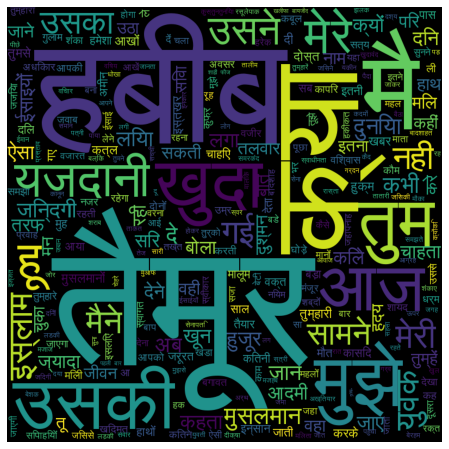

In [8]:
freq_dict = analyser(story = story_3, filter_status = True)

## Hump of stories

In [9]:
hump = '''
जानवरों में गधा सबसे ज्यादा बुद्धिहीन समझा जाता हैं । हम जब किसी आदमी को पल्ले दरजे का बेवकूफ कहना चाहता हैं तो उसे गधा कहते हैं । गधा सचमुच बेवकूफ हैं, या उसके सीधेपन, उसकी निरापद सहिष्णुता ने उसे यह पदवी दे दी हैं, इसका निश्चय नहीं किया जा सकता । गायें सींग मारती हैं, ब्याही हुई गाय तो अनायास ही सिंहनी का रूप धारण कर लेती हैं । कुत्ता भी बहुत गरीब जानवर हैं, लेकिन कभी-कभी उसे भी क्रोध आ जाता हैं, किन्तु गधे को कभी क्रोध करते नहीं सुना । जितना चाहो गरीब को मारो, चाहे जैसी खराब, सड़ी हुई घास सामने डाल दो, उसके चहरे पर कभी असंतोष की छाया भी न दुखायी देरी । वैशाख में चाहे एकाध बार कुलेल कर लेता हो, पर हमने तो उसे कभी खुश होते नहीं देखा । उसके चहरे पर एक स्थायी विषाद स्थायी रूप से छाया रहता हैं । सुख-दुःख, हानि-लाभ, किसी भी दशा में बदलते नहीं देखा । ऋषियों-मुनियों के जितने गुण हैं, वे सभी उसमें पराकाष्ठा को पहुँच गये है, पर आदमी उसे बेवकूफ कहता हैं । सद् गुणों का इतना अनादर कहीं नहीं देखा । कदाचित् सीधापन संसार के लिए उपयुक्त नहीं हैं । देखिये न, भारतवासियों की अफ्रीका में क्यों दुर्दशा हो रही हैं। क्यों अमरीका में उन्हें घुसने नहीं दिया जाता ? बेचारे शराब नहीं पीते, चार पैसे कुसमय के लिए बचाकर रखते हैं, जी तोड़कर काम करते हैं, किसी से लड़ाई-झगड़ा नहीं करते, चार बातें सुनकर गम खा जाते हैं फिर भी बदनाम हैं । कहा जाता हैं, वे जीवन के आदर्श को नीचा करते हैं । अगर वे ईट का जवाब पत्थर से देना सीश जाते तो शायद सभ्य कहलाते लगते । जापान की मिशाल सामने हैं । एक ही विजय ने उसे संसार की सभ्य जातियों में गण्य बना दिया ।

लेकिन गधे का एक छोटा भाई और भी हैं, जो उससे कम गधा हैं और वह हैं बैल । जिस अर्थ में हम गधा का प्रयोग करते हैं, कुछ उसी से मिलते-जुलते अर्थ में ‘बछिया के ताउ’ का भी प्रयोग करते हैं । कुछ लोग बैल को शायद बेवकूफों में सर्वश्रेष्ठ कहेंगे, मगर हमारा विचार ऐसा नहीं हैं । बैल कभी-कभी मारता भी हैं और कभी-कभी अड़ियल बैल भी देखने में आता हैं । और भी कई रीतिओं से अपना असंतोष प्रकट कर देता हैं, अतएव उसका स्थान गधे से नीचा हैं ।

झूरी काछी के दोनो बैलों के बैलों के नाम थे हीरा और मोती । दोनों पछाई जाति के थे — देखने में सुन्दर, काम में चौकस, डील में ऊँचे । बहुत दिनों साथ रहते-रहते दोनों में भाईचारा हो गया । दोनो आमने-सामने या आस-पास बैठे हुए एक दूसरे से मूक भाषा में विचार-विनिमय करते थे । एक-दूसरे के मन की बात कैसे समझ जाते थे, हम नहीं कह सकते । अवश्य ही उनमे कोई ऐसी गुप्त शक्ति था, जिससे जीवों में श्रेष्ठता का दावा करनेवाला मनुष्य वंचित हैं । दोनों एक दूसरे को चाटकर और सूँघकर अपना प्रेम प्रकट करते, कभी-कभी सींग भी मिला लिया करते थे — विग्रह के नाते से नहीं, केवल विनोद के भाव से, आत्मीयता के भाव से, जैसे दोस्तों में घनिष्ठता होते ही धौल-धप्पा होने लगता हैं । इसके बिना दोस्ती कुछ फुसफसी, कुछ हल्की-सी रहती हैं, जिस पर ज्यादा विश्वास नहीं किया जा सकता । जिस वक्त ये दोनों बैल हल या गाड़ी में जोत दिये जाते और गरदन हिला-हिलाकर चलते, उस वक्त हर एक की यही चेष्ठा होती थी कि ज्यादा से ज्यादा बोझ मेरी ही गरदन पर रहे । दिनभर के बाद या संध्या को दोनों खुलते तो एक दुसरे को चाट-चूटकर अपनी थकान मिटा लिया करते । नाँद में खली-भूसा पड़ जाने के बाद दोनों साथ ही उठते, साथ नाँद में मुँह डालते और साथ ही बैठते थे । एक मूँह हटा लेता, तो दूसरा भी हटा लेता ।

सं योग की बात, झूरी ने एक बार गोई को सुसराल भेज दिया । बैलों को क्या मालूम क्यों भेजे जा रहे हैं । समझे, मालिक ने हमे बेच दिया । अपना यों बेचा जाना उन्हें अच्छा लगा या बुरा, कौन जाने , पर झूरी के साले गया को घर तक ले जाने में दाँतों में पसीना आ गया । पीछे से हाँकता तो दोनों दायें-बायें भागते, पगहिया पकड़कर आगे से खींचता, तो दोनो पीछे को जोर लगाते । मारते तो दोनों सींग नीचे करके हुँकारते । अगर ईश्वर ने उन्हें वाणी दी होती, तो झूरी से पूछते — तुम हम गरीबों को क्यों निकाल रहे हो ? हमने तो तुम्हारी सेवा करने में कोई कसर नहीं उठा रखी । अगर इतनी मेहनत से काम न चलता था और काम ले लेते । हमें तो तुम्हारी चाकरी में मर जाना कबूल था । हमने कभी दाने-चारे की शिकाय नही की । तुमने जो कुछ खिलाया, वह सिर झुकाकर खा लिया, फिर भी तुमने हमें उस जालिम के हाथ क्यों बेच दिया ?

संध्या समय दोनों बैल अपने नये स्थान पर पहुँचे । दिन-भर के भूखे थे, लेकिन जब नाँद में लगाये गये, तो एक ने भी उसने मुँह न डाला । दिल-भारी हो रहा था । जिसे उन्होंने अपना घर समझ रखा था, वह आज उनसे छूट गया था । यह नया घर, नया गाँव, नये आदमी, उन्हें बेगानों से लगते थे ।

दोनों ने अपनी मूक-भाषा में सलाह की, एक-दूसरे को कनखियों से देखा और लेट गये । जब गाँव में सोता पड़ गया, तो दोनों ने जोर मारकर पगहे तुड़ा डाले औऱ घर की तगफ चले । पगहे मजबूत थे । अनुमान न हो सकता था कि कोई बैल उन्हें तोड़ सकेगा; पर इन दोनों में इस समय दूना शक्ति आ गयी थी । एक-एक झटके में रस्सियाँ टूट गयी ।

झूरी प्रातःकाल सोकर उठा, तो देखा दोनों बैल चरनी पर खड़े हैं । दोनों की गरदनों में आधा-आधा गराँव लटक रहा हैं । घुटने तक पाँव कीचड़ से भरे हैं और दोनों की आँखों में विद्रोहमय स्नेह झलक रहा हैं ।

झूरी बैलों के देखकर स्नेह से गदगद् हो गया । दौड़कर उन्हे गले लगा लिया । प्रेमालिंगन और चुम्बन का नह दृश्य बड़ा मनोहर था ।

घर और गाँव के लड़के जमा हो गये और तालियाँ बजा-बजाकर उनका स्वागत करने लगे । गाँव के इतिहास में यह घटना अभूतपूर्व न होने पर भी महत्वपूर्ण थी । बाल-सभा ने निश्चय किया, दोनों पशू-वीरों को अभिनन्दन पत्र देना चाहिए । कोई अपने घर से रोटियाँ लाया, कोई गुड़ , कोई चोकर , कोई भूसी ।

एक बालक ने कहा — ऐसे बैल किसी के पास न होंगे । दूसरे ने समर्थन किया — इतनी दूर से दोनों अकेले चले आये । तीसरा बोला — बैल नही हैं वे, उस जनम के आदमी हैं । इसका प्रतिवाद करने का किसी को साहस नहीं हुआ ।

झूरी की स्त्री ने बैलों को द्वार पर देखा तो जल उठी । बोली — कैसे नमकहराम बैल हैं कि एक दिन वहाँ काम न किया , भाग खड़े हुए ।

झूरी अपने बैलों पर यह आक्षेप न सुन सका — नमकहराम क्यों हैं? चारा-दाना न दिया होगा, तो क्या करते ?

स्त्री रोब के साथ कहा — बस, तुम्हीं ही तो बैलों को खिलाना जानते हो और तो सभी पानी पिला-पिलाकर रखते है ।

झूरी ने चिढ़ाया — चारा मिलता तो क्यों भागचे ?

स्त्री चिढ़ी — भागे इसलिए कि वे लोग तुम जैसे बुद्धुओं की तरह बैलों के सहलाते नहीं । खिलाते है तो रगड़कर जोतते भी हैं । ये ठहरे काम-चोर, भाग निकले, अब देखूँ ? कहाँ से खली और चोकर मिलता हैं । सूखे-भूसे के सिवा कुछ न दूँगी , खाये चाहे मरे ।

वही हुआ। मजूर को बड़ी ताकीद कर दी गयी कि बैलों को खाली सूखा भूसा दिया जाय ।

बैलों ने नाँद मे मुँह डाला, तो फीका-फीका । न कोई चिकनाहट, न कोई रस । क्या खायँ ? आशा भरी आँखों से द्वार की ओर ताकने लगे ।

झूरी ने मजूर सा कहा — थोड़ी सी खली क्यों नहीं ड़ाल देता बे ? ‘मालकिन मुझे मार डालेगी।’ ‘चुराकर डाल आ।’ ‘ना दादा, पीछे से तुम ही उन्हीं की-सी कहोगे ।’

2
दूसरे दिन झूरी का साला फिर आया और बैलों को ले चला । अबकी बार उसने दोनों को गाड़ी मे जोता ।

दो-चार बार मोती ने गाड़ी को सड़क की खाई में गिराना चाहा ; पर हीरा ने सँभाल लिया । वह ज्यादा सहनशील था ।

संध्या-समय घर पुहँचकर उसने दोनों को मोटी रस्सियों से बाँधा और कल की शरारत का मजा चखाया . फिर वही सूखा भूसा डाल दिया । अपने दोनों बैलों को खली, चूनी सब कुछ दी ।

दोनों बैलो का ऐसा अपमान कभी न हुआ था । झूरी इन्हें फूल की छड़ी से भी न छूता था । उसकी टिटकार पर दोनों उड़ने लगते थे । यहाँ मार पड़ी । आहत-सम्मान की व्यथा तो थी ही, उस पर मिला सूखा भूसा ।

दूसरे दिन गया ने बैलों को हल में जोता , पर इन दोनों ने जैसे पाँव उठाने की कसम खा ली थी । वह मारते मारते थक गया, पर दोनों ने पाँव न उठाया । एक बार जब उस निर्दयी ने हीरा की नाक पर खूब डंडे जमाये, तो मोती का गुस्सा काबू के बाहर हो गया । हल लेकर भागा, हल रस्सी, जूआ सब टूट-टाट कर बराबर हो गया । गले में बड़ी-बड़ी रस्सियाँ न होती, तो दोनो पकड़ाई में न आते ।

हीरा ने मूक-भाषा में कहा – भागना व्यर्थ हैं । मोती ने उत्तर दिया — तुम्हारी तो इसने जान ही ले ली थी । ‘अबकी बार बड़ी मार पड़ेगी ।’ ‘पड़ने दो, बैल का जन्म लिया हैं तो मार से कहाँ तक बचेंगे?’ ‘गया दो आदमियों के साथ दौड़ा आ रहा हैं। दोनों के हाथ में लाठियाँ हैं ।’ मोती बोला — कहो तो दिखा दूँ कुछ मजा मैं भी । लाठी लेकर आ रहा हैं । हीरा ने समझाया — नहीं भाई ! खड़े हो जाओ । ‘मुझे मारेगा तो मैं भी एक-दो को गिरा दूँगी ।’ ‘नहीं । हमारी जाति का यह धर्म नहीं हैं’

मोती दिल में ऐंठकर रह गया । गया आ पहुँचा और दोनो को पकड़कर ले गया । कुशल हुई कि उसने इस वक्त मारपीट न की, नहीं तो मोती भी पलट पड़ता । उसके तेवर देख कर गया और उसके सहायक समझ गये कि इस वक्त टाल जाना ही मसलहत हैं ।

आज दोनों के सामने फिर वही सूखा भूसा लाया गया । दोनों चुपचाप खड़े रहे। धर के लोग भोजन करने लगे । उस वक्त छोटी-सी लड़की दो रोटियाँ लिये निकली और दोनों के मुँह में देकर चली गयी । उस एक रोटी से इनकी भूख तो क्या शान्त होती, पर दोनों के हृदय को मानो भोजन मिल गया । यहाँ भी किसी सज्जन का वास हैं । लड़की भैरो की थी । उसकी माँ मर चुकी थी । सौतेली माँ उसे मारती रहती थी, इसलिए इन बैलों से उसे एक प्रकार की आत्मीयता हो गयी थी ।

दोनों दिन-भर जोते जाते, डंडे खाते, अड़ते । शाम को थान में बाँध दिये जाते और रात को वही बालिका उन्हें दो रोटियाँ खिला जाती । प्रेम के इस प्रसाद की यह बरकत थी कि दो-दो गाल सूखा भूसा खाकर भी दोनों दुर्बल न होते, मगर दोनों की आँखों में, रोम-रोम में विद्रोह भरा हुआ था ।

एक दिन मोती ने मुक-भाषा में कहा — अब तो नहीं सहा जाता, हीरा । ‘क्या करना चाहते हो ?’ ‘एकाध को सींगो पर उठाकर फेंक दूँगा ।’

‘लेकिन जानते हो, वह प्यारी लड़की, जो हमे रोटियाँ हैं, उसी की लड़की हैं, जो घर का मालिक है । यह बेचारी अनाथ हो जायगी?’ ‘मालकिन को न फेंक दूँ । वही तो उस लड़की मारती हैं।’ ‘लेकिन औरत जात पर सींग चलाना मना है, यह भूले जाते हो ।’ ‘तुम तो किसी तरह निकलने नही देते हो । बताओ, तुड़ा कर भाग चले ।’ ‘हाँ, यह मैं स्वीकार करता, लेकिन इतनी मोटी रस्सी टूटेगी कैसे ?’ ‘इसका एक उपाय हैं। पहले रस्सी को थोड़ा सा चबा दो । फिर एक झटके में जाती हैं। ‘

रात को जब बालिका रोटियाँ खिलाकर चली गयी, दोनों रस्सियाँ चबाने लगे, पर रस्सी मुँह में न आती थी । बेचारे बार-बार जोर लगाकर रह जाते थे ।

सहसा घर का द्वार खुला और वही लड़की निकली । दोनों सिर झुकाकर उसका हाथ चाटने लगे । दोनों की पूँछे खड़ी हों गयी । उसने उनके माथे सहलाये और बोली — खोले देती हूँ । चुपके से भाग जाओ , नहीं तो यहाँ के लोग मार डालेंगे । आज ही घर में सलाह हो रही हैं कि इनकी नाकों में नाथ डाल दी जायँ ।

उसने गराँव खोल दिया, पर दोनों चुपचाप खड़े रहे । मोती ने अपनी भाषा में पूछा — अब चलते क्यों नही। हीरा ने कहा — चलें तो लेकिन कल इस अनाथ पर आफत आयेगी । सब इसी पर संदेह करेंगे । सहसा बालिका चिल्लायी — दोनों फूफावाले बैल भागे जा रहे हैं । ओ दादा ! दोनों बैल भागे जा रहे हैं, जल्दी दौड़ो ।

गया हड़बड़ाकर बाहर निकला और बैलों को पकड़ने चला । वे दोनों भागे । गया ने पीछा किया । और भी तेज हुए । गया ने शोर मचाया । फिर गाँव के कुछ आदमियों को भी साथ लेने के लिए लौटा । दोनों मित्रों को भागने का मौका मिल गया । सीधे दौड़ते चले गये । यहाँ तक कि मार्ग का ज्ञान न रहा । जिस परिचित मार्ग से आये थे, उसका यहाँ पता न था । नये-नये गाँव मिलने लगे । तब दोनों एक खेत के किनारे खड़े होकर सोचने लगे , अब क्या करना चाहिए ।

हीरा ने कहा — मालूम होता हैं, राह भूल गये । ‘तुम भी तो बेताहाशा भागे । वहीं मार गिराना था।’ ‘उसे मार गिराते तो, दुनिया क्या कहती? वह अपना धर्म छोड़ दे, लेकिन हम अपना धर्म क्यों छोड़े ?’

दोनों भूख से व्याकुल हो रहे थे । खेत में मटर खड़ी थी । चरने लगे । रह-रहकर आहट ले लेते थे, कोई आता जाता तो नहीं हैं ।

जब पेट भर गया, दोनों ने आजादी का अनुभव किया तो मस्त होकर उछलने-कूदने लगे । पहले दोनों ने डकार ली । फिर सींग मिलाये और एक दूसरे को ठेलने लगे । मोती ने हीरा को कई कदम पीछे हटा दिया, यहाँ तक कि वह खाई में गिर गया । तब उसे भी क्रोध आया । सभलकर उठा और फिर मोती से मिल गया । मोती ने देखा — खेल में झगड़ा हुआ चाहता हैं तो किनारे हट गया ।

3
अरे ! यह क्या ? कौई साँड़ डौकता चला आ रहा हैं । हाँ, साँड ही हैं । वह सामने आ पहुँचा । दोनो मित्र बगलें झाँक रहे हैं । साँड पूरा हाथी हैं । उससे भिडना जान से हाथ धोना हैं , लेकिन न भिडने पर भी जान बचती नहीं नजर आती । इन्हीं की तरफ आ भी रहा हैं । कितनी भयंकर सूरत हैं ।

मोती ने मूक भाषा में कहा — बुरे फँसे । जान बचेगी ? कोई उपाय सोचो।

हीरा मे चिन्तित स्वर में कहा — अपने घमंड में भूला हुआ हैं । आरजू-विनती न सुनेगा ।

‘भाग क्यों न चले?’

‘भागना कायरता हैं ।’

‘तो फिर यहीं मरो । बन्दा तो नौ-दो-ग्यारह होता हैं ।’

‘और जो दौड़ाये ?’

‘तो फिर कोई उपाय सोचो जल्द ।’

‘उपाय यही हैं कि उस पर दोनो जने एक साथ चोट करे ? मै आगे से रगेदता हूँ तुम पीछे से रगेदो , दोहरी मार पड़ेगी तो भाग खड़ा होगा । मेरी ओर झपटे, तुम बगल से उसके पेट में सींग घुसेड देना । जान जोशिम हैं , पर दूसरा उपाय नहीं है ।’

दोनों मित्र जान हथेली पर लेकर लपके । साँड को भी संगठित शत्रुओ से लडने का तजरबा न था । वह तो एक शत्रु से मल्लयुद्ध करने का आदी था । ज्योही हीरा पर झपटा , मोती ने पीछे से दौड़ाया । साँड उसकी तरउ मुडा, तो हीरा ने रगेदा । साँड चाहता थि कि एक एक करके दोनो को गिरा ले, पर ये दोनो भी उस्ताद थे । उसे अवसर न देते थे । एक बार साँड झल्लाकर हीरा का अन्त कर देने ले लिए चला कि मोती ने बगल से आकर पेट मे सींग भोक दी । साँड क्रोध मे आकर पीछे फिरा तो हीरा ने दूसरे पहलू में सींग चुभा दिया । आखिर बेचारा जख्मी होकर भागा और दोनो मित्रो ने दूर तक उसका पीछा किया । यहाँ तक की साँड बेदम होकर गिर पड़ा । तब दोनो ने उसे छोड़ दिया ।

दोनो मित्र विजय के नशे में झूमते चले जाते थे ।

मोती ने अपनी सांकेतिक भाषा मे कहा — मेरा जी तो चाहता था कि बच्चा को मार ही डालूँ ।

हीरा ने तिरस्कार किया — गिरे हुए बैरी पर सींग न चलाना चाहिये ।

‘यह सब ढोग हैं । बैरी को ऐसा मारना चाहिये कि फिर न उठे ।’

‘अब घर कैसे पहुँचेंगे , वह सोचो ।’

‘पहले कुछ खा ले, तो सोचे ।’

सामने मटर का खेत था ही । मोती उसमे घुस गया । हीरा मना करता रहा, पर उसने एक न सुनी । अभी चार ही ग्रास खाये थे दो आदमी लाठियाँ लिये दौड़ पडे , और दोनो मित्रो के घेर लिया । हीरा तो मेड पर था , निकल गया । मोती सीचे हुए खेत मे था । उसके खुर कीचड़ मे धँसने लगे । न भाग सका । पकड़ लिया । हीरा ने देखा , संगी संकट मे हैं , तो लौट पड़ा फँसेगे तो दोनो फँसेगे । रखवालो ने उसे भी पकड़ लिया ।

प्रातःकाल दोनो काँजीहौस में बन्द कर दिये गये ।

4
दोनो मित्रो को जीवन में पहली बार ऐसा साबिका पड़ा कि सारा दिन बीत गया और खाने को एक तिनका भी न मिला । समझ ही में न आता था , यह कैसा स्वामी हैं । इससे तो गया फिर भी अच्छा था । यहाँ कई भैसे थी, बकरियाँ , कई घोड़े, कई गधे; पर किसी से सामने चारा न था , सब जमीन पर मुरदो की तरह पड़े थे । कई तो इतने कमजार हो गये थे कि खड़े भी न हो सकते थे । सारा दिन दोनो मित्र फाटक की ओर टकटकी लगाये ताकते रहे, पर कोई चारा लेकर न आता न दिखायी दिया । तब दोनो ने दीवार की नमकीन मिट्टी चाटनी शुरु की, पर इससे क्या तृप्ति होती ?

रात को भी जब कुछ भोजन न मिला तो हीरा के दिल में विद्रोह की ज्वाला दहक उठी। मोती से बोला — अब तो नही रहा जाता मोती !

मोती ने सिर लटकाये हुए जवाब दिया — मुझे तो मालूम होतो हैं प्राण निकल रहे हैं ।

‘इतनी जल्दी हिम्मत न हारो भाई ! यहाँ से भागने का कोई उपाय निकलना चाहिये ।’

‘आओ दीवार तोड डालें।’

‘मुझसे तो अब कुछ नही होगा ।’

‘बस इसी बूते अकड़ते थे !’

‘सारी अकड़ निकल गयी।’

बाडे की दीवार कच्ची थी । हीरा मजबूत तो था ही , अपने नुकीले सींग दीवार में गड़ा दिये और जोर मारा, तो मिट्टी का एक चिप्पड निकल आया । फिर तो उसका साहस बढा । इसने दौड-दौडकर दीवार पर कई चोटे की और हर चोट मे थोडी थोड़ी मिट्टी गिराने लगा।

उसी समय काँजीहौस का चौकीदार लालटेन लेकर जानवरो की हाजिरी लेने आ निकला । हीरा का उजड्डपन देखकर उसने उसे कई डंडे रसीद किये और मोटी सी रस्सी से बाँध दिया ।

मोती ने पड़े पड़े कहा — आखिर मार खायी, क्या मिला ?

‘अपने बूते भर जोर तो मार दिया।’

‘ऐसा जोर मारना किस काम का कि औप बंधन मे पड़ गये ।’

‘जोर तो मारता ही जाऊँगा, चाहे कितने वंधन पड़ जाये ।’

‘जान से हाथ धोना पड़ेगा ।’

‘कुछ परवाह नहीं । यो भी तो मरना ही हैं । सोचो, दीवार खुद जाती तो कितनी जाने बच जाती । इतने भाई यहाँ बन्द हैं । किसी के देह में जान नहीं हैं । दो चार दिन और यही हाल रहा तो सब मर जायेगे ।’

‘हाँ, यह बात तो हैं। अच्छा, तो लो, फिर में भी जोर लगाता हूँ ।’

मोती ने भी दीवार मे उसी जगह सींग मारा । थोडी सी मिट्टी गिरी और हिम्मत बढी । फिर तो दीवार में सींग लगा कर इस तरह जोर करने लगा , मानो किसी प्रतिद्वन्द्वी से लड रहा हैं । आखिर कोई दो घंटे की जोर आजमाई के बाद , दीवार का ऊपर से एक हाथ गि गयी । उसने दूनी शक्ति से दूसरा घक्का मारा, तो आधी दीवार गिर गयी ।

दीवार का गिरना था कि अधमरे से पड़े हुए सभी जानवर चेत उठे । तीनो घोड़ियाँ सरपट भाग निकली । फिर बकरियाँ निकली । उसके बाद भैंसे भी खिसक गयी ; पर गधे अभी तक ज्यो के त्या खड़े थे ।

हीरा ने पूछा — तुम दोनो भाग क्यो नहीं जाते ?

एक गधे ने कहा — जो कही फिर पकड़ लिये जायँ ।

‘तो क्या हरज हैं । अभी तो भागने का अवसर हैं ।’

‘हमे तो डर लगता हैं। हम यही पड़े रहेंगे ।’

आधी रात से ऊपर जा चुकी थी । दोनो गधे अभी तक खड़े सोच रहे थे कि भागे या न भागे , और मोती अपने मित्र की रस्सी तोड़ने मे लगा हुआ था । जब वह हार गया तो हीरा ने कहा — तुम जाओ, मुझे यहीं पड़ा रहने दो । शायद कहीम भेट हो जाये ।

मोती ने आँखो मे आँसू लाकर कहा — सुम मुझे इतना स्वार्थी समझते हैं हीरा । हम और तुम इतने दिनो एक साथ रहे हैं । आज तुम विपत्ति मे पड़ गये तो मैं तुम्हें छोडकर अलग हो जाऊँ ।

हीरा ने कहा — बहुत मार पड़ेगी । लोग समझ जायेगे, यह तुम्हारी शरारत हैं ।

मोती गर्व से बोला — जिस अपराध के लिए तुम्हारे गले में बन्धन पड़ा, उसके लिए अगर मुझ पर मार पड़े तो क्या चिन्ता । इतना तो हो ही गया कि नौ-दस प्राणियो की जान बच गयी । वे सब तो आशीर्वाद देगे ।

यह कहते हुए मोती ने दोनो गधों को सींगो से मार मारकर बाड़े के बाहर निकाला और तब बन्धु के पास आकर सो रहा ।

भोर होते ही मुंशी और चौकीदार तथा अन्य कर्मचारियों में कैसी खलबली मची , इसके लिखने की जरुरत नही । बस, इतना ही काफी हैं कि मोती की खूब मरम्मत हुई और उसे भी मोटी रस्सी से बाँध दिया गया ।

5
एक सप्ताह तक दोनो मित्र वहाँ बँधे रहे । किसी ने चारे का एक तृण भी न डाला । हाँ, एक बार पानी दिखा दिया जाता था । यहीं उनका आधार था । दोनों इतने दुबले हो गये थे कि उठा तक न जाता था ; ठठरियाँ निकल आयी थी ।

एक दिन बाडे के सामने डुग्गी बजने लगी और दोपहर होते होते वहाँ पचास-साठ आदमी जमा हो गये । तब दोनो मित्र निकाले गये और उनकी देख भाल होने लगी । लोग आ आकर उनकी सूरत देखते और मन फीका करके चले जाते । ऐसे मृतक बैलो का कौन खरीदार होता ?

सहसा एक दढियल आदमी, जिसकी आँखे लाल थी और मुद्रा अत्यन्त कठोर , आया और दोनो मित्रो के कूल्हों में उँगली गोदकर मुंशीजी से बात करने लगा । उसका चेहरा देखकर अन्तर्ज्ञान सं दोनो मित्रों के दिल काँप उठे । वह कौन है और उन्हें क्यो टटोल रहा हैं, इस विषय में उन्हें कोई सन्देह न हुआ । दोनो ने एक दूसरे को भीत नेत्रों स देखा और सिर झुका लिया ।

हीरा ने कहा — गया के घर से नाहक भागे । अब जान न बचेगी ।

मोती ने अश्रद्धा के भाव से उत्तर दिया — कहते हैं, भगवान सबके ऊपर दया करते हैं । उन्हें हमारे ऊपर क्यो दया नही आती?

‘भगवान् के लिए हमारा मरना-जीना दोनो बराबर हैं । चलो, अच्छा ही है, कुछ दिन उसके पास तो रहेंगे । एक बार भगवान् ने उस लड़की के रूप में हमें बचाया था क्या अब न बचायेंगे ।’

‘यह आदमी छुरी चलायेगा । देख लेना ।’

‘तो क्या चिन्ता हैं? माँस, खाल, सींग, हड्डी सब किसी न किसी काम आ जायेंगी।’

नीलाम हो जाने के बाद दोनो मित्र दढियल के साथ चले । दोनो की बोटी-बोटी काँप रही थी । बेचारे पाँव तक न उठा सकते थे , पर भय के मारे गिरते-पड़ते भागे जाते थे ; क्योकि बह जरा भी चाल धीमी हो जाने पर जोर से डंडा जमा देता था ।

राह में गाय-बैलो का एक रेवड हरे-हरे हार मे चरता नजर आया । सभी जानवर प्रसन्न थे , चिकने , चपल । कोई उछलतास कोई आनन्द से बैठा पागुर करता था । कितना सुखी जीवन था इनका; पर कितने स्वार्थी हैं सब। किसी को चिन्ता नहीं कि उनके दो भाई बधिक के हाथ पड़े कैसे दुःखी है ।

यहसा दोनो को ऐसा मालूम हुआ कि यह परिचित राह हैं । हाँ, इसी रास्ते से गया उन्हे ले गया था । वही खेत, वही बाग, वही गाँव मिलने लगे । सारी थकान, सारी दुर्बलता गायब हो गयी । आह ? यह लो ! अपना ही हार आ गया । इसी कुएँ पर हम पुर चलाने आया करते थे ; यही कुआँ हैं ।

मोती ने कहा — हमारा घर नगीच आ गया ।

हीरा बोला — भगवान् की दया हैं ।

‘मै तो अब घर भागता हूँ ।’

‘यह जाने देगा ?’

‘इसे मार गिराता हूँ ।’

‘नहीं-नहीं, दौड़कर थान पर चलो। वहाँ से आगे न जायेंगे ।’

दोनो उन्मत होकर बछड़ो की भाँति कुलेलें करते हुए घर की ओर दौड़े ।

वह हमारा थान हैं । दोनो दौड़कर अपने थान पर आये और खड़े हो गये । दढियल भी पीछे पीछे दौड़ा चला आता था ।

धूरी द्वार पर बैठा धूप खा रहा था । बैलों को देखते ही दौडा और उन्हें बारी-बारी से गले लगाने लगा। मित्रों की आँखों से आनन्द के आँसू बहने लगे । एक झूरी के हाथ चाट रहा था ।

दढियल ने जाकर बैलो की रस्सी पकड़ ली ।

झूरी ने कहा — मेरे बैल हैं ।

‘तुम्हारे बैल कैसे ? मैं मवेशीखाने से नीलाम लिये आता हूँ ।’

‘मैं समझता हूँ कि चुराये लिये आते हो ! चुपके से चले जाओ । मेरे बैल हैे । मैं बेचूँगा तो बिकेंगे । किसी को मेरे बैल नीलाम करने का क्या अख्तियार हैं ?’

‘जाकर थाने मे रपट कर दूँगा ।’

‘मेरे बैल हैं। इसका सबूत हैं कि मेरे द्वार पर खड़े हैं ।’

दढियल झल्लाकर बैलो को जबरदस्ती पकड़ ले जाने के लिए बढा । उसी वक्त मोती ने सींग चलाया । दढियल पीछे हटा । मोती ने पीछा किया । दढियल भागा। मोती पीछे दौड़ा । गाँव के बाहर निकल जाने पर वह रुका ; पर खड़ा दढियल का रास्ता देख रहा था । दढियल दूर खड़ा धमकियाँ दे रहा था, गालियाँ निकाल रहा था , पत्थर फेंक रहा था । और मोती विजयी शूर की भाँति उसका रास्ता रोके खड़ा था । गाँव के लोग यह तमाशा देखते थे और हँसते थे ।

जब दढियल हारकर चला गया , तो मोती अकड़ता हुआ लौटा ।

हीरा मे कहा — मैं डर रहा था कि कहीं तुम गुस्से मे आकर मार न बैठो ।

‘अगर वह मुझे पकड़ता , तो बे-मारे न छोड़ता ।’

‘अब न आयेगा ।’

‘आयेगा तो दूर ही से खबर लूँगा । देखूँ कैसे ले जाता हैं ।’

‘जो गोली मरवा दे ?’

‘मर जाऊँगा ; पर उसके काम तो न आऊँगा ।’

‘हमारी जान को कोई जान ही नहीं समझता ।’

‘इसीलिए कि हम इतने सीधे हैं ।’

जरा देर मे नादों में खली , भूसा, चोकर और दाना भर दिया गया और दोनो मित्र खाने लगे । झूरी खड़ा दोनो को सहला रहा था और बीसो लड़के तमाशा देख रहे थे । सारे गाँव में उछाह-सा मालूम होता था ।

उसी समय मालकिन ने आकर दोनो के माथे चूम लिये ।
अन्धेर
नागपंचमी आई। साठे के जिन्दादिल नौजवानों ने रंग-बिरंगे जॉँघिये बनवाये। अखाड़े में ढोल की मर्दाना सदायें गूँजने लगीं। आसपास के पहलवान इकट्ठे हुए और अखाड़े पर तम्बोलियों ने अपनी दुकानें सजायीं क्योंकि आज कुश्ती और दोस्ताना मुकाबले का दिन है। औरतों ने गोबर से अपने आँगन लीपे और गाती-बजाती कटोरों में दूध-चावल लिए नाग पूजने चलीं।
साठे और पाठे दो लगे हुए मौजे थे। दोनों गंगा के किनारे। खेती में ज्यादा मशक्कत नहीं करनी पड़ती थी इसीलिए आपस में फौजदारियॉँ खूब होती थीं। आदिकाल से उनके बीच होड़ चली आती थी। साठेवालों को यह घमण्ड था कि उन्होंने पाठेवालों को कभी सिर न उठाने दिया। उसी तरह पाठेवाले अपने प्रतिद्वंद्वियों को नीचा दिखलाना ही जिन्दगी का सबसे बड़ा काम समझते थे। उनका इतिहास विजयों की कहानियों से भरा हुआ था। पाठे के चरवाहे यह गीत गाते हुए चलते थे:

साठेवाले कायर सगरे पाठेवाले हैं सरदार

और साठे के धोबी गाते:

साठेवाले साठ हाथ के जिनके हाथ सदा तरवार।
उन लोगन के जनम नसाये जिन पाठे मान लीन अवतार।।

गरज आपसी होड़ का यह जोश बच्चों में मॉँ दूध के साथ दाखिल होता था और उसके प्रदर्शन का सबसे अच्छा और ऐतिहासिक मौका यही नागपंचमी का दिन था। इस दिन के लिए साल भर तैयारियॉँ होती रहती थीं। आज उनमें मार्के की कुश्ती होने वाली थी। साठे को गोपाल पर नाज था, पाठे को बलदेव का गर्रा। दोनों सूरमा अपने-अपने फरीक की दुआएँ और आरजुएँ लिए हुए अखाड़े में उतरे। तमाशाइयों पर चुम्बक का-सा असर हुआ। मौजें के चौकीदारों ने लट्ठ और डण्डों का यह जमघट देखा और मर्दों की अंगारे की तरह लाल आँखें तो पिछले अनुभव के आधार पर बेपता हो गये। इधर अखाड़े में दॉँव-पेंच होते रहे। बलदेव उलझता था, गोपाल पैंतरे बदलता था। उसे अपनी ताकत का जोम था, इसे अपने करतब का भरोसा। कुछ देर तक अखाड़े से ताल ठोंकने की आवाजें आती रहीं, तब यकायक बहुत-से आदमी खुशी के नारे मार-मार उछलने लगे, कपड़े और बर्तन और पैसे और बताशे लुटाये जाने लगे। किसी ने अपना पुराना साफा फेंका, किसी ने अपनी बोसीदा टोपी हवा में उड़ा दी साठे के मनचले जवान अखाड़े में पिल पड़े। और गोपाल को गोद में उठा लाये। बलदेव और उसके साथियों ने गोपाल को लहू की आँखों से देखा और दॉँत पीसकर रह गये।

२

दस बजे रात का वक्त और सावन का महीना। आसमान पर काली घटाएँ छाई थीं। अंधेरे का यह हाल था कि जैसे रोशनी का अस्तित्व ही नहीं रहा। कभी-कभी बिजली चमकती थी मगर अँधेरे को और ज्यादा अंधेरा करने के लिए। मेंढकों की आवाजें जिन्दगी का पता देती थीं वर्ना और चारों तरफ मौत थी। खामोश, डरावने और गम्भीर साठे के झोंपड़े और मकान इस अंधेरे में बहुत गौर से देखने पर काली-काली भेड़ों की तरह नजर आते थे। न बच्चे रोते थे, न औरतें गाती थीं। पावित्रात्मा बुड्ढे राम नाम न जपते थे।

मगर आबादी से बहुत दूर कई पुरशोर नालों और ढाक के जंगलों से गुजरकर ज्वार और बाजरे के खेत थे और उनकी मेंड़ों पर साठे के किसान जगह-जगह मड़ैया ड़ाले खेतों की रखवाली कर रहे थे। तले जमीन, ऊपर अंधेरा, मीलों तक सन्नाटा छाया हुआ। कहीं जंगली सुअरों के गोल, कहीं नीलगायों के रेवड़, चिलम के सिवा कोई साथी नहीं, आग के सिवा कोई मददगार नहीं। जरा खटका हुआ और चौंके पड़े। अंधेरा भय का दूसरा नाम है, जब मिट्टी का एक ढेर, एक ठूँठा पेड़ और घास का ढेर भी जानदार चीजें बन जाती हैं। अंधेरा उनमें जान ड़ाल देता है। लेकिन यह मजबूत हाथोंवाले, मजबूत जिगरवाले, मजबूत इरादे वाले किसान हैं कि यह सब सख्तियॉ। झेलते हैं ताकि अपने ज्यादा भाग्यशाली भाइयों के लिए भोग-विलास के सामान तैयार करें। इन्हीं रखवालों में आज का हीरो, साठे का गौरव गोपाल भी है जो अपनी मड़ैया में बैठा हुआ है और नींद को भगाने के लिए धीमें सुरों में यह गीत गा रहा है:
मैं तो तोसे नैना लगाय पछतायी रे

अचाकन उसे किसी के पॉँव की आहट मालूम हुई। जैसे हिरन कुत्तों की आवाजों को कान लगाकर सुनता है उसी तरह गोपल ने भी कान लगाकर सुना। नींद की औंघाई दूर हो गई। लट्ठ कंधे पर रक्खा और मड़ैया से बाहर निकल आया। चारों तरफ कालिमा छाई हुई थी और हलकी-हलकी बूंदें पड़ रही थीं। वह बाहर निकला ही था कि उसके सर पर लाठी का भरपूर हाथ पड़ा। वह त्योराकर गिरा और रात भर वहीं बेसुध पड़ा रहा। मालूम नहीं उस पर कितनी चोटें पड़ीं। हमला करनेवालों ने तो अपनी समझ में उसका काम तमाम कर ड़ाला। लेकिन जिन्दगी बाकी थी। यह पाठे के गैरतमन्द लोग थे जिन्होंने अंधेरे की आड़ में अपनी हार का बदला लिया था।

३

गोपाल जाति का अहीर था, न पढ़ा न लिखा, बिलकुल अक्खड़। दिमागा रौशन ही नहीं हुआ तो शरीर का दीपक क्यों घुलता। पूरे छ: फुट का कद, गठा हुआ बदन, ललकान कर गाता तो सुननेवाले मील भर पर बैठे हुए उसकी तानों का मजा लेते। गाने-बजाने का आशिक, होली के दिनों में महीने भर तक गाता, सावन में मल्हार और भजन तो रोज का शगल था। निड़र ऐसा कि भूत और पिशाच के अस्तित्व पर उसे विद्वानों जैसे संदेह थे। लेकिन जिस तरह शेर और चीते भी लाल लपटों से डरते हैं उसी तरह लाल पगड़ी से उसकी रूह असाधारण बात थी लेकिन उसका कुछ बस न था। सिपाही की वह डरावनी तस्वीर जो बचपन में उसके दिल पर खींची गई थी, पत्थर की लकीर बन गई थी। शरारतें गयीं, बचपन गया, मिठाई की भूख गई लेकिन सिपाही की तस्वीर अभी तक कायम थी। आज उसके दरवाजे पर लाल पगड़ीवालों की एक फौज जमा थी लेकिन गोपाल जख्मों से चूर, दर्द से बेचैन होने पर भी अपने मकान के अंधेरे कोने में छिपा हुआ बैठा था। नम्बरदार और मुखिया, पटवारी और चौकीदार रोब खाये हुए ढंग से खड़े दारोगा की खुशामद कर रहे थे। कहीं अहीर की फरियाद सुनाई देती थी, कहीं मोदी रोना-धोना, कहीं तेली की चीख-पुकार, कहीं कमाई की आँखों से लहू जारी। कलवार खड़ा अपनी किस्मत को रो रहा था। फोहश और गन्दी बातों की गर्मबाजारी थी। दारोगा जी निहायत कारगुजार अफसर थे, गालियों में बात करते थे। सुबह को चारपाई से उठते ही गालियों का वजीफा पढ़ते थे। मेहतर ने आकर फरियाद की-हुजूर, अण्डे नहीं हैं, दारोगाजी हण्टर लेकर दौड़े औश्र उस गरीब का भुरकुस निकाल दिया। सारे गॉँव में हलचल पड़ी हुई थी। कांसिटेबल और चौकीदार रास्तों पर यों अकड़ते चलते थे गोया अपनी ससुराल में आये हैं। जब गॉँव के सारे आदमी आ गये तो वारदात हुई और इस कम्बख्त गोलाल ने रपट तक न की।

मुखिया साहब बेंत की तरह कॉँपते हुए बोले-हुजूर, अब माफी दी जाय।

दारोगाजी ने गाजबनाक निगाहों से उसकी तरफ देखकर कहा-यह इसकी शरारत है। दुनिया जानती है कि जुर्म को छुपाना जुर्म करने के बराबर है। मैं इस बदकाश को इसका मजा चखा दूँगा। वह अपनी ताकत के जोम में भूला हुआ है, और कोई बात नहीं। लातों के भूत बातों से नहीं मानते।

मुखिया साहब ने सिर झुकाकर कहा-हुजूर, अब माफी दी जाय।

दारोगाजी की त्योरियॉँ चढ़ गयीं और झुंझलाकर बोले-अरे हजूर के बच्चे, कुछ सठिया तो नहीं गया है। अगर इसी तरह माफी देनी होती तो मुझे क्या कुत्ते ने काटा था कि यहॉँ तक दौड़ा आता। न कोई मामला, न ममाले की बात, बस माफी की रट लगा रक्खी है। मुझे ज्यादा फुरसत नहीं है। नमाज पढ़ता हूँ, तब तक तुम अपना सलाह मशविरा कर लो और मुझे हँसी-खुशी रुखसत करो वर्ना गौसखॉँ को जानते हो, उसका मारा पानी भी नही मॉँगता!

दारोगा तकवे व तहारत के बड़े पाबन्द थे पॉँचों वक्त की नमाज पढ़ते और तीसों रोजे रखते, ईदों में धूमधाम से कुर्बानियॉँ होतीं। इससे अच्छा आचरण किसी आदमी में और क्या हो सकता है!

४

मुखिया साहब दबे पॉँव गुपचुप ढंग से गौरा के पास और बोले-यह दारोगा बड़ा काफिर है, पचास से नीचे तो बात ही नहीं करता। अब्बल दर्जे का थानेदार है। मैंने बहुत कहा, हुजूर, गरीब आदमी है, घर में कुछ सुभीता नहीं, मगर वह एक नहीं सुनता।

गौरा ने घूँघट में मुँह छिपाकर कहा-दादा, उनकी जान बच जाए, कोई तरह की आंच न आने पाए, रूपये-पैसे की कौन बात है, इसी दिन के लिए तो कमाया जाता है।

गोपाल खाट पर पड़ा सब बातें सुन रहा था। अब उससे न रहा गया। लकड़ी गॉँठ ही पर टूटती है। जो गुनाह किया नहीं गया वह दबता है मगर कुचला नहीं जा सकता। वह जोश से उठ बैठा और बोला-पचास रुपये की कौन कहे, मैं पचास कौड़ियॉँ भी न दूँगा। कोई गदर है, मैंने कसूर क्या किया है?

मुखिया का चेहरा फक हो गया। बड़प्पन के स्वर में बोले-धीरे बोलो, कहीं सुन ले तो गजब हो जाए।

लेकिन गोपाल बिफरा हुआ था, अकड़कर बोला-मैं एक कौड़ी भी न दूँगा। देखें कौन मेरे फॉँसी लगा देता है।

गौरा ने बहलाने के स्वर में कहा-अच्छा, जब मैं तुमसे रूपये माँगूँतो मत देना। यह कहकर गौरा ने, जो इस वक्त लौड़ी के बजाय रानी बनी हुई थी, छप्पर के एक कोने में से रुपयों की एक पोटली निकाली और मुखिया के हाथ में रख दी। गोपाल दॉँत पीसकर उठा, लेकिन मुखिया साहब फौरन से पहले सरक गये। दारोगा जी ने गोपाल की बातें सुन ली थीं और दुआ कर रहे थे कि ऐ खुदा, इस मरदूद के दिल को पलट। इतने में मुखिया ने बाहर आकर पचीस रूपये की पोटली दिखाई। पचीस रास्ते ही में गायब हो गये थे। दारोगा जी ने खुदा का शुक्र किया। दुआ सुनी गयी। रुपया जेब में रक्खा और रसद पहुँचाने वालों की भीड़ को रोते और बिलबिलाते छोड़कर हवा हो गये। मोदी का गला घुंट गया। कसाई के गले पर छुरी फिर गयी। तेली पिस गया। मुखिया साहब ने गोपाल की गर्दन पर एहसान रक्खा गोया रसद के दाम गिरह से दिए। गॉँव में सुर्खरू हो गया, प्रतिष्ठा बढ़ गई। इधर गोपाल ने गौरा की खूब खबर ली। गाँव में रात भर यही चर्चा रही। गोपाल बहुत बचा और इसका सेहरा मुखिया के सिर था। बड़ी विपत्ति आई थी। वह टल गयी। पितरों ने, दीवान हरदौल ने, नीम तलेवाली देवी ने, तालाब के किनारे वाली सती ने, गोपाल की रक्षा की। यह उन्हीं का प्रताप था। देवी की पूजा होनी जरूरी थी। सत्यनारायण की कथा भी लाजिमी हो गयी।


५

फिर सुबह हुई लेकिन गोपाल के दरवाजे पर आज लाल पगड़ियों के बजाय लाल साड़ियों का जमघट था। गौरा आज देवी की पूजा करने जाती थी और गॉँव की औरतें उसका साथ देने आई थीं। उसका घर सोंधी-सोंधी मिट्टी की खुशबू से महक रहा था जो खस और गुलाब से कम मोहक न थी। औरतें सुहाने गीत गा रही थीं। बच्चे खुश हो-होकर दौड़ते थे। देवी के चबूतरे पर उसने मिटटी का हाथी चढ़ाया। सती की मॉँग में सेंदुर डाला। दीवान साहब को बताशे और हलुआ खिलाया। हनुमान जी को लड्डू से ज्यादा प्रेम है, उन्हें लड्डू चढ़ाये तब गाती बजाती घर को आयी और सत्यनारायण की कथा की तैयारियॉँ होने लगीं । मालिन फूल के हार, केले की शाखें और बन्दनवारें लायीं। कुम्हार नये-नये दिये और हॉँडियाँ दे गया। बारी हरे ढाक के पत्तल और दोने रख गया। कहार ने आकर मटकों में पानी भरा। बढ़ई ने आकर गोपाल और गौरा के लिए दो नयी-नयी पीढ़ियॉँ बनायीं। नाइन ने ऑंगन लीपा और चौक बनायी। दरवाजे पर बन्दनवारें बँध गयीं। ऑंगन में केले की शाखें गड़ गयीं। पण्डित जी के लिए सिंहासन सज गया। आपस के कामों की व्यवस्था खुद-ब-खुद अपने निश्चित दायरे पर चलने लगी । यही व्यवस्था संस्कृति है जिसने देहात की जिन्दगी को आडम्बर की ओर से उदासीन बना रक्खा है । लेकिन अफसोस है कि अब ऊँच-नीच की बेमतलब और बेहूदा कैदों ने इन आपसी कर्तव्यों को सौहार्द्र सहयोग के पद से हटा कर उन पर अपमान और नीचता का दागालगा दिया है।

शाम हुई। पण्डित मोटेरामजी ने कन्धे पर झोली डाली, हाथ में शंख लिया और खड़ाऊँ पर खटपट करते गोपाल के घर आ पहुँचे। ऑंगन में टाट बिछा हुआ था। गॉँव के प्रतिष्ठित लोग कथा सुनने के लिए आ बैठे। घण्टी बजी, शंख फुंका गया और कथा शुरू हुईं। गोपाल भी गाढ़े की चादर ओढ़े एक कोने में फूंका गया और कथा शुरू हुई। गोजाल भी गाढ़े की चादर ओढ़े एक कोने में दीवार के सहारे बैठा हुआ था। मुखिया, नम्बरदार और पटवारी ने मारे हमदर्दी के उससे कहा—सत्यनारायण क महिमा थी कि तुम पर कोई ऑंच न आई।

गोपाल ने अँगड़ाई लेकर कहा—सत्यनारायण की महिमा नहीं, यह अंधेर है।

- जमाना, जुलाई १९१३
दिल की रानी
जिस वीर तुर्कों के प्रखर प्रताप से ईसाई दुनिया कौप रही थी , उन्‍हीं का रक्‍त आज कुस्‍तुनतुनिया की गलियों में बह रहा है। वही कुस्‍तुनतुनिया जो सौ साल पहले तुर्को के आंतक से राहत हो रहा था, आज उनके गर्म रक्‍त से अपना कलेजा ठण्‍डा कर रहा है। और तुर्की सेनापति एक लाख सिपाहियों के साथ तैमूरी तेज के सामने अपनी किस्‍मत का फैसला सुनने के लिए खडा है।
तैमुर ने विजय से भरी आखें उठाई और सेनापति यजदानी की ओर देख कर सिंह के समान गरजा-क्‍या चाहतें हो जिन्‍दगी या मौत
यजदानी ने गर्व से सिर उठाकार कहा’- इज्‍जत की जिन्‍दगी मिले तो जिन्‍दगी, वरना मौत।
तैमूर का क्रोध प्रचंण्‍ड हो उठा उसने बडे-बडे अभिमानियों का सिर निचा कर दिया था। यह जबाब इस अवसर पर सुनने की उसे ताव न थी । इन एक लाख आदमियों की जान उसकी मुठठी में है। इन्‍हें वह एक क्षण में मसल सकता है। उस पर इतना अभ्‍िमान । इज्‍जत की जिदन्‍गी । इसका यही तो अर्थ हैं कि गरीबों का जीवन अमीरों के भोग-विलास पर बलिदान किया जाए वही शराब की मजजिसें, वही अरमीनिया और काफ की परिया। नही, तैमूर ने खलीफा बायजीद का घमंड इसलिए नहीं तोडा है कि तुर्को को पिर उसी मदांध स्‍वाधीनता में इस्‍लाम का नाम डुबाने को छोड दे । तब उसे इतना रक्‍त बहाने की क्‍या जरूरत थी । मानव-रक्‍त का प्रवाह संगीत का प्रवाह नहीं, रस का प्रवाह नहीं-एक बीभत्‍स दश्‍य है, जिसे देखकर आखें मु‍ह फेर लेती हैं दश्‍य सिर झुका लेता है। तैमूर हिंसक पशु नहीं है, जो यह दश्‍य देखने के लिए अपने जीवन की बाजी लगा दे।
वह अपने शब्‍दों में धिक्‍कार भरकर बोला-जिसे तुम इज्‍जत की जिन्‍दगी कहते हो, वह गुनाह और जहन्‍नुम की जिन्‍दगी है।
यजदानी को तैमुर से दया या क्षमा की आशा न थी। उसकी या उसके योद्वाओं की जान किसी तरह नहीं बच सकती। पिर यह क्‍यों दबें और क्‍यों न जान पर खेलकर तैमूर के प्रति उसके मन में जो घणा है, उसे प्रकट कर दें ? उसके एक बार कातर नेत्रों से उस रूपवान युवक की ओर देखा, जो उसके पीछे खडा, जैसे अपनी जवानी की लगाम खींच रहा था। सान पर चढे हुए, इस्‍पात के समान उसके अंग-अंग से अतुल कोध्र की चिनगारियों निकल रहीं थी। यजदानी ने उसकी सूरत देखी और जैसे अपनी खींची हुई तलवार म्‍यान में कर ली और खून के घूट पीकर बोला-जहापनाह इस वक्‍त फतहमंद हैं लेकिन अपराध क्षमा हो तो कह दू कि अपने जीवन के विषय में तुर्को को तातरियों से उपदेश लेने की जरूरत नहीं। पर जहा खुदा ने नेमतों की वर्षा की हो, वहा उन नेमतों का भोग न करना नाशुक्री है। अगर तलवार ही सभ्‍यता की सनद होती, तो गाल कौम रोमनों से कहीं ज्‍यादा सभ्‍य होती।
तैमूर जोर से हसा और उसके सिपाहियों ने तलवारों पर हाथ रख लिए। तैमूर का ठहाका मौत का ठहाका था या गिरनेवाला वज्र का तडाका ।
तातारवाले पशु हैं क्‍यों ?
मैं यह नहीं कहता।
तुम कहते हो, खुदा ने तुम्‍हें ऐश करने के लिए पैदा किया है। मैं कहता हू, यह कुफ्र है। खुदा ने इन्‍सान को बन्‍दगी के लिए पैदा किया है और इसके खिलाफ जो कोई कुछ करता है, वह कापिर है, जहन्‍नुमी रसूलेपाक हमारी जिन्‍दगी को पाक करने के लिए, हमें सच्‍चा इन्‍सान बनाने के लिए आये थे, हमें हरा की तालीम देने नहीं। तैमूर दुनिया को इस कुफ्र से पाक कर देने का बीडा उठा चुका है। रसूलेपाक के कदमों की कसम, मैं बेरहम नहीं हू जालिम नहीं हू, खूखार नहीं हू, लेकिन कुफ्र की सजा मेरे ईमान में मौत के सिवा कुछ नहीं है।
उसने तातारी सिपहसालार की तरफ कातिल नजरों से देखा और तत्‍क्षण एक देव-सा आदमी तलवार सौतकर यजदानी के सिर पर आ पहुचा। तातारी सेना भी मलवारें खीच-खीचकर तुर्की सेना पर टूट पडी और दम-के-दम में कितनी ही लाशें जमीन पर फडकने लगीं।
सहसा वही रूपवान युवक, जो यजदानी के पीछे खडा था, आगे बढकर तैमूर के सामने आया और जैसे मौत को अपनी दोनों बधी हुई मुटिठयों में मसलता हुआ बोला-ऐ अपने को मुसलमान कहने वाले बादशाह । क्‍या यही वह इस्‍लाम की यही तालीम है कि तू उन बहादुरों का इस बेददी से खून बहाए, जिन्‍होनें इसके सिवा कोई गुनाह नहीं किया कि अपने खलीफा और मुल्‍कों की हिमायत की?
चारों तरफ सन्‍नाटा छा गया। एक युवक, जिसकी अभी मसें भी न भीगी थी; तैमूर जैसे तेजस्‍वी बादशाह का इतने खुले हुए शब्‍दों में तिरस्‍कार करे और उसकी जबान तालू से खिचवा ली जाए। सभी स्‍तम्‍भित हो रहे थे और तैमूर सम्‍मोहित-सा बैठा , उस युवक की ओर ताक रहा था।
युवक ने तातारी सिपाहियों की तरफ, जिनके चेहरों पर कुतूहलमय प्रोत्‍साहन झलक रहा था, देखा और बोला-तू इन मुसलमानों को कापिर कहता है और समझाता है कि तू इन्‍हें कत्‍ल करके खुदा और इस्‍लाम की खिदमत कर रहा है ? मैं तुमसे पूछता हू, अगर वह लोग जो खुदा के सिवा और किसी के सामने सिजदा नहीं करतें, जो रसूलेपाक को अपना रहबर समझते हैं, मुसलमान नहीं है तो कौन मुसलमान हैं ?मैं कहता हू, हम कापिर सही लेकिन तेरे तो हैं क्‍या इस्‍लाम जंजीरों में बंधे हुए कैदियों के कत्‍ल की इजाजत देता है खुदाने अगर तूझे ताकत दी है, अख्‍ितयार दिया है तो क्‍या इसीलिए कि तू खुदा के बन्‍दों का खून बहाए क्‍या गुनाहगारों को कत्‍ल करके तू उन्‍हें सीधे रास्‍ते पर ले जाएगा। तूने कितनी बेहरमी से सत्‍तर हजार बहादुर तुर्को को धोखा देकर सुरंग से उडवा दिया और उनके मासूम बच्‍चों और निपराध स्‍त्रियों को अनाथ कर दिया, तूझे कुछ अनुमान है। क्‍या यही कारनामे है, जिन पर तू अपने मुसलमान होने का गर्व करता है। क्‍या इसी कत्‍ल, खून और बहते दरिया में अपने घोडों के सुम नहीं भिगोए हैं, बल्‍िक इस्‍लाम को जड से खोदकर पेक दिया है। यह वीर तूर्को का ही आत्‍मोत्‍सर्ग है, जिसने यूरोप में इस्‍लाम की तौहीद फैलाई। आज सोपिया के गिरजे में तूझे अल्‍लाह-अकबर की सदा सुनाई दे रही है, सारा यूरोप इस्‍लाम का स्‍वागत करने को तैयार है। क्‍या यह कारनामे इसी लायक हैं कि उनका यह इनाम मिले। इस खयाल को दिल से निकाल दे कि तू खूरेजी से इस्‍लाम की खिदमत कर रहा है। एक दिन तूझे भी परवरदिगार के सामने कर्मो का जवाब देना पडेगा और तेरा कोई उज्र न सुना जाएगा, क्‍योंकि अगर तूझमें अब भी नेक और बद की कमीज बाकी है, तो अपने दिल से पूछ। तूने यह जिहाद खुदा की राह में किया या अपनी हविस के लिए और मैं जानता हू, तूझे जसे जवाब मिलेगा, वह तेरी गर्दन शर्म से झुका देगा।
खलीफा अभी सिर झुकाए ही थी की यजदानी ने कापते हुए शब्‍दों में अर्ज की-जहापनाह, यह गुलाम का लडका है। इसके दिमाग में कुछ पितूर है। हुजूर इसकी गुस्‍ताखियों को मुआफ करें । मैं उसकी सजा झेलने को तैयार हूँ।
तैमूर उस युवक के चेहरे की तरफ स्‍िथर नेत्रों से देख रहा था। आप जीवन में पहली बार उसे निर्भीक शब्‍दों के सुनने का अवसर मिला। उसके सामने बडे-बडे सेनापतियों, मंत्रियों और बादशाहों की जबान न खुलती थी। वह जो कुछ कहता था, वही कानून था, किसी को उसमें चू करने की ताकत न थी। उसका खुशामदों ने उसकी अहम्‍मन्‍यता को आसमान पर चढा दिया था। उसे विश्‍वास हो गया था कि खुदा ने इस्‍लाम को जगाने और सुधारने के लिए ही उसे दुनिया में भेजा है। उसने पैगम्‍बरी का दावा तो नहीं किया, पर उसके मन में यह भावना दढ हो गई थी, इसलिए जब आज एक युवक ने प्राणों का मोह छोडकर उसकी कीर्ति का परदा खोल दिया, तो उसकी चेतना जैसे जाग उठी। उसके मन में क्रोध और हिंसा की जगह ऋद्वा का उदय हुआ। उसकी आंखों का एक इशारा इस युवक की जिन्‍दगी का चिराग गुल कर सकता था । उसकी संसार विजयिनी शक्‍ित के सामने यह दुधमुहा बालक मानो अपने नन्‍हे-नन्‍हे हाथों से समुद्र के प्रवाह को रोकने के लिए खडा हो। कितना हास्‍यास्‍पद साहस था उसके साथ ही कितना आत्‍मविश्‍वास से भरा हुआ। तैमूर को ऐसा जान पडा कि इस निहत्‍थे बालक के सामने वह कितना निर्बल है। मनुष्‍य मे ऐसे साहस का एक ही स्‍त्रोत हो सकता है और वह सत्‍य पर अटल विश्‍वास है। उसकी आत्‍मा दौडकर उस युवक के दामन में चिपट जाने ‍के लिए अधीर हो गई। वह दार्शनिक न था, जो सत्‍य में शंका करता है वह सरल सैनिक था, जो असत्‍य को भी विश्‍वास के साथ सत्‍य बना देता है।
यजदानी ने उसी स्‍वर में कहा-जहापनाह, इसकी बदजबानी का खयाल न फरमावें।
तैमूर ने तुरंत तख्‍त से उठकर यजदानी को गले से लगा लिया और बोला-काश, ऐसी गुस्‍ताखियों और बदजबानियों के सुनने का पहने इत्‍तफाक होता, तो आज इतने बेगुनाहों का खून मेरी गर्दन पर न होता। मूझे इस जबान में किसी फरिश्‍ते की रूह का जलवा नजर आता है, जो मूझ जैसे गुमराहों को सच्‍चा रास्‍ता दिखाने के लिए भेजी गई है। मेरे दोस्‍त, तुम खुशनसीब हो कि ऐस फरिश्‍ता सिफत बेटे के बाप हो। क्‍या मैं उसका नाम पूछ सकता हूँ।
यजदानी पहले आतशपरस्‍त था, पीछे मुसलमान हो गया था , पर अभी तक कभी-कभी उसके मन में शंकाए उठती रहती थीं कि उसने क्‍यों इस्‍लाम कबूल किया। जो कैदी फासी के तख्‍ते पर खडा सूखा जा रहा था कि एक क्षण में रस्‍सी उसकी गर्दन में पडेगी और वह लटकता रह जाएगा, उसे जैसे किसी फरिश्‍ते ने गोद में ले लिया। वह गदगद कंठ से बोला-उसे हबीबी कहते हैं।
तैमूर ने युवक के सामने जाकर उसका हाथ पकड़ लिया और उसे ऑंखों से लगाता हुआ बोला-मेरे जवान दोस्‍त, तुम सचमुच खुदा के हबीब हो, मैं वह गुनाहगार हू, जिसने अपनी जहालत में हमेशा अपने गुनाहों को सवाब समझा, इसलिए कि मुझसे कहा जाता था, तेरी जात बेऐब है। आज मूझे यह मालूम हुआ कि मेरे हाथों इस्‍लाम को कितना नुकसान पहुचा। आज से मैं तुम्‍हारा ही दामन पकडता हू। तुम्‍हीं मेरे खिज्र, तुम्‍ही मेंरे रहनुमा हो। मुझे यकीन हो गया कि तुम्‍हारें ही वसीले से मैं खुदा की दरगाह तक पहुच सकता हॅ।
यह कहते हुए उसने युवक के चेहरे पर नजर डाली, तो उस पर शर्म की लाली छायी हुई थी। उस कठोरता की जगह मधुर संकोच झलक रहा था।
युवक ने सिर झुकाकर कहा- यह हुजूर की कदरदानी है, वरना मेरी क्‍या हस्‍ती है।
तैमूर ने उसे खीचकर अपनी बगल के तख्‍त पर बिठा दिया और अपने सेनापति को हुक्‍म दिया, सारे तुर्क कैदी छोड दिये जाए उनके हथियार वापस कर दिये जाए और जो माल लूटा गया है, वह सिपाहियों में बराबर बाट दिया जाए।
वजीर तो इधर इस हुक्‍म की तामील करने लगा, उधर तैमूर हबीब का हाथ पकडे हुए अपने खीमें में गया और दोनों मेहमानों की दावत का प्रबन्‍ध करने लगा। और जब भोजन समाप्‍त हो गया, तो उसने अपने जीवन की सारी कथा रो-रोकर कह सुनाई, जो आदि से अंत तक मिश्रित पशुता और बर्बरता के कत्‍यों से भरी हुई थी। और उसने यह सब कुछ इस भ्रम में किया कि वह ईश्‍वरीय आदेश का पालन कर रहा है। वह खुदा को कौन मुह दिखाएगा। रोते-रोते हिचकिया बध गई।
अंत में उसने हबीब से कहा- मेरे जवान दोस्‍त अब मेरा बेडा आप ही पार लगा सकते हैं। आपने राह दिखाई है तो मंजिल पर पहुचाइए। मेरी बादशाहत को अब आप ही संभाल सकते हैं। मूझे अब मालूम हो गया कि मैं उसे तबाही के रास्‍ते पर लिए जाता था । मेरी आपसे यही इल्‍तमास (प्रार्थना) है कि आप उसकी वजारत कबूल करें। देखिए , खुदा के लिए इन्‍कार न कीजिएगा, वरना मैं कहीं का नहीं रहूगा।
यजदानी ने अरज की-हुजूर इतनी कदरदानी फरमाते हैं, तो आपकी इनायत है, लेकिन अभी इस लडके की उम्र ही क्‍या है। वजारत की खिदमत यह क्‍या अंजाम दे सकेगा । अभी तो इसकी तालीम के दिन है।
इधर से इनकार होता रहा और उधर तैमूर आग्रह करता रहा। यजदानी इनकार तो कर रहे थे, पर छाती फूली जाती थी । मूसा आग लेने गये थे, पैगम्‍बरी मिल गई। कहा मौत के मुह में जा रहे थे, वजारत मिल गई, लेकिन यह शंका भी थी कि ऐसे अस्‍िथर चिंत का क्‍या ठिकाना आज खुश हुए, वजारत देने को तैयार है, कल नाराज हो गए तो जान की खैरियत नही। उन्‍हें हबीब की लियाकत पर भरोसा था, पिर भी जी डरता था कि वीराने देश में न जाने कैसी पडे, कैसी न पडे। दरबारवालों में षडयंत्र होते ही रहते हैं। हबीब नेक है, समझदार है, अवसर पहचानता है; लेकिन वह तजरबा कहा से लाएगा, जो उम्र ही से आता है।
उन्‍होंने इस प्रश्‍न पर विचार करने के लिए एक दिन की मुहलत मांगी और रूखसत हुए।

2

हबीब यजदानी का लडका नहीं लडकी थी। उसका नाम उम्‍मतुल हबीब था। जिस वक्‍त यजदानी और उसकी पत्‍नी मुसलमान हुए, तो लडकी की उम्र कुल बारह साल की थी, पर प्रकति ने उसे बुदी और प्रतिभा के साथ विचार-स्‍वातंस्‍य भी प्रदान किया था। वह जब तक सत्‍यासत्‍य की परीक्षा न कर लेती, कोई बात स्‍वीकार न करती। मां-बाप के धर्म-परिवर्तन से उसे अशांति तो हुई, पर जब तक इस्‍लाम की दीक्षा न ले सकती थी। मां-बाप भी उस पर किसी तरह का दबाब न डालना चाहते थे। जैसे उन्‍हें अपने धर्म को बदल देने का अधिकार है, वैसे ही उसे अपने धर्म पर आरूढ रहने का भी अधिकार है। लडकी को संतोष हुआ, लेकिन उसने इस्‍लाम और जरथुश्‍त धर्म-दोनों ही का तुलनात्‍मक अध्‍ययन आरंभ किया और पूरे दो साल के अन्‍वेषण और परीक्षण के बाद उसने भी इस्‍लाम की दीक्षा ले ली। माता-पिता फूले न समाए। लड़की उनके दबाव से मुसलमान नहीं हुई है, बल्‍ि‍क स्‍वेच्‍छा से, स्‍वाध्‍याय से और ईमान से। दो साल तक उन्‍हें जो शंका घेरे रहती थी , वह मिट गई।
यजदानी के कोई पुत्र न था और उस युग में जब कि आदमी की तलवार ही सबसे बड़ी अदालत थी, पुत्र का न रहना संसार का सबसे बड़ा दुर्भाग्‍य था। यजदानी बेटे का अरमान बेटी से पूरा करने लगा। लड़कों ही की भाति उसकी शिक्षा-दीक्षा होने लगी। वह बालकों के से कपड़े पहनती, घोड़े पर सवार होती, शस्‍त्र-विधा सीखती और अपने बाप के साथ अक्‍सर खलीफा बायजीद के महलों में जाती और राजकुमारी के साथ शिकार खेलने जाती। इसके साथ ही वह दर्शन, काव्‍य, विज्ञान और अध्‍यात्‍म का भी अभ्‍यास करती थी। यहां तक कि सोलहवें वर्ष में वह फौजी विधालय में दाखिल हो गई और दो साल के अन्‍दर वहा की सबसे ऊची परीक्षा पारा करके फौज में नौकर हो गई। शस्‍त्र-विधा और सेना-संचालन कला में इतनी निपुण थी और खलीफा बायजीद उसके चरित्र से इतना प्रसन्‍न था कि पहले ही पहल उसे एक हजारी मन्‍सब मिल गया ।
ऐसी युवती के चाहनेवालों की क्‍या कमी। उसके साथ के कितने ही अफसर, राज परिवार के के कितश्‍ने ही युवक उस पर प्राण देते थे , पर कोई उसकी नजरों में न जाचता था । नित्‍य ही निकाह के पैगाम आते थे , पर वह हमेशा इंकार कर देती थी। वैवाहिक जीवन ही से उसे अरूचि थी । कि युवतियां कितने अरमानों से व्‍याह कर लायी जाती हैं और पिर कितने निरादर से महलों में बन्‍द कर दी जाती है। उनका भाग्‍य पुरूषों की दया के अधीन है।
अक्‍सर ऊचे घरानों की महिलाओं से उसको मिलने-जुलने का अवसर मिलता था। उनके मुख से उनकी करूण कथा सुनकर वह वैवाहिक पराधीनता से और भी धणा करने लगती थी। और यजदानी उसकी स्‍वाधीनता में बिलकुल बाधा न देता था। लड़की स्‍वाधीन है, उसकी इच्‍छा हो, विवाह करे या क्‍वारी रहे, वह अपनी-आप मुखतार है। उसके पास पैगाम आते, तो वह साफ जवाब दे देता – मैं इस बार में कुछ नहीं जानता, इसका फैसला वही करेगी।
यधपि एक युवती का पुरूष वेष में रहना, युवकों से मिलना-जुलने , समाज में आलोचना का विषय था, पर यजदानी और उसकी स्‍त्री दोनों ही को उसके सतीत्‍व पर विश्‍वास था, हबी‍ब के व्‍यवहार और आचार में उन्‍हें कोई ऐसी बात नजर न आती थी, जिससे उष्‍न्‍हें किसी तरह की शंका होती। यौवन की आधी और लालसाओं के तूफान में वह चौबीस वर्षो की वीरबाला अपने हदय की सम्‍पति लिए अटल और अजेय खड़ी थी , मानों सभी युवक उसके सगे भाई हैं।

3

कुस्‍तुनतुनिया में कितनी खुशियां मनाई गई, हवीब का कितना सम्‍मान और स्‍वागत हुआ, उसे कितनी बधाईयां मिली, यह सब लिखने की बात नहीं शहर तवाह हुआ जाता था। संभव था आज उसके महलों और बाजारों से आग की लपटें निकलती होतीं। राज्‍य और नगर को उस कल्‍पनातीत विपति से बचानेवाला आदमी कितने आदर, प्रेम श्रद्वा और उल्‍लास का पात्र होगा, इसकी तो कल्‍पना भी नहीं की जा सकती । उस पर कितने फूलों और कितश्‍ने लाल-जवाहरों की वर्षा हुई इसका अनुमान तो कोई ‍कवि ही कर सकता है और नगर की महिलाए हदय के अक्षय भंडार से असीसें निकाल-निकालकर उस पर लुटाती थी और गर्व से फूली हुई उसका मुहं निहारकर अपने को धन्‍य मानती थी । उसने देवियों का मस्‍तक ऊचा कर दिया ।
रात को तैमूर के प्रस्‍ताव पर विचार होने लगा। सामने गदेदार कुर्सी पर यजदानी था- सौभ्‍य, विशाल और तेजस्‍वी। उसकी दाहिनी तरफ सकी पत्‍नी थी, ईरानी लिबास में, आंखों में दया और विश्‍वास की ज्‍योति भरे हुए। बायीं तरफ उम्‍मुतुल हबीब थी, जो इस समय रमणी-वेष में मोहिनी बनी हुई थी, ब्रहचर्य के तेज से दीप्‍त।
यजदानी ने प्रस्‍ताव का विरोध करते हुए कहा – मै अपनी तरफ से कुछ नहीं कहना चाहता , लेकिन यदि मुझे सलाह दें का अधिकार है, तो मैं स्‍पष्‍ट कहता हूं कि तुम्‍हें इस प्रस्‍ताव को कभी स्‍वीकार न करना चाहिए , तैमूर से यह बात बहुत दिन तक छिपी नहीं रह सकती कि तुम क्‍या हो। उस वक्‍त क्‍या परिस्‍थिति होगी , मैं नहीं कहता। और यहां इस विषय में जो कुछ टीकाए होगी, वह तुम मुझसे ज्‍यादा जानती हो। यहा मै मौजूद था और कुत्‍सा को मुह न खोलने देता था पर वहा तुम अकेली रहोगी और कुत्‍सा को मनमाने, आरोप करने का अवसर मिलता रहेगा।
उसकी पत्‍नी स्‍वेच्‍छा को इतना महत्‍व न देना चाहती थी । बोली – मैने सुना है, तैमूर निगाहों का अच्‍छा आदमी नहीं है। मै किसी तरह तुझे न जाने दूगीं। कोई बात हो जाए तो सारी दुनिया हंसे। यों ही हसनेवाले क्‍या कम हैं।
इसी तरह स्‍त्री-पुरूष बड़ी देर तक ऊचं –नीच सुझाते और तरह-तरह की शंकाए करते रहें लेकिन हबीब मौन साधे बैठी हुई थी। यजदानी ने समझा , हबीब भी उनसे सहमत है। इनकार की सूचना देने के लिए ही थी कि ‍हबीब ने पूछा – आप तैमूर से क्‍या कहेंगे।
यही जो यहा तय हुआ।
मैने तो अभी कुछ नहीं कहा,
मैने तो समझा , तुम भी हमसे सहमत हो।
जी नही। आप उनसे जाकर कह दे मै स्‍वीकार करती हू।
माता ने छाती पर हाथ रखकर कहा- यह क्‍या गजब करती है बेटी। सोच दुनिया क्‍या कहेगी।
यजदानी भी सिर थामकर बैठ गए , मानो हदय में गोली लग गई हो। मुंह से एक शब्‍द भी न निकला।
हबीब त्‍योरियों पर बल डालकर बोली-अम्‍मीजान , मै आपके हुक्‍म से जौ-भर भी मुह नहीं फेरना चाहती। आपकों पूरा अख्‍ितयार है, मुझे जाने दें या न दें लेकिन खल्‍क की खिदमत का ऐसा मौका शायद मुझे जिंदगी में पिर न मिलें । इस मौके को हाथ से खो देने का अफसोस मुझे उम्र – भर रहेगा । मुझे यकीन है कि अमीन तैमूर को मैं अपनी दियानत, बेगरजी और सच्‍ची वफादारी से इन्‍सान बना सकती है और शायद उसके हाथों खुदा के बंदो का खून इतनी कसरत से न बहे। वह दिलेर है, मगर बेरहम नहीं । कोई दिलेर आदमी बेरहम नहीं हो सकता । उसने अब तक जो कुछ किया है, मजहब के अंधे जोश में किया है। आज खुदा ने मुझे वह मौका दिया है कि मै उसे दिखा दू कि मजहब खिदमत का नाम है, लूट और कत्‍ल का नहीं। अपने बारे में मुझे मुतलक अंदेशा नहीं है। मै अपनी हिफाजत आप कर सकती हूँ । मुझे दावा है कि उपने फर्ज को नेकनीयती से अदा करके मै दुश्‍मनों की जुबान भी बन्‍द कर सकती हू, और मान लीजिए मुझे नाकामी भी हो, तो क्‍या सचाई और हक के लिए कुर्बान हो जाना जिन्‍दगीं की सबसे शानदार फतह नहीं है। अब तक मैने जिस उसूल पर जिन्‍दगी बसर की है, उसने मुझे धोखा नहीं दिया और उसी के फैज से आज मुझे यह दर्जा हासिल हुआ है, जो बड़े-बड़ो के लिए जिन्‍दगी का ख्‍वाब है। मेरे आजमाए हुए दोस्‍त मुझे कभी धोखा नहीं दे सकते । तैमूर पर मेरी हकीकत खुल भी जाए, तो क्‍या खौफ । मेरी तलवार मेरी हिफाजत कर सकती है। शादी पर मेरे ख्‍याल आपको मालूम है। अगर मूझे कोई ऐसा आदमी मिलेगा, जिसे मेरी रूह कबूल करती हो, जिसकी जात अपनी हस्‍ती खोकर मै अपनी रूह को ऊचां उठा सकूं, तो मैं उसके कदमों पर गिरकर अपने को उसकी नजर कर दूगीं।
यजदानी ने खुश होकर बेटी को गले लगा लिया । उसकी स्‍त्री इतनी जल्‍द आश्‍वस्‍त न हो सकी। वह किसी तरह बेटी को अकेली न छोड़ेगी । उसके साथ वह जाएगी।

4

कई महीने गुजर गए। युवक हबीब तैमूर का वजीर है, लेकिन वास्‍तव में वही बादशाह है। तैमूर उसी की आखों से देखता है, उसी के कानों से सुनता है और उसी की अक्‍ल से सोचता है। वह चाहता है, हबीब आठों पहर उसके पास रहे।उसके सामीप्‍य में उसे स्‍वर्ग का-सा सुख मिलता है। समरकंद में एक प्राणी भी ऐसा नहीं, जो उससे जलता हो। उसके बर्ताव ने सभी को मुग्‍ध कर लिया है, क्‍योंकि वह इन्‍साफ से जै-भर भी कदम नहीं हटाता। जो लोग उसके हाथों चलती हुई न्‍याय की चक्‍की में पिस जातें है, वे भी उससे सदभाव ही रखते है, क्‍योकि वह न्‍याय को जरूरत से ज्‍यादा कटु नहीं होने देता।
संध्‍या हो गई थी। राज्‍य कर्मचारी जा चुके थे । शमादान में मोम की बतियों जल रही थी। अगर की सुगधं से सारा दीवानखाना महक रहा था। हबीब उठने ही को था कि चोबदार ने खबर दी-हुजूर जहापनाह तशरीफ ला रहे है।
हबीब इस खबर से कुछ प्रसन्‍न नहीं हुआ। अन्‍य मंत्रियों की भातिं वह तैमूर की सोहबत का भूखा नहीं है। वह हमेशा तैमूर से दूर रहने की चेष्‍टा करता है। ऐसा शायद ही कभी हुआ हो कि उसने शाही दस्‍तरखान पर भोजन किया हो। तैमूर की मजलिसों में भी वह कभी शरीक नहीं होता। उसे जब शांति मिलति है, तब एंकात में अपनी माता के पास बैठकर दिन-भर का माजरा उससे कहता है और वह उस पर अपनी पंसद की मुहर लगा देती है।
उसने द्वार पर जाकर तैमूर का स्‍वागत किया। तैमूर ने मसनद पर बैठते हुए कहा- मुझे ताज्‍जुब होता है कि तुम इस जवानी में जाहिदों की-सी जिंदगी कैसे बसर करते हो ‍हबीब । खुदा ने तुम्‍हें वह हुस्‍न दिया है कि हसीन-से-हसीन नाजनीन भी तुम्‍हारी माशूक बनकर अपने को खुश्‍नसीब समझेगी। मालूम नहीं तुम्‍हें खबर है या नही, जब तुम अपने मुश्‍की घोड़े पर सवार होकर निकलते हो तो समरकंद की खिड़कियों पर हजारों आखें तुम्‍हारी एक झलक देखने के लिए मुंतजिर बैठी रहती है, पर तुम्‍हें किसी तरफ आखें उठाते नहीं देखा । मेरा खुदा गवाह है, मै कितना चाहता हू कि तुम्‍हारें कदमों के नक्‍श पर चलू। मैं चाहता हू जैसे तुम दुनिया में रहकर भी दुनिया से अलग रहते हो , वैसे मैं भी रहूं लेकिन मेरे पास न वह दिल है न वह दिमाग । मैं हमेशा अपने-आप पर, सारी दुनिया पर दात पीसता रहता हू। जैसे मुझे हरदम खून की प्‍यास लगी रहती है , तुम बुझने नहीं देतें , और यह जानते हुए भी कि तुम जो कुछ करते हो, उससे बेहतर कोई दूसरा नहीं कर सकता , मैं अपने गुस्‍से को काबू में नहीं कर सकता । तुम जिधर से निकलते हो, मुहब्‍बत और रोशनी फैला देते हो। जिसकों तुम्‍हारा दुश्‍मन होना चाहिए , वह तुम्‍हारा दोस्‍त है। मैं जिधर से निकलता नफरत और शुबहा फैलाता हुआ निकलता हू। जिसे मेरा दोस्‍त होना चाहिए वह भी मेरा दुश्‍मन है। दुनिया में बस एक ही जगह है, जहा मुझे आपियत मिलती है। अगर तुम मुझे समझते हो, यह ताज और तख्‍त मेरे रांस्‍ते के रोड़े है, तो खुदा की कसम , मैं आज इन पर लात मार दूं। मै आज तुम्‍हारे पास यही दरख्‍वास्‍त लेकर आया हू कि तुम मुझे वह रास्‍ता दिखाओ , जिससे मै सच्‍ची खुशी पा सकू । मै चाहता हूँ , तुम इसी महल में रहों ताकि मै तुमसे सच्‍ची जिंदगी का सबक सीखूं।
हबीब का हदय धक से हो उठा । कहीं अमीन पर नारीत्‍व का रहस्‍य खुल तों नहीं गया। उसकी समझ में न आया कि उसे क्‍या जवाब दे। उसका कोमल हदय तैमूर की इस करूण आत्‍मग्‍लानि पर द्रवित हो गया । जिसके नाम से दुनिया काप‍ती है, वह उसके सामने एक दयनीय प्राथी बना हुआ उसके प्रकाश की भिक्षा मांग रहा है। तैमूर की उस कठोर विकत शुष्‍क हिंसात्‍मक मुद्रा में उसे एक स्‍िनग्‍ध मधुर ज्‍योति दिखाई दी, मानो उसका जागत विवेक भीतर से झाकं रहा हो। उसे अपना ‍जीवन, जिसमें ऊपर की स्‍फूर्ति ही न रही थी, इस विफल उधोग के सामने तुच्‍छ जान पड़ा।
उसने मुग्‍ध कंठ से कहा- हजूर इस गुलाम की इतनी कद्र करते है, यह मेरी खुशनसीबी है, लेकिन मेरा शाही महल में रहना मुनासिब नहीं ।
तैमूर ने पूछा –क्‍यों
इसलिए कि जहा दौलत ज्‍यादा होती है, वहा डाके पड़ते हैं और जहा कद्र ज्‍यादा होती है , वहा दुश्‍मन भी ज्‍यादा होते है।
तुम्‍हारी भी कोई दुश्‍मन हो सकता है।
मै खुद अपना दुश्‍मन हो जाउ गा । आदमी का सबसे बड़ा दुश्‍मन गरूर है।
तैमूर को जैसे कोई रत्‍न मिल गया। उसे अपनी मनतुष्‍िट का आभास हुआ। आदमी का सबसे बड़ा दुश्‍मन गरूर है इस वाक्‍य को मन-ही-मन दोहरा कर उसने कहा-तुम मेरे काबू में कभी न आओगें हबीब। तुम वह परंद हो, जो आसमान में ही उड़ सकता है। उसे सोने के पिंजड़े में भी रखना चाहो तो फड़फड़ाता रहेगा। खैर खुदा हापिज।
यह तुरंत अपने महल की ओर चला, मानो उस रत्‍न को सुरक्षित स्‍थान में रख देना चाहता हो। यह वाक्‍य पहली बार उसने न सुना था पर आज इससे जो ज्ञान, जो आदेश जो सत्‍प्रेरणा उसे मिली, उसे मिली, वह कभी न मिली थी।

5

इस्‍तखर के इलाके से बगावत की खबर आयी है। हबीब को शंका है कि तैमूर वहा पहुचकर कहीं कत्‍लेआम न कर दे। वह शातिंमय उपायों से इस विद्रोह को ठंडा करके तैमूर को दिखाना चाहता है कि सदभावना में कितनी शक्‍ित है। तैमूर उसे इस मुहिम पर नहीं भेजना चाहता लेकिन हबीब के आग्रह के सामने ‍बेबस है। हबीब को जब और कोई युक्‍ित न सूझी तो उसने कहा- गुलाम के रहते हुए हुजूर अपनी जान खतरे में डालें यह नहीं हो सकता ।
तैमूर मुस्‍कराया-मेरी जान की तुम्‍हारी जान के मुकाबले में कोई हकीकत नहीं है हबी‍ब ।पिर मैने तो कभी जान की परवाह न की। मैने दुनिया में कत्‍ल और लूट के सिवा और क्‍या यादगार छोड़ी । मेरे मर जाने पर दुनिया मेरे नाम को रोएगी नही, यकीन मानों । मेरे जैसे लुटेरे हमेशा पैदा हाते रहेगें , लेकिन खुदा न करें, तुम्‍हारे दुश्‍मनों को कुछ हो गया, तो यह सल्‍तश्‍नत खाक में मिल जाएगी, और तब मुझे भी सीने में खंजन चुभा लेने के सिवा और कोई रास्‍ता न रहेगा। मै नहीं कह सकता हबाब तुमसे मैने कितना पाया। काश, दस-पाच साल पहले तुम मुझे मिल जाते, तो तैमूर तवारीख में इतना रूसियाह न होता। आज अगर जरूरत पड़े, तो मैं अपने जैसे सौ तैमूरों को तुम्‍हारे ऊपर निसार कर दू । यही समझ लो कि मेरी रूह‍ को अपने साथ लिये जा रहे हो। आज मै तुमसे कहता हू हबीब कि मुझे तुमसे इश्‍क है इसे मै अब जान पाया हूं । मगर इसमें क्‍या बराई है कि मै भी तुम्‍हारें साथ चलू।
हबीब ने धड़कते हुए हदय से कहा- अगर मैं आपकी जरूरत समझूगा तो इतला दूगां।
तैमूर के दाढ़ी पर हाथ रखकर कहा जैसी-तुम्‍हारी मर्जी लेकिन रोजाना कासिद भेजते रहना, वरना शायद मैं बेचैन होकर चला जाऊ।
तैमूर ने कितनी मुहब्‍बत से हबीब के सफर की तैयारियां की। तरह-तरह के आराम और तकल्‍लुफी की चीजें उसके लिए जमा की। उस कोहिस्‍तान में यह चीजें कहा मिलेगी। वह ऐसा संलग्‍न था, मानों माता अपनी लड़की को ससुराल भेज रही हो।
जिस वक्‍त हबीब फौज के साथ चला, तो सारा समरकंद उसके साथ था और तैमूर आखों पर रूमाल रखें , अपने तख्‍त पर ऐसा सिर झुकाए बैठा था, मानों कोई पक्षी आहत हो गया हो।

6

इस्‍तखर अरमनी ईसाईयों का इलाका था, मुसलमानों ने उन्‍हें परास्‍त करके वहां अपना अधिकार जमा लिया था और ऐसे नियम बना दिए थे, जिससे ईसाइयों को पग-पग अपनी पराधीनता का स्‍मरण होता रहता था। पहला नियम जजिये का था, जो हरेक ईसाई को देना पड़ता ‍था, जिससे मुसलमान मुक्‍त थे। दूसरा नियम यह था कि गिजों में घंटा न बजे। तीसरा नियम का क्रियात्‍मक विरोध किया और जब मुसलमान अधिकारियों ने शस्‍त्र-बल से काम लेना चाहा, तो ईसाइयों ने बगावत कर दी, मुसलमान सूबेदार को कैद कर लिया और किले पर सलीबी झंडा उड़ने लगा।
हबीब को यहा आज दूसरा दिन है पर इस समस्‍या को कैसे हल करे।
उसका उदार हदय कहता था, ईसाइयों पर इन बंधनों का कोई अर्थ नहीं । हरेक धर्म का समान रूप से आदर होना चाहिए , लेकिन मुसलमान इन कैदो को हटा देने पर कभी राजी न होगें । और यह लोग मान भी जाए तो तैमूर क्‍यों मानने लगा। उसके धामिर्क विचारों में कुछ उदारता आई है, पिर भी वह इन कैदों को उठाना कभी मंजूर न करेगा, लेकिन क्‍या वह ईसाइयों को सजा दे कि वे अपनी धार्मिक स्‍वाधीनता के लिए लड़ रहे है। जिसे वह सत्‍य समझता है, उसकी हत्‍या कैसे करे। नहीं, उसे सत्‍य का पालन करना होगा, चाहे इसका नतीजा कुछ भी हो। अमीन समझेगें मै जरूरत से ज्‍यादा बढ़ा जा रहा हू। कोई मुजायका नही।
दूसरे दिन हबीब ने प्रात काल डंके की चोट ऐलान कराया- जजिया माफ किया गया, शराब और घण्‍टों पर कोई कैद नहीं है।
मुसलमानों में तहलका पड़ गया। यह कुप्र है, हरामपरस्‍तह है। अमीन तैमूर ने जिस इस्‍लाम को अपने खून से सीचां , उसकी जड़ उन्‍हीं के वजीर हबीब पाशा के हाथों खुद रही है, पासा पलट गया। शाही फौज मुसलमानों से जा मिल । हबीब ने इस्‍तखर के किले में पनाह ली। मुसलमानों की ताकत शाही फौज के मिल जाने से बहुंत बढ़ गई थी। उन्‍होनें किला घेर लिया और यह समझकर कि हबीब ने तैमूर से बगावत की है, तैमूर के पास इसकी सूचना देने और परिस्‍थिति समझाने के लिए कासिद भेजा।

7

आधी रात गुजर चुकी थी। तैमूर को दो दिनों से इस्‍तखर की कोई खबर न मिली थी। तरह-तरह की शंकाए हो रही थी। मन में पछतावा हो रहा था कि उसने क्‍यों हबीब को अकेला जाने दिया । माना कि वह बड़ा नीतिकुशल है , ‍पर बगावत कहीं जोर पकड़ गयी तो मुटटी –भर आदमियों से वह क्‍या कर सकेगा ।और बगावत यकीनन जोर पकड़ेगी । वहा के ईसाई बला के सरकश है। जब उन्‍हें मालम होगा कि तैमूर की तलवार में जगं लग गया और उसे अब महलों की जिन्‍दगीं पसन्‍द है, तो उनकी हिम्‍मत दूनी हो जाएगी। हबीब कहीं दूश्‍मनों से घिर गया, तो बड़ा गजब हो जाएगा।
उसने अपने जानू पर हाथ मारा और पहलू बदलकर अपने ऊपर झुझलाया । वह इतना पस्‍वहिम्‍मत क्‍यों हो गया। क्‍या उसका तेज और शौर्य उससे विदा हो गया । जिसका नाम सुनकर दुश्‍मन में कम्‍पन पड़ जाता था, वह आज अपना मुह छिपाकर महलो में बैठा हुआ है। दुनिया की आखों में इसका यही अर्थ हो सकता है कि तैमूर अब मैदान का शेर नहीं , कालिन का शेर हो गया । हबीब फरिश्‍ता है, जो इन्‍सान की बुराइयों से वाकिफ नहीं। जो रहम और साफदिली और बेगरजी का देवता है, वह क्‍या जाने इन्‍सान कितना शैतान हो सकता है । अमन के दिनों में तो ये बातें कौम और मुल्‍क को तरक्‍की के रास्‍त पर ले जाती है पर जंग में , जबकि शैतानी जोश का तूपान उठता है इन खुशियों की गुजाइंश नही । उस वक्‍त तो उसी की जीत होती है , जो इन्‍सानी खून का रंग खेले, खेतों –खलिहानों को जलाएं , जगलों को बसाए और बस्‍ितयों को वीरान करे। अमन का कानून जंग के कानून से जूदा है।
सहसा चौकिदार ने इस्‍तखर से एक कासिद के आने की खबर दी। कासिद ने जमीन चूमी और एक किनारें अदब से खड़ा हो गया। तैमूर का रोब ऐसा छा गया कि जो कुछ कहने आया था, वह भूल गया।
तैमूर ने त्‍योरियां चढ़ाकर पूछा- क्‍या खबर लाया है। तीन दिन के बाद आया भी तो इतनी रात गए।
कासिद ने पिर जमीन चूमी और बोला- खुदावंद वजीर साहब ने जजिया मुआफ कर दिया ।
तैमूर गरज उठा- क्‍या कहता है, जजिया माफ कर दिया।
हाँ खुदावंद।
किसने।
वजीर साहब ने।
किसके हुक्‍म से।
अपने हुक्‍म से हुजूर।
हूँ।
और हुजूर , शराब का भी हुक्‍म हो गया है।
हूँ।
गिरजों में घंटों बजाने का भी हुक्‍म हो गया है।
हूँ।
और खुदावंद ईसाइयों से मिलकर मुसलमानों पर हमला कर दिया ।
तो मै क्‍या करू।
हुजूर हमारे मालिक है। अगर हमारी कुछ मदद न हुई तो वहा एक मुसलमान भी जिन्‍दा न बचेगा।
हबीब पाशा इस वक्‍त कहाँ है।
इस्‍तखर के किले में हुजूर ।
और मुसलमान क्‍या कर रहे है।
हमने ईसाइयों को किले में घेर लिया है।
उन्‍हीं के साथ हबीब को भी।
हाँ हुजूर , वह हुजूर से बागी हो गए।
और इसलिए मेरे वपादार इस्‍लाम के खादिमों ने उन्‍हें कैद कर रखा है। मुमकिन है, मेरे पहुचते-पहुचते उन्‍हें कत्‍ल भी कर दें। बदजात, दूर हो जा मेरे सामने से। मुसलमान समझते है, हबीब मेरा नौकर है और मै उसका आका हूं। यह गलत है, झूठ है। इस सल्‍तनत का मालिक हबीब है, तैमूर उसका अदना गुलाम है। उसके फैसले में तैमूर दस्‍तंदाजी नहीं कर सकता । बेशक जजिया मुआफ होना चाहिए। मुझे मजाज नहीं कि दूसरे मजहब वालों से उनके ईमान का तावान लू। कोई मजाज नहीं है, अगर मस्‍िजद में अजान होती है, तो कलीसा में घंटा क्‍यों बजे। घंटे की आवाज में कुफ्र नहीं है। कापिर वह है, जा दूसरों का हक छीन ले जो गरीबों को सताए, दगाबाज हो, खुदगरज हो। कापिर वह नही, जो मिटटी या पत्‍थर क एक टुकड़े में खुदा का नूर देखता हो, जो नदियों और पहाड़ों मे, दरख्‍तों और झाडि़यों में खुदा का जलवा पाता हो। यह हमसे और तुझसे ज्‍यादा खुदापरस्‍त है, जो मस्‍िदज में खुदा को बंद नहीं समझता ही कुफ्र है। हम सब खुदा के बदें है, सब । बस जा और उन बागी मुसलमानों से कह दे, अगर फौरन मुहासरा न उठा लिया गया, तो तैमूर कयामत की तरह आ पहुचेगा।
कासिद हतबुद्वि –सा खड़ा ही था कि बाहर खतरे का बिगुल बज उठा और फौजें किसी समर-यात्रा की तैयारी करने लगी।

8

तीसरे दिन तैमूर इस्‍तखर पहुचा, तो किले का मुहासरा उठ चुका था। किले की तोपों ने उसका स्‍वागत किया। हबीब ने समझा, तैमूर ईसाईयों को सजा देने आ रहा है। ईसाइयों के हाथ-पाव फूले हुए थे , मगर हबीब मुकाबले के लिए ‍तैयार था। ईसाइयों के स्‍वप्‍न की रक्षा में यदि जान भी जाए, तो कोई गम नही। इस मुआमले पर किसी तरह का समझौता नहीं हो सकता। तैमूर अगर तलवार से काम लेना चाहता है,तो उसका जवाब तलवार से दिया जाएगा।
मगर यह क्‍या बात है। शाही फौज सफेद झंडा दिखा रही है। तैमूर लड़ने नहीं सुलह करने आया है। उसका स्‍वागत दूसरी तरह का होगा। ईसाई सरदारों को साथ लिए हबीब किले के बाहर निकला। तैमूर अकेला घोड़े पर सवार चला आ रहा था। हबीब घोड़े से उतरकर आदाब बजा लाया। तैमूर घोड़े से उतर पड़ा और हबीब का माथा चूम लिया और बोला-मैं सब सुन चुका हू हबीब। तुमने बहुत अच्‍छा किया और वही किया जो तुम्‍हारे सिवा दूसरा नहीं कर सकता था। मुझे जजिया लेने का या ईसाईयों से मजहबी हक छीनने का कोई मजाज न था। मै आज दरबार करके इन बातों की तसदीक कर दूगा और तब मै एक ऐसी तजवीज बताऊगा ख्‍ जो कई दिन से मेरे जेहन में आ रही है और मुझे उम्‍मीद है कि तुम उसे मंजूर कर लोगें। मंजूर करना पड़ेगा।
हबीब के चेहरे का रंग उड़ गया था। कहीं हकीकत खुल तो नहीं गई। वह क्‍या तजवीज है, उसके मन में खलबली पड़ गई।
तैमूर ने मूस्‍कराकर पूछा- तुम मुझसे लड़ने को तैयार थे।
हबीब ने शरमाते हुए कहा- हक के सामने अमीन तैमूर की भी कोई हकीकत नही।
बेशक-बेशक । तुममें फरिश्‍तों का दिल है,तो शेरों की हिम्‍मत भी है, लेकिन अफसोस यही है कि तुमने यह गुमान ही क्‍यों किया कि तैमूर तुम्‍हारे फैसले को मंसूख कर सकता है। यह तुम्‍हारी जात है, जिसने तुझे बतलाया है कि सल्‍तनश्‍त किसी आदमी की जायदाद नही बल्‍िक एक ऐसा दरख्‍त है, जिसकी हरेक शाख और पती एक-सी खुराक पाती है।
दोनों किले में दाखिल हुए। सूरज डूब चूका था । आन-की-बान में दरबार लग गया और उसमें तैमूर ने ईसाइयों के धार्मिक अधिकारों को स्‍वीकार किया।
चारों तरफ से आवाज आई- खुदा हमारे शाहंशाह की उम्र दराज करे।
तैमूर ने उसी सिलसिले में कहा-दोस्‍तों , मैं इस दुआ का हकदार नहीं हूँ। जो चीज मैने आपसे जबरन ली थी, उसे आपको वालस देकर मै दुआ का काम नहीं कर रहा हू। इससे कही ज्‍यादा मुनासिब यह है कि आप मुझे लानत दे कि मैने इतने दिनों तक से आवाज आई-मरहबा। मरहबा।
दोस्‍तों उन हको के साथ-सा‍थ मैं आपकी सल्‍तश्‍नत भी आपको वापस करता हू क्‍योंकि खुदा की निगाह में सभी इन्‍सान बराबर है और किसी कौम या शख्‍स को दूसरी कौम पर हुकूमत करने का अख्‍ितयार नहीं है। आज से आप अपने बादशाह है। मुझे उम्‍मीद है कि आप भी मुस्‍िलम आजादी को उसके जायज हको से महरूम न करेगें । मगर कभी ऐसा मौका आए कि कोई जाबिर कौम आपकी आजादी छीनने की कोशिश करे, तो तैमूर आपकी मदद करने को हमेशा तैयार रहेगा।

9

किले में जश्‍न खत्‍म हो चुका है। उमरा और हुक्‍काम रूखसत हो चुके है। दीवाने खास में सिर्फ तैमूर और हबीब रह गए है। हबीब के मुख पर आज स्‍िमत हास्‍य की वह छटा है,जो सदैव गंभीरता के नीचे दबी रहती थी। आज उसके कपोंलो पर जो लाली, आखों में जो नशा, अंगों में जो चंचलता है, वह और कभी नजर न आई थी। वह कई बार तैमूर से शोखिया कर चुका है, कई बार हंसी कर चुका है, उसकी युवती चेतना, पद और अधिकार को भूलकर चहकती पिरती है।
सहसा तैमूर ने कहा- हबीब, मैने आज तक तुम्‍हारी हरेक बात मानी है। अब मै तुमसे यह मजवीज करता हू जिसका मैने जिक्र किया था, उसे तुम्‍हें कबूल करना पड़ेगा।
हबीब ने धड़कते हुए हदय से सिर झुकाकर कहा- फरमाइए।
पहले वायदा करो कि तुम कबूल करोगें।
मै तो आपका गुलाम हू।
नही तुम मेरे मालिक हो, मेरी जिन्‍दगी की रोशनी हो, तुमसे मैने जितना फैज पाया है, उसका अंदाजा नहीं कर सकता । मैने अब तक सल्‍तनत को अपनी जिन्‍दगी की सबसे प्‍यारी चीज समझा था। इसके लिए मैने वह सब कुछ किया जो मुझे न करना चाहिए था। अपनों के खून से भी इन हाथों को दागदार किया गैरों के खून से भी। मेरा काम अब खत्‍म हो चुका। मैने बुनियाद जमा दी इस पर महल बनाना तुम्‍हारा काम है। मेरी यही इल्‍तजा है कि आज से तुम इस बादशाहत के अमीन हो जाओ, मेरी जिन्‍दगी में भी और मरने के बाद भी।
हबीब ने आकाश में उड़ते हुए कहा- इतना बड़ा बोझ। मेरे कंधे इतने मजबूत नही है।
तैमूर ने दीन आग्रह के स्‍वर में कहा- नही मेरे प्‍यारे दोस्‍त, मेरी यह इल्‍तजा माननी पड़ेगी।
हबीब की आखों में हसी थी, अधरों पर संकोच । उसने आहिस्‍ता से कहा- मंजूर है।
तैमूर ने प्रफुल्‍िलत स्‍वर में कहा – खुदा तुम्‍हें सलामत रखे।
लेकिन अगर आपको मालूम हो जाए कि हबीब एक कच्‍ची अक्‍ल की क्‍वारी बालिका है तो।
तो व‍ह मेरी बादशाहत के साथ मेरे दिल की भी रानी हो जाएगी।
आपको बिलकुल ताज्‍जुब नहीं हुआ।
मै जानता था।
कब से।
जब तुमने पहली बार अपने जालिम आखों से मुझें देखा ।
मगर आपने छिपाया खूब।
तुम्‍हीं ने सिखाया । शायद मेरे सिवा यहा किसी को यह बात मालूम नही।
आपने कैसे पहचान लिया।
तैमूर ने मतवाली आखों से देखकर कहा- यह न बताऊगा।
यही हबीब तैमूर की बेगम हमीदों के नाम से मशहूर है।
Email This
BlogThis!
Share to Twitter
Share to Facebook
Share to Pinterest
'''

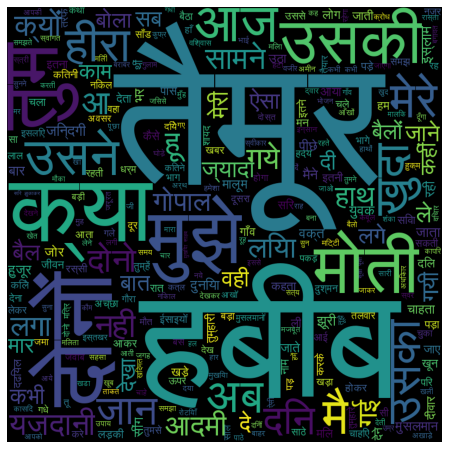

In [10]:
freq_dict = analyser(story = hump, filter_status = True)

## Observations
* Author frequently used so many words from the urdu literature. Even characters names are inspired by urdu literature.
* The writing style is not purely in hindi, it is somewhat a mixture of both hindi and urdu.